<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="#Copy-photos" data-toc-modified-id="Copy-photos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Copy photos</a></span></li></ul></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span><ul class="toc-item"><li><span><a href="#Numerical-estimates" data-toc-modified-id="Numerical-estimates-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Numerical estimates</a></span></li><li><span><a href="#Transit-Picture" data-toc-modified-id="Transit-Picture-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Transit Picture</a></span></li><li><span><a href="#Inclination-Convention" data-toc-modified-id="Inclination-Convention-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Inclination Convention</a></span></li><li><span><a href="#Phase-Conventions" data-toc-modified-id="Phase-Conventions-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Phase Conventions</a></span></li><li><span><a href="#Longitude-Conventions" data-toc-modified-id="Longitude-Conventions-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Longitude Conventions</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Create-files" data-toc-modified-id="Create-files-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Create files</a></span></li><li><span><a href="#Run-all-models" data-toc-modified-id="Run-all-models-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Run all models</a></span></li></ul></li><li><span><a href="#Graphing-Distribution" data-toc-modified-id="Graphing-Distribution-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Graphing Distribution</a></span><ul class="toc-item"><li><span><a href="#CO2-Log" data-toc-modified-id="CO2-Log-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>CO2 Log</a></span></li><li><span><a href="#N2-Log" data-toc-modified-id="N2-Log-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>N2 Log</a></span></li></ul></li><li><span><a href="#Table" data-toc-modified-id="Table-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Table</a></span></li><li><span><a href="#Surface-Contours" data-toc-modified-id="Surface-Contours-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Surface Contours</a></span><ul class="toc-item"><li><span><a href="#Fast-Rotator" data-toc-modified-id="Fast-Rotator-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Fast Rotator</a></span></li><li><span><a href="#Slow-Rotator" data-toc-modified-id="Slow-Rotator-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Slow Rotator</a></span></li></ul></li><li><span><a href="#Atmosphere-Profile" data-toc-modified-id="Atmosphere-Profile-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Atmosphere Profile</a></span></li></ul></li><li><span><a href="#Methods" data-toc-modified-id="Methods-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Methods</a></span><ul class="toc-item"><li><span><a href="#Phase-Weights" data-toc-modified-id="Phase-Weights-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Phase Weights</a></span></li><li><span><a href="#Transit-Weights" data-toc-modified-id="Transit-Weights-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Transit Weights</a></span></li></ul></li></ul></div>

# Imports

In [158]:
import numpy as np
import starcoder42 as s
import starcoder42.math
import astropy.units as u
import astropy.constants as c
from astropy.io import ascii
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from matplotlib.patches import Wedge
%matplotlib inline
from pathlib import Path
import glob
import sys
sys.path.append("..")
import PSG
import time

In [159]:
s.reload(PSG)

<module 'PSG' from '..\\PSG.py'>

# Background

## Numerical estimates

In [160]:
w = np.linspace(100,1000,901)
f = s.planck(w, 3000)

In [161]:
flux_density = s.integrate_spectrum(w, f, 547.-99./2, 547.+99/2) * u.W/u.m**2

In [162]:
exoplanets = ascii.read("../StandardTransits/exoplanets.csv")

In [163]:
s_rad = np.mean(exoplanets[(exoplanets["st_teff"]<3100)
                           & (exoplanets["st_teff"]>2900)]
                ["st_rad"]) * c.R_sun
s_rad

<Quantity 1.287045e+08 m>

In [164]:
(flux_density*s_rad**2/(10*u.pc)**2).to(u.W/u.m**2)

<Quantity 6.47128924e-06 W / m2>

In [165]:
(3640*u.Jy*0.87e14* u.Hz).to(u.W/u.m**2)

<Quantity 3.1668e-09 W / m2>

In [166]:
300**4*0.009**2/3000**4/0.17**2*1e6

In [167]:
-2.5*np.log10(300**4*0.009**2/3000**4/0.17**2)

In [168]:
(c.R_earth/c.R_sun)**2*1e6

<Quantity 84.05017877>

In [169]:
(c.R_earth/c.R_sun/0.17)**2*1e6

<Quantity 2908.31068416>

In [170]:
84/1152

In [171]:
0.009**2/0.17**2

In [172]:
1/90

## Transit Picture

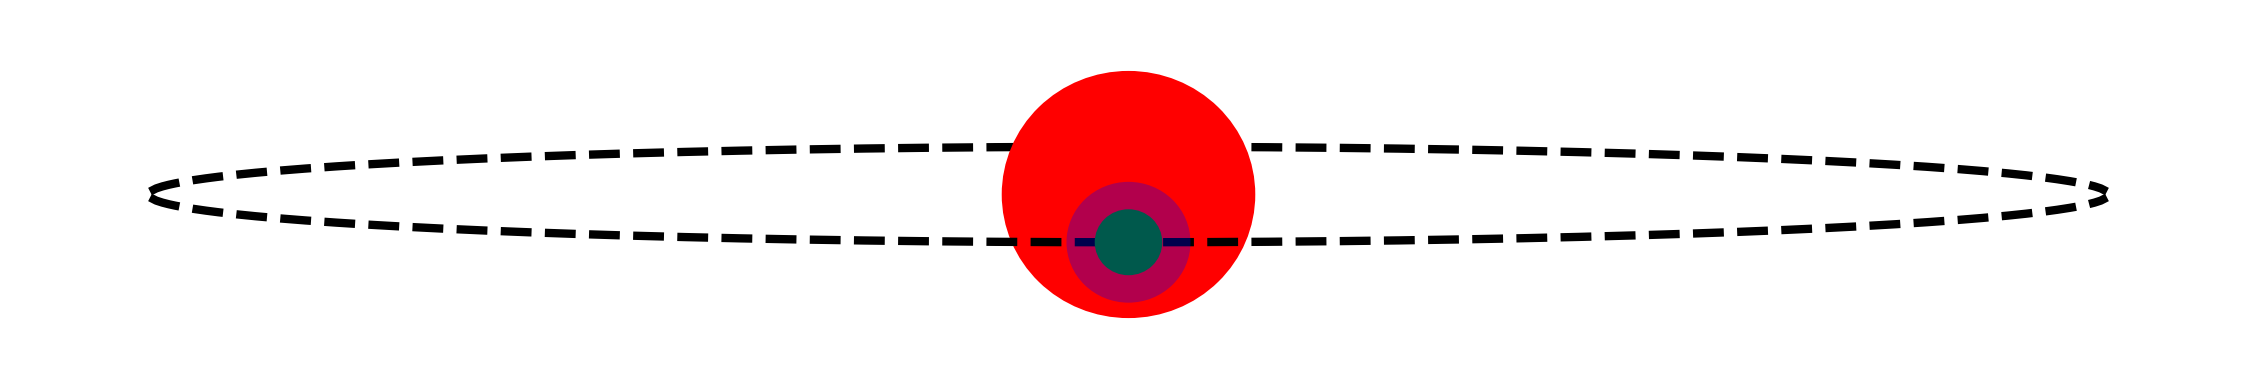

In [173]:
x=np.linspace(-5,5, 500)
fig = plt.figure(figsize=(7,1), dpi=400, frameon=False)
ax = fig.gca()
ax.add_patch(plt.Circle((0,0), radius=0.4, color='r',zorder=1, label="Parent Star"))
ax.plot(x, 0.05*np.sqrt(10-x**2), "k--", zorder=0)
ax.plot(x, -0.05*np.sqrt(10-x**2), "k--", zorder=2, label="Orbital Path")
ax.add_patch(plt.Circle((0,-0.05*np.sqrt(10)), radius=0.1, color="g", zorder=3,
                        label="Exoplanet"))
ax.add_patch(plt.Circle((0, -0.05*np.sqrt(10)), radius=0.2, color="b", alpha=0.3,
            linewidth=0, zorder=4))
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-0.5, 0.5)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis("off")
#ax.legend()
plt.show()
fig.savefig("transit.png")

## Inclination Convention

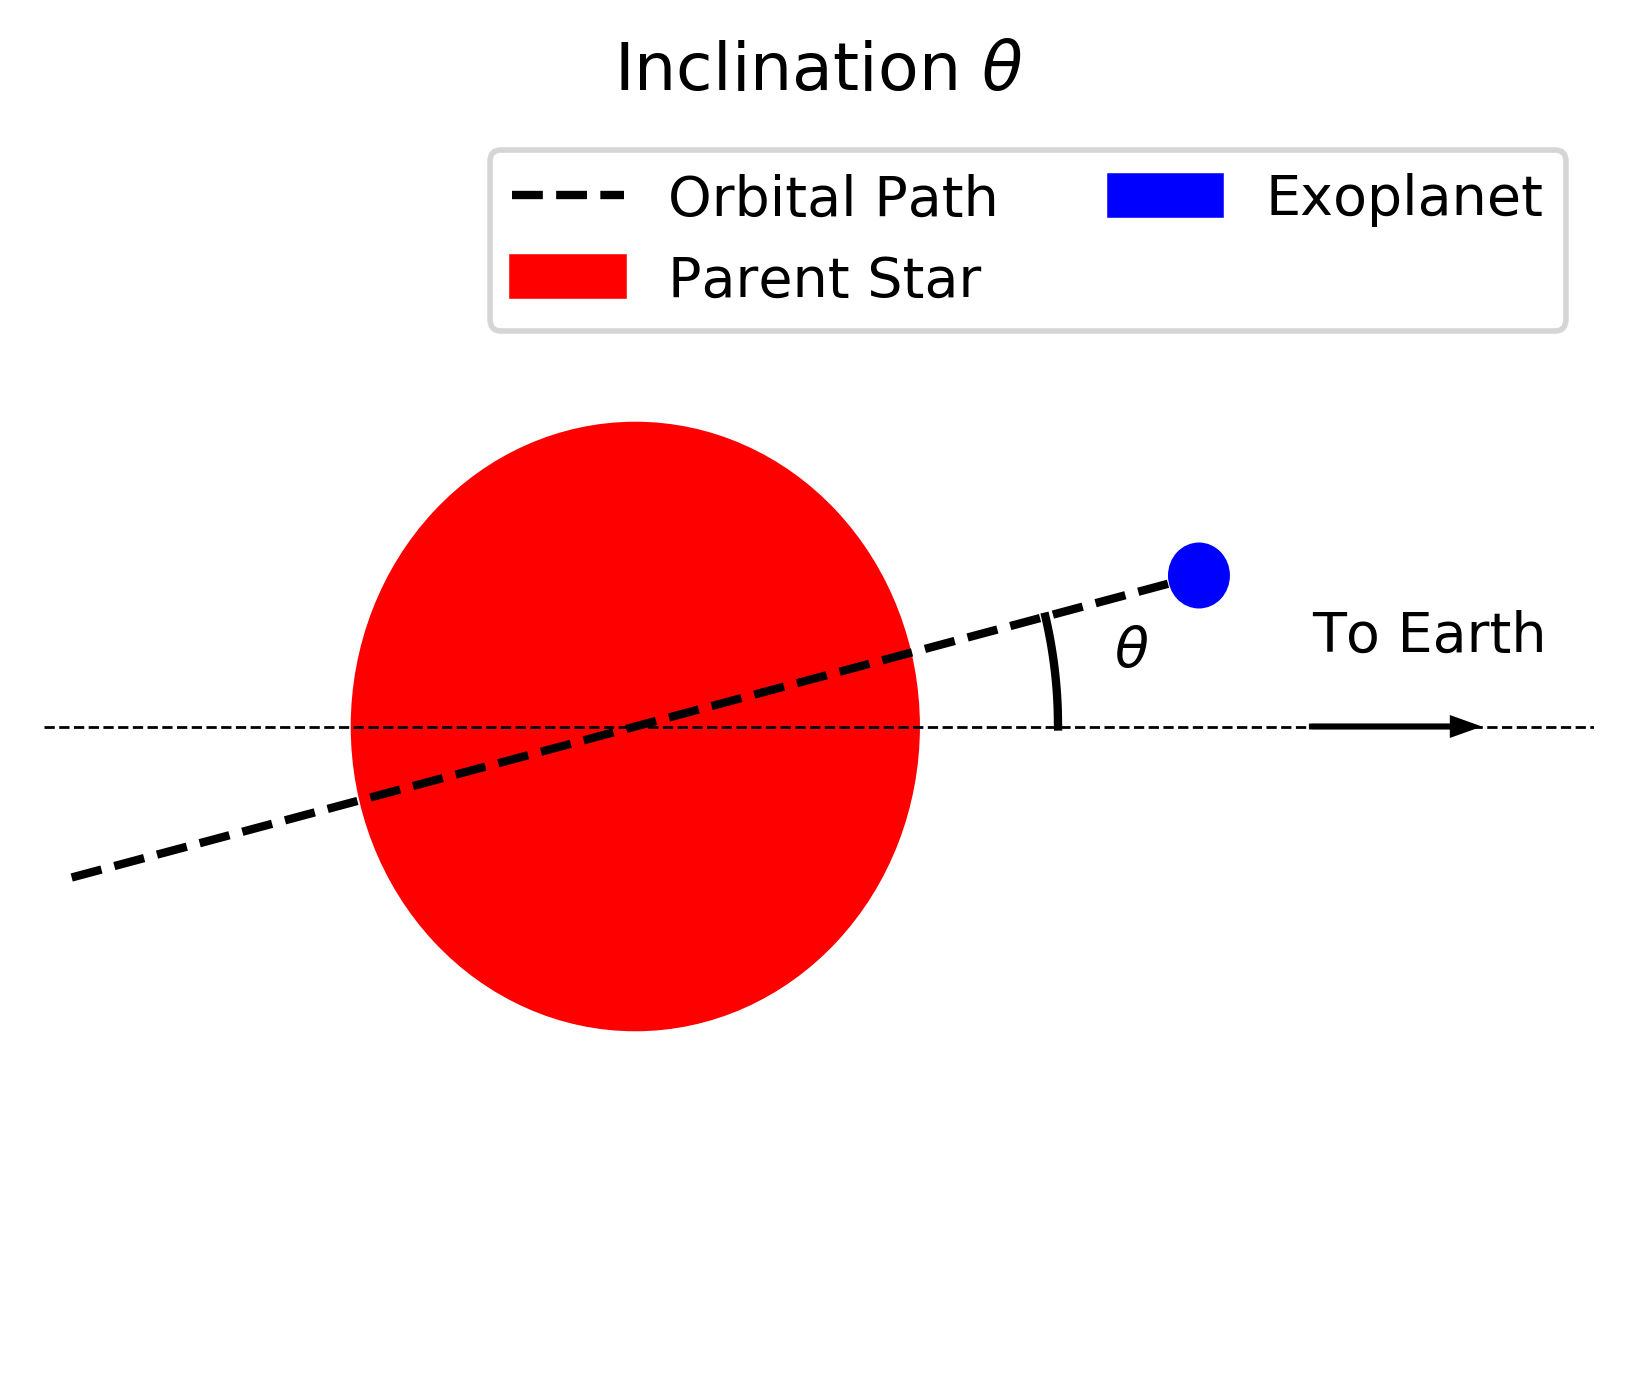

In [174]:
fig = plt.figure(figsize=(5, 4), dpi=400, frameon=False)
ax = fig.gca()
ax.add_patch(plt.Circle((0,0), radius=1, color="r", label="Parent Star"))
ax.axhline(0, linewidth=0.5, linestyle="--", color="k")
ax.add_line(plt.Line2D((-2, 2), (-0.5, 0.5), linestyle="--", color="k", label="Orbital Path"))
ax.add_patch(plt.Circle((2, 0.5), radius=0.1, color="b", label="Exoplanet", zorder=10))
x = np.linspace(1.5*np.cos(np.arctan(0.25)), 1.5)
ax.plot(x, np.sqrt((1.5)**2-x**2), c="k")
ax.annotate(r"$\theta$", xy=(1.7, 0.2))
ax.arrow(2.4,0,0.5,0, head_width=0.05, facecolor="k")
ax.annotate("To Earth", (2.4, 0.25))
ax.legend(ncol=2, loc=0)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_xlim(-2.1, 3.4)
ax.set_ylim(-2, 2)
ax.axis("off")
ax.set_title(r"Inclination $\theta$")
fig.savefig("inclination_diagram.png")

## Phase Conventions

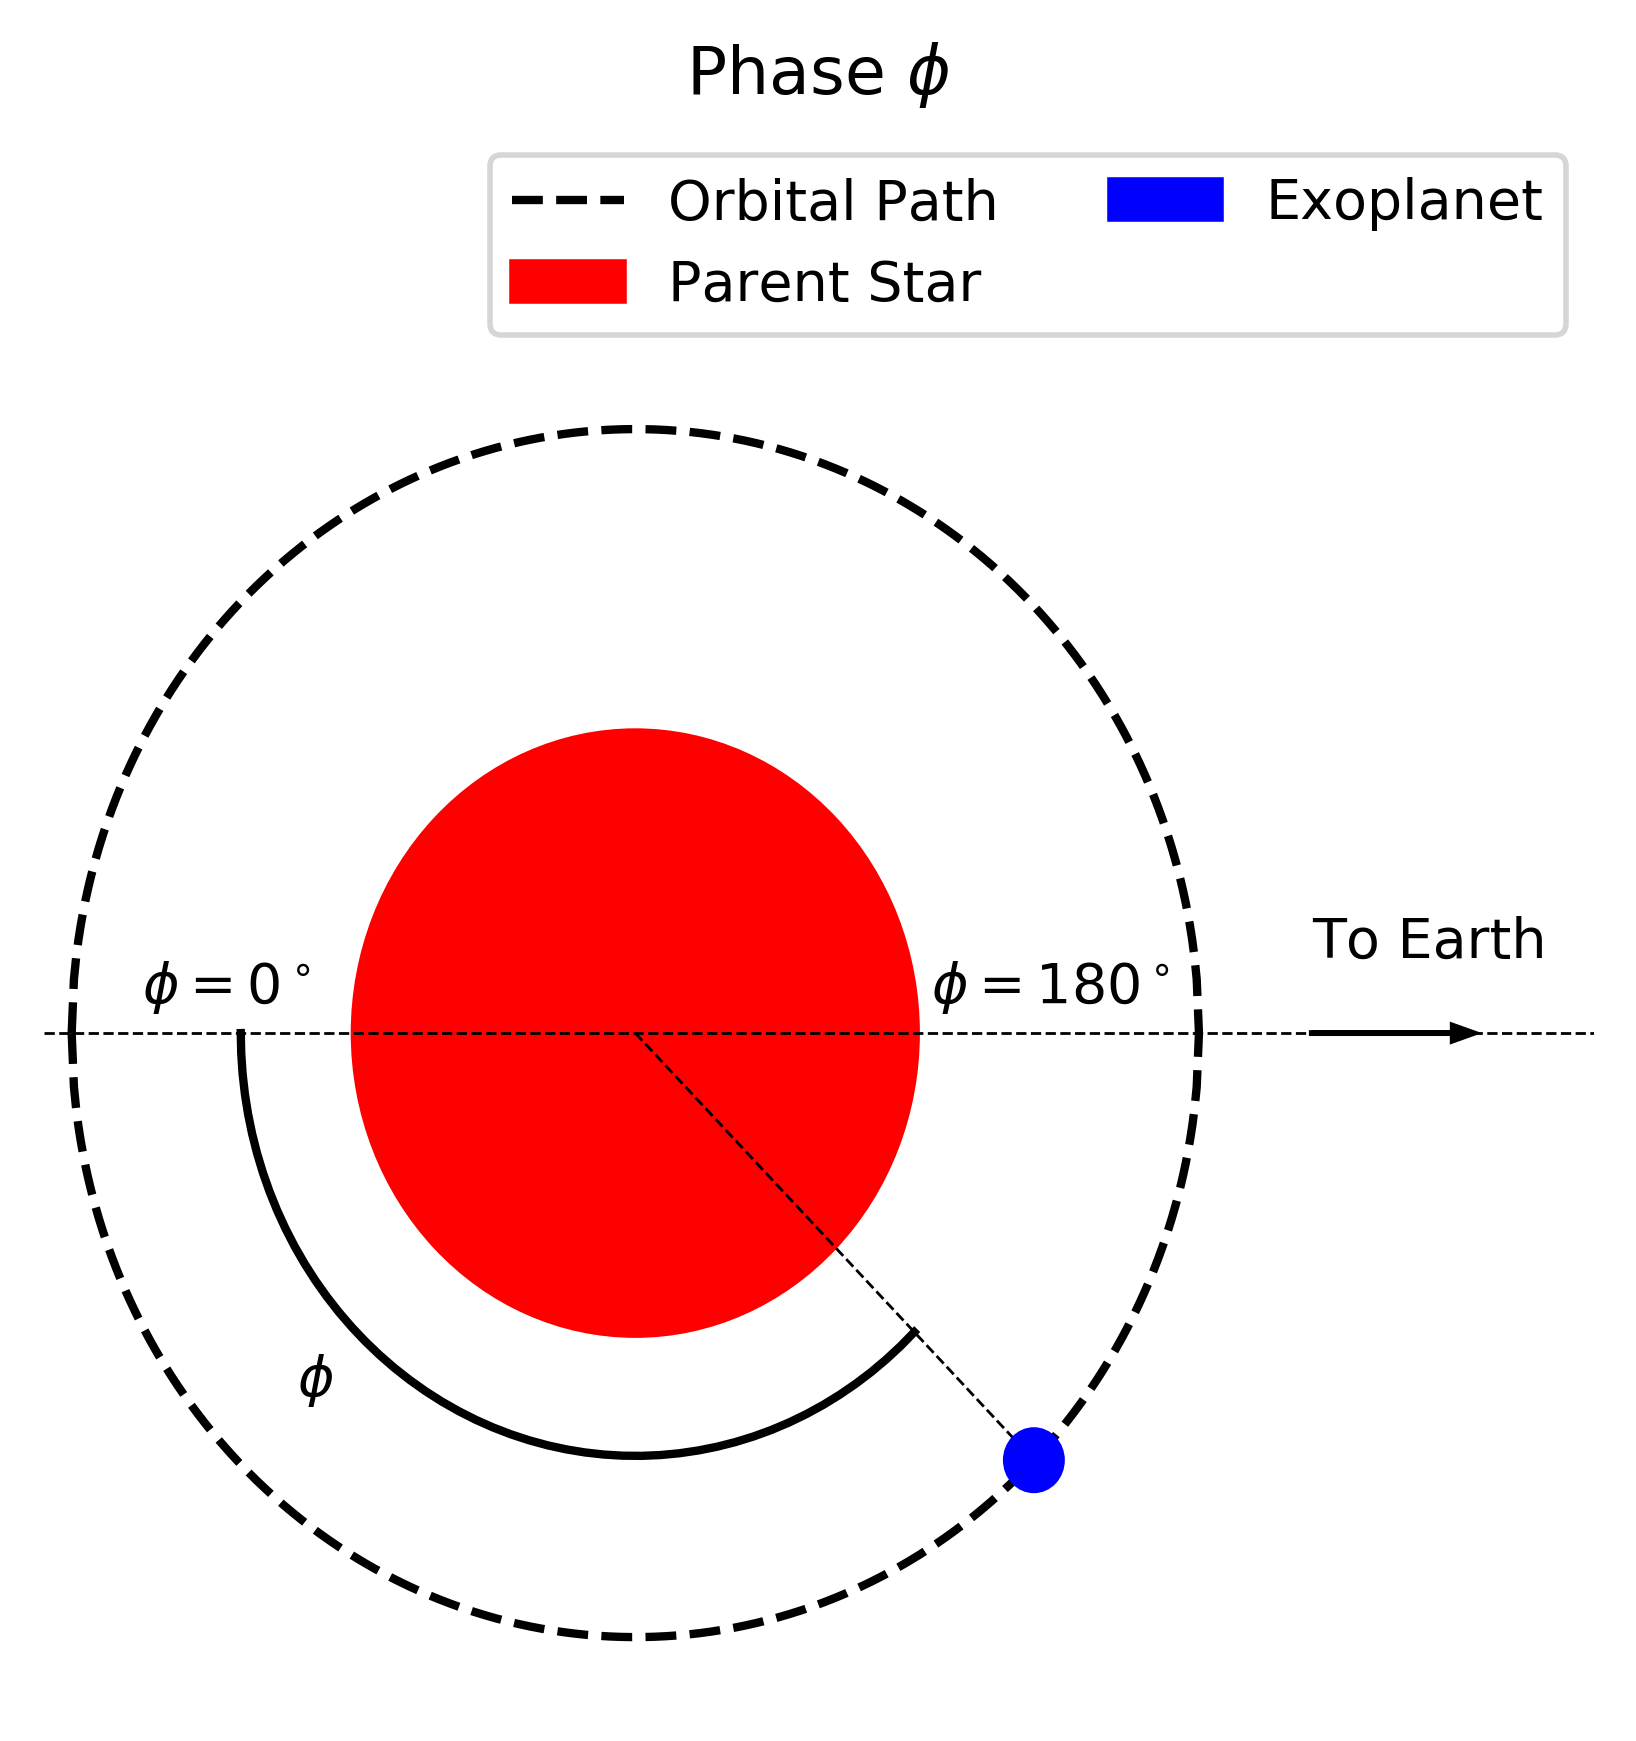

In [175]:
fig = plt.figure(figsize=(5, 5.2), dpi=400, frameon=False)
ax = fig.gca()
ax.add_patch(plt.Circle((0,0), radius=1, color="r", label="Parent Star"))
ax.axhline(0, linewidth=0.5, linestyle="--", color="k")
x = np.linspace(-2, 2, 500)
ax.plot(x, np.sqrt(4-x**2), "k--", label="Orbital Path")
ax.plot(x, -np.sqrt(4-x**2), "k--")
ax.add_patch(plt.Circle((2*np.cos(7*np.pi/4), 2*np.sin(7*np.pi/4)), radius=0.1,
                        color="b", zorder=10, label="Exoplanet"))
ax.add_line(plt.Line2D((0, 2*np.cos(7*np.pi/4)), (0, 2*np.sin(7*np.pi/4)),
                       linestyle="--", linewidth=0.5, color="k"))
x = np.linspace(np.pi, 7*np.pi/4)
ax.plot(1.4*np.cos(x), 1.4*np.sin(x), "k")
ax.annotate(r"$\phi$", xy=(-1.2, -1.2))
ax.arrow(2.4,0,0.5,0, head_width=0.05, facecolor="k")
ax.annotate("To Earth", (2.4, 0.25))
ax.annotate(r"$\phi=0^\circ$", (-1.75, 0.1))
ax.annotate(r"$\phi=180^\circ$", (1.05, 0.1))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.legend(ncol=2, loc=1)
ax.set_xlim(-2.1, 3.4)
ax.set_ylim(-2.2, 3)
ax.axis("off")
ax.set_title(r"Phase $\phi$")
fig.savefig("phase_diagram.png")

## Longitude Conventions

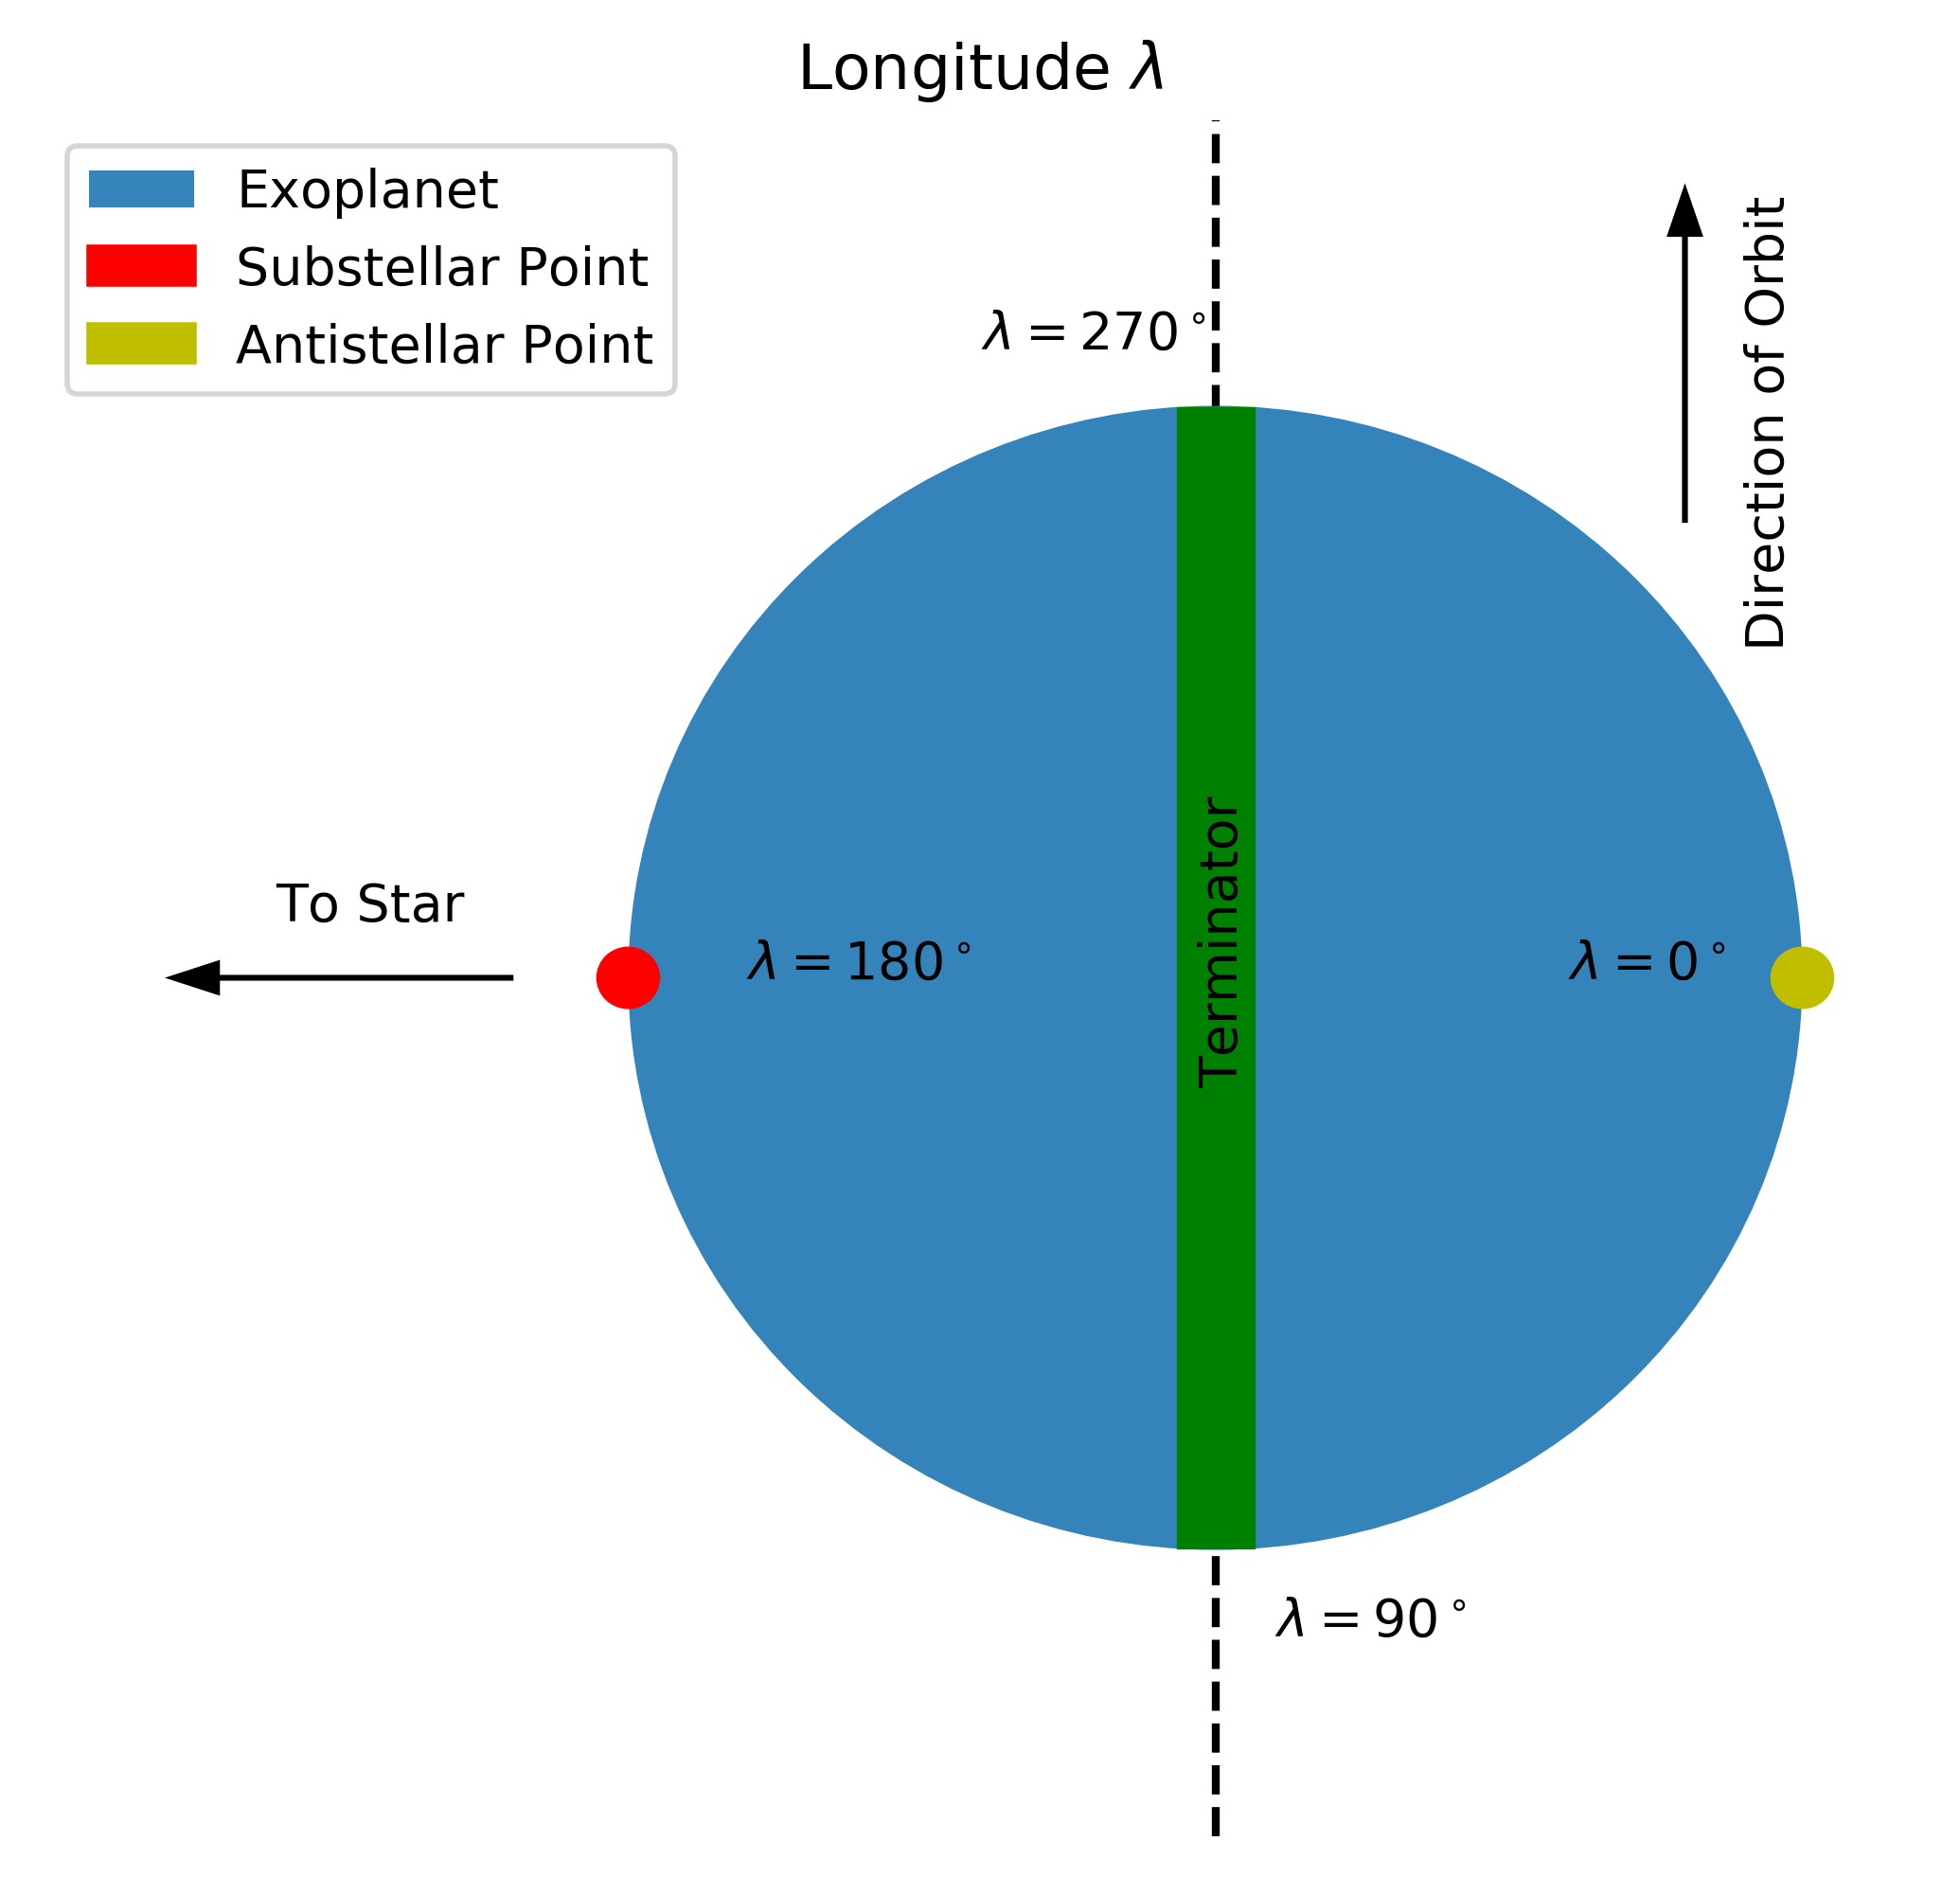

In [176]:
fig = plt.figure(figsize=(6.4, 6), dpi=400, frameon=False)
ax = fig.gca()
ax.add_patch(plt.Circle((0,0), radius=1, alpha=0.9, zorder=0,
                        label="Exoplanet"))
ax.axvline(0, ymin=0.5-0.31, ymax=0.5+0.31, linewidth=15, zorder=1, c="g")
ax.annotate("Terminator", (-0.03, 0.25), rotation=90)
ax.add_patch(plt.Circle((-1,0), radius=0.05, color="r",
                        label="Substellar Point"))
ax.annotate(r"$\lambda=180^\circ$", (-0.8, 0))
ax.add_patch(plt.Circle((1, 0), radius=0.05, color="y",
                        label="Antistellar Point"))
ax.annotate(r"$\lambda=0^\circ$", (0.6, 0))
ax.annotate(r"$\lambda=270^\circ$", (-0.4, 1.1))
ax.annotate(r"$\lambda=90^\circ$", (0.1, -1.15))
ax.arrow(-1.2,0,-0.5,0, head_width=0.05, facecolor="k")
ax.annotate("To Star", (-1.6, 0.1))
ax.arrow(0.8,0.8,0,0.5, head_width=0.05, facecolor="k")
ax.annotate("Direction of Orbit", (0.9, 1.3), rotation=90)
ax.axvline(0, linestyle="--", color="k", zorder=-1)
from matplotlib.legend_handler import HandlerLine2D
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_linewidth(2)
ax.legend(loc=2, handler_map={plt.Line2D:HandlerLine2D(update_func=update_prop)})
ax.set_xlim(-2,1.2)
ax.set_ylim(-1.5, 1.5)
ax.set_title(r"Longitude $\lambda$")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis("off")
fig.show()
fig.savefig("longitude_diagram.png", frameon=False)

In [177]:
os.system("cp longitude_diagram.png ../../Thesis/background")
os.system("cp phase_diagram.png ../../Thesis/background")
os.system("cp inclination_diagram.png ../../Thesis/background")

# Models
### Create files

In [178]:
loc = Path(".").absolute().parents[0].joinpath("ModelFiles")
files = list(loc.glob("trappist1e*.nc"))

In [179]:
print(files[12])

C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\ModelFiles\trappist1e_1barN2_1barCO2_aqua.cam.h0.avg.nc


### Run all models

In [180]:
n2 = []
co2 = []
ch4 = []
h2 = []
psurf = []
tsurf = []
for i, file in enumerate(files[:-2]):
    file = str(file)
    print(i)
    if "ppm" not in file:
        if "N2" in file:
            n2.append(float(file.split("barN2")[0].split("_")[-1]))
        else:
            n2.append(0.)
        if "CO2" in file:
            co2.append(float(file.split("barCO2")[0].split("_")[-1]))
        else:
            co2.append(0.)
        ch4.append(0.)
        if "H2" in file:
            h2.append(float(file.split("barH2")[0].split("_")[-1]))
        else:
            h2.append(0.)
    else:
        if "N2" in file:
            n2.append(float(file.split("barN2")[0].split("_")[-1]))
        else:
            n2.append(0.)
        if "ppmCO2" in file:
            co2.append(float(file.split("ppmCO2")[0].split("_")[-1])*1e-6)
        else:
            co2.append(0.)
        if "ppmCH4" in file:
            ch4.append(float(file.split("ppmCH4")[0].split("_")[-1])*1e-6)
        else:
            ch4.append(0.)
        h2.append(0.)
    
    planet = PSG.PSG("TRAPPIST-1 e")
    planet.fetch_archive()
    planet.from_cdf(file, is_transit=False)
    planet.calculate()
    psurf.append(np.mean(planet.netcdf["PS"]))
    tsurf.append(np.mean(planet.netcdf["TS"]))
n2 = np.array(n2)
co2 = np.array(co2)
ch4 = np.array(ch4)
tsurf = np.array(tsurf)
psurf = np.array(psurf)
is_n2 = n2 > 0
is_co2 = co2 > 0
is_ch4 = ch4 > 0

0
Starting PSG for TRAPPIST-1 e
    Retrieving planet variables from NASA's Exoplanet Archive
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to psg_files\trappist1e_0.25barCO2_180_pro.txt
    Atmosphere Profile File Read
1
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to psg_files\trappist1e_0.5barCO2_180_pro.txt
    Atmosphere Profile File Read
2
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to psg_files\trappist1e_0.9barN2_0.1barH2_180_pro.txt
    Atmosphere Profile File Read
3
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to psg_files\trappist1e_1.5barN2_0.1barCO2_180_pro.txt
    Atmosphere Profile File Read
4
St

In [181]:
planet = PSG.PSG("TRAPPIST-1 e")
planet.fetch_archive()
planet.from_cdf(files[11])
planet.calculate(n_uplayers=7, atmosphere_ceiling=1e-6)

Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to psg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere


## Graphing Distribution

In [182]:
def ln_opt(c, a, b):
    return a*np.log(c) + b

### CO2 Log

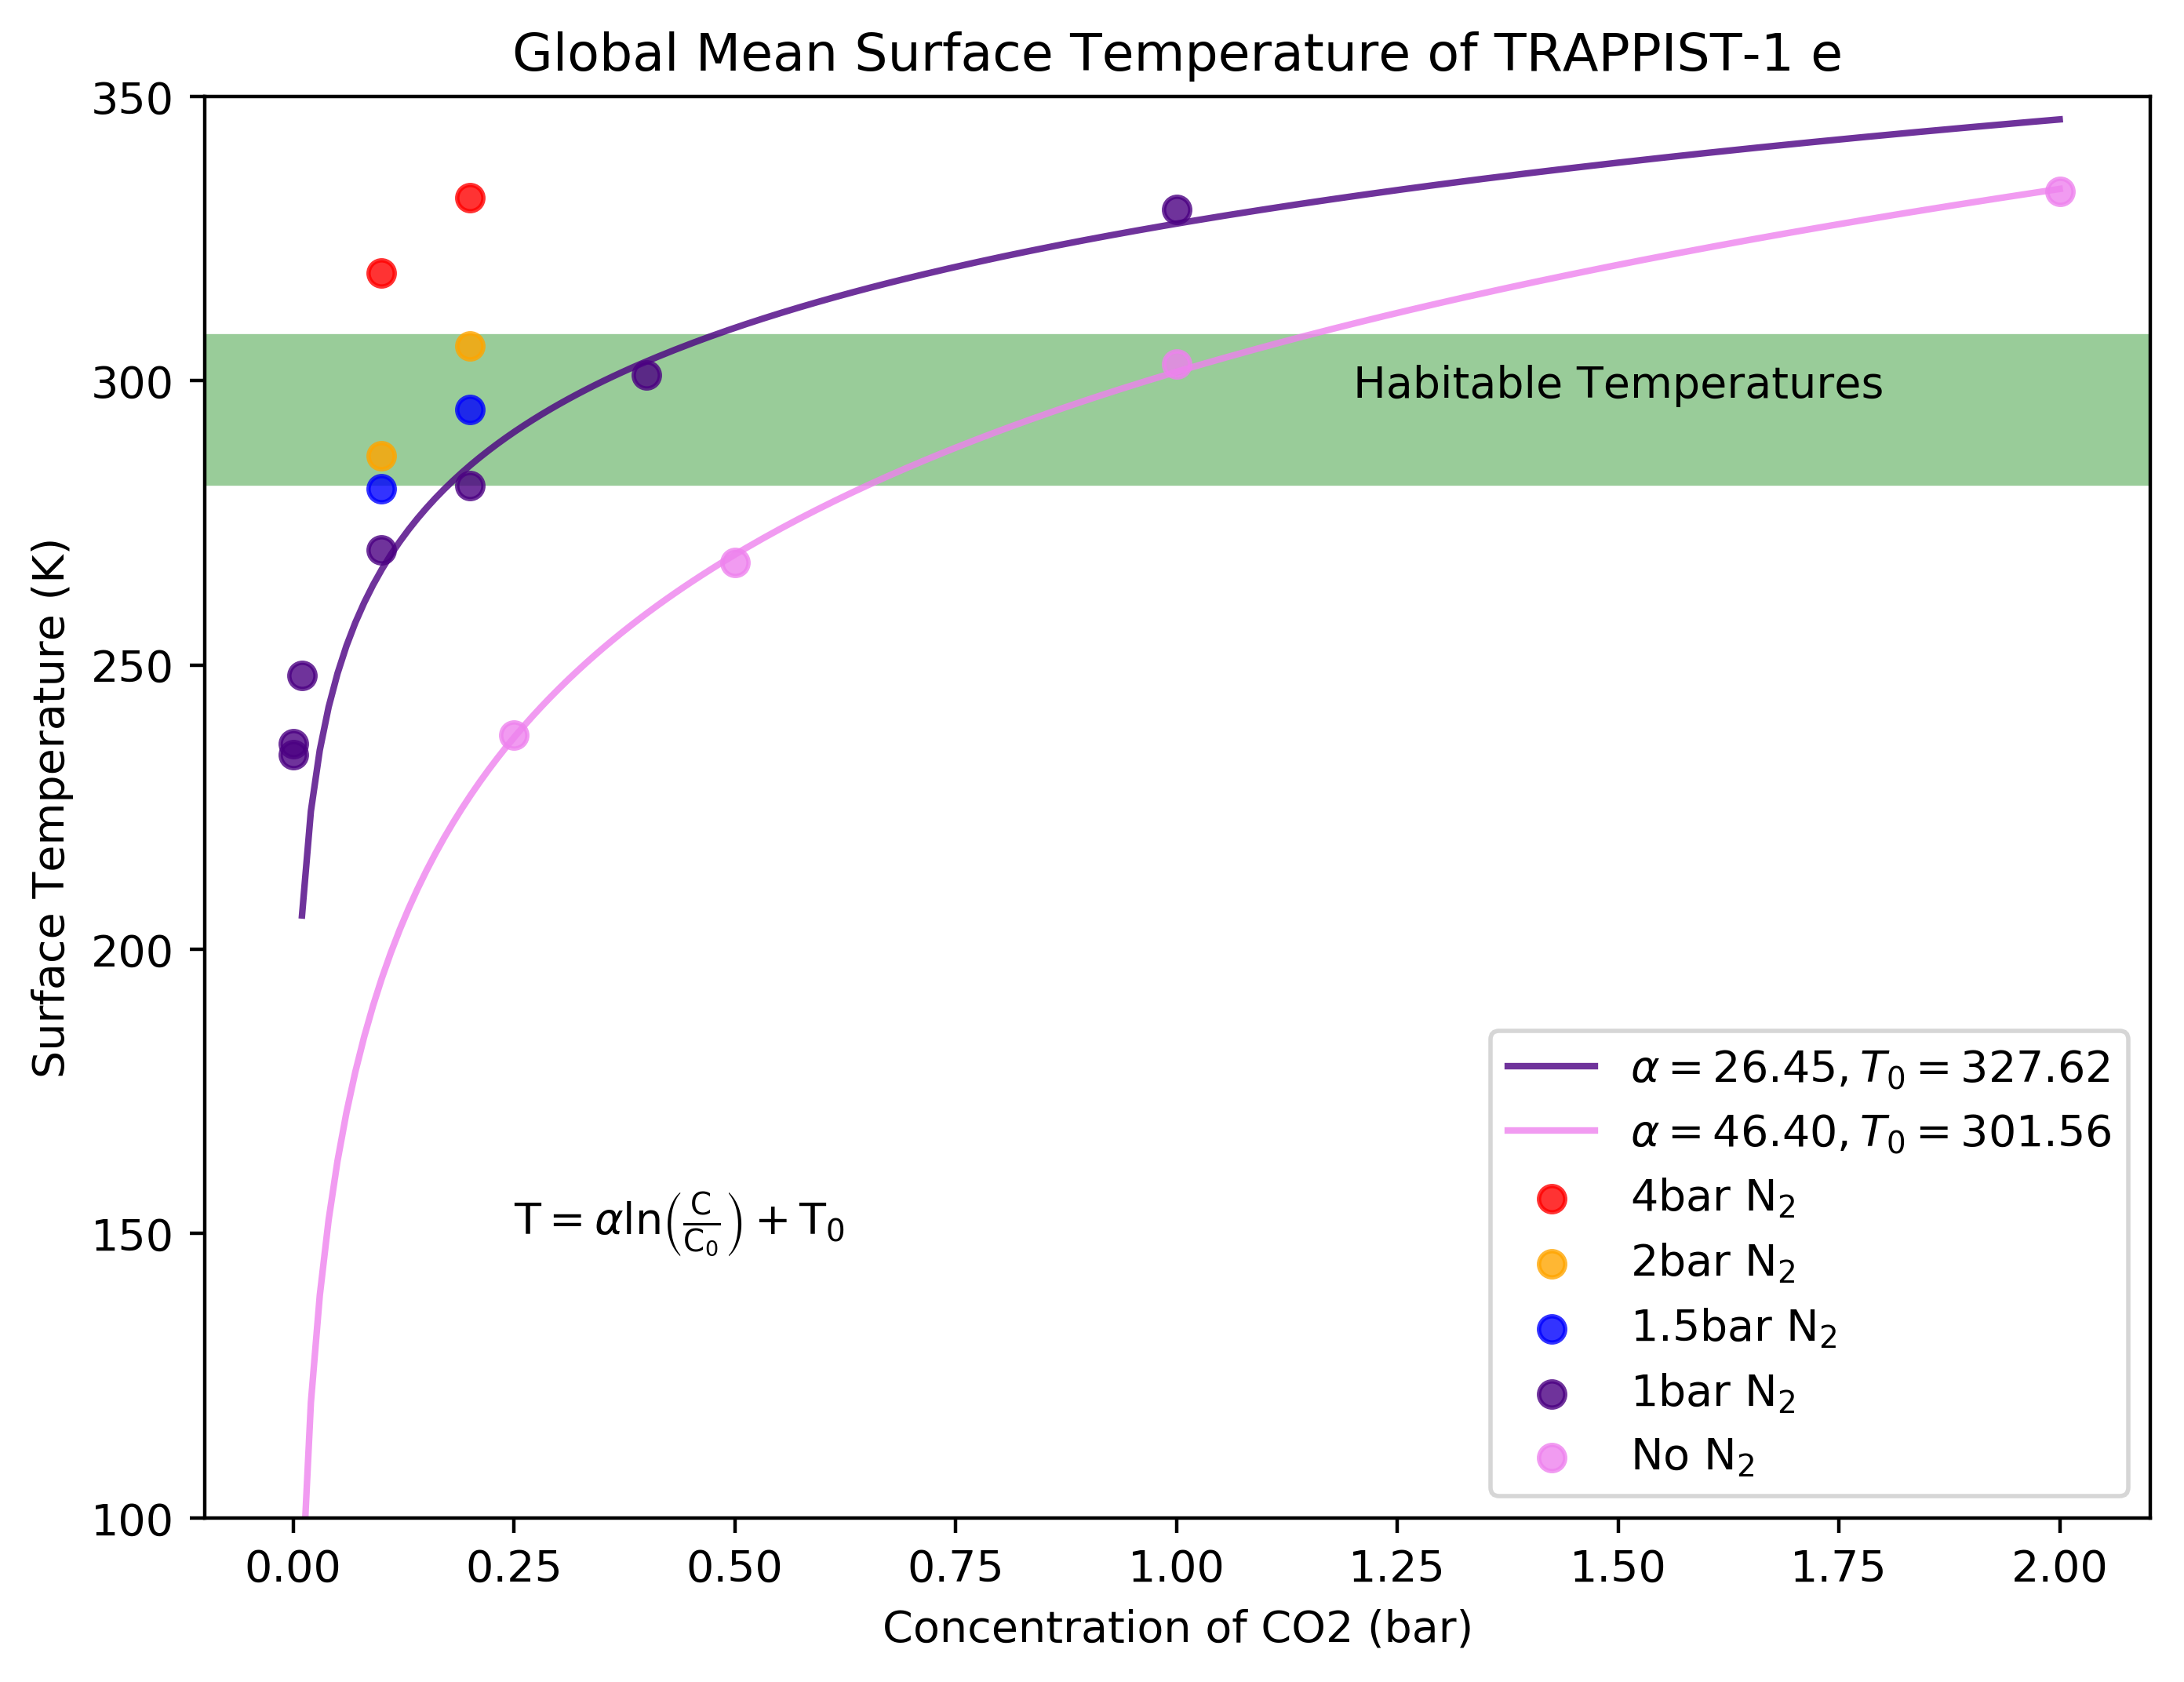

In [183]:
fig = plt.figure(figsize=(8, 6), dpi=400)
ax = fig.gca()
x = np.linspace(0,2, 200)
ax.scatter(co2[is_co2 & (n2==4)], tsurf[is_co2 & (n2==4)], c="r", alpha=0.8,
          label=r"4bar $\mathrm{N_2}$")
ax.scatter(co2[is_co2 & (n2==2)], tsurf[is_co2 & (n2==2)], c="orange", alpha=0.8,
          label=r"2bar $\mathrm{N_2}$")
ax.scatter(co2[is_co2 & (n2==1.5)], tsurf[is_co2 & (n2==1.5)], c="b",alpha=0.8,
          label=r"1.5bar $\mathrm{N_2}$")
ax.scatter(co2[is_co2 & (n2==1)], tsurf[is_co2 & (n2==1)], c="indigo", alpha=0.8,
          label=r"1bar $\mathrm{N_2}$")
popt, const = curve_fit(ln_opt, np.sort(co2[is_co2 & (n2==1)])[3:],
                        np.sort(tsurf[is_co2 & (n2==1)])[3:])
ax.plot(x, ln_opt(x, popt[0], popt[1]), c="indigo", alpha=0.8,
       label=rf"$\alpha={popt[0]:.2f}, T_0={popt[1]:.2f}$")
ax.plot()
ax.scatter(co2[is_co2 & ~is_n2], tsurf[is_co2 & ~is_n2], c="violet", alpha=0.8,
          label=r"No $\mathrm{N_2}$")
popt, const = curve_fit(ln_opt, co2[is_co2 & ~is_n2],
                        tsurf[is_co2 & ~is_n2])
ax.plot(x, ln_opt(x, popt[0], popt[1]), c="violet", alpha=0.8,
       label=rf"$\alpha={popt[0]:.2f}, T_0={popt[1]:.2f}$")
ax.set_ylim(100,350)
ax.axhline(295, linewidth=34.8, zorder=0, alpha=0.4, c="g")
ax.annotate("Habitable Temperatures", (1.2, 297))
ax.annotate(r"$\mathrm{T}=\alpha\ln{\left(\frac{\mathrm{C}}{\mathrm{C}_0}\right)}+\mathrm{T}_0$",(0.25, 150))
ax.set_xlabel("Concentration of CO2 (bar)")
ax.set_ylabel("Surface Temperature (K)")
ax.set_title("Global Mean Surface Temperature of TRAPPIST-1 e")
ax.legend()
fig.savefig("surfacet_co2.png")

### N2 Log

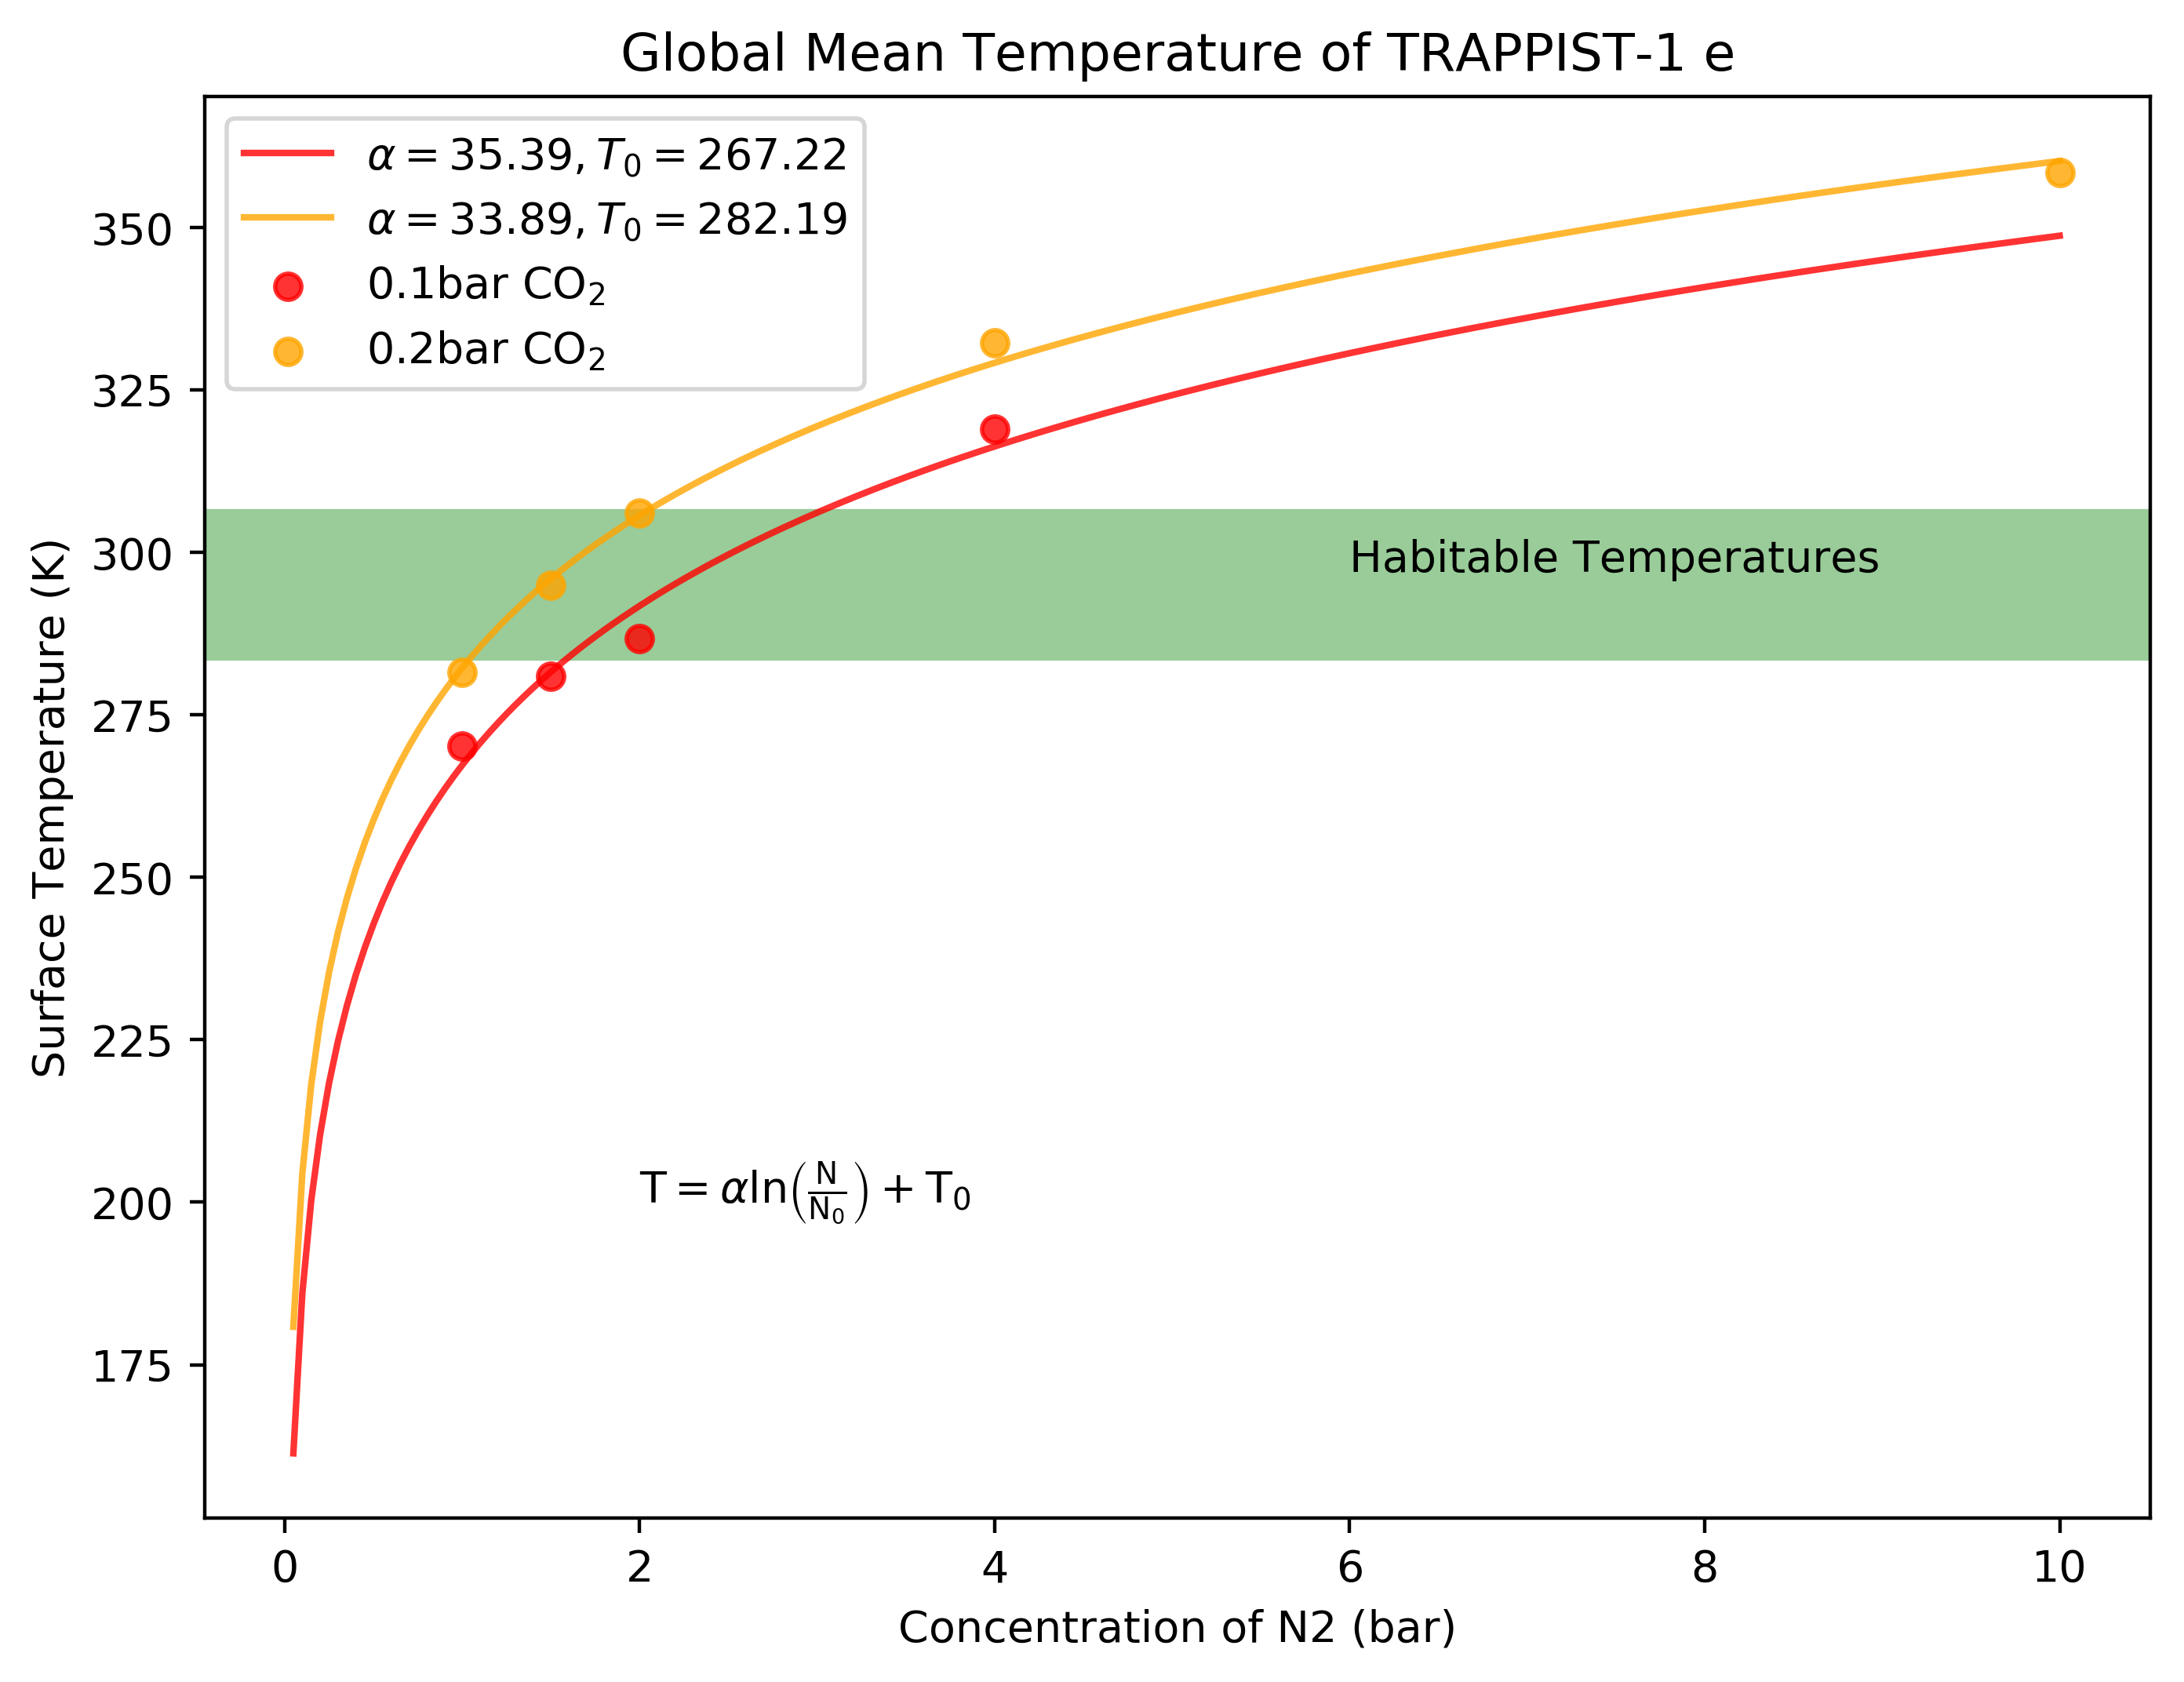

In [184]:
fig = plt.figure(figsize=(8, 6), dpi=400)
ax = fig.gca()
x = np.linspace(0,10,200)
ax.scatter(n2[is_n2 & (co2==0.1)], tsurf[is_n2 & (co2==0.1)], c="r", alpha=0.8,
          label=r"0.1bar $\mathrm{CO_2}$")
popt, const = curve_fit(ln_opt, n2[is_n2 & (co2==0.1)],
                        tsurf[is_n2 & (co2==0.1)])
ax.plot(x, ln_opt(x, popt[0], popt[1]), c="r", alpha=0.8,
       label=rf"$\alpha={popt[0]:.2f}, T_0={popt[1]:.2f}$")
ax.scatter(n2[is_n2 & (co2==0.2)], tsurf[is_n2 & (co2==0.2)], c="orange", alpha=0.8,
          label=r"0.2bar $\mathrm{CO_2}$")
popt, const = curve_fit(ln_opt, n2[is_n2 & (co2==0.2)],
                        tsurf[is_n2 & (co2==0.2)])
ax.plot(x, ln_opt(x, popt[0], popt[1]), c="orange", alpha=0.8,
       label=rf"$\alpha={popt[0]:.2f}, T_0={popt[1]:.2f}$")
ax.legend()
ax.axhline(295, linewidth=34.8, zorder=0, alpha=0.4, c="g")
ax.annotate("Habitable Temperatures", (6, 297))
ax.annotate(r"$\mathrm{T}=\alpha\ln{\left(\frac{\mathrm{N}}{\mathrm{N}_0}\right)}+\mathrm{T}_0$",
            (2, 200))
ax.set_xlabel("Concentration of N2 (bar)")
ax.set_ylabel("Surface Temperature (K)")
ax.set_title("Global Mean Temperature of TRAPPIST-1 e")
ax.legend()
fig.savefig("surfacet_n2.png")

## Table

In [185]:
with open("table.tex", "w") as tab:
    tab.write("\\chem{N_2} & \\chem{CO_2} & \\chem{CH_4} & \\chem{H_2} & Surface Temperature\\\\\n")
    tab.write("\\si{\\bar} &"*4 + "\\si{\\kelvin}\\\\ \hline \n")
    for n, c, k, h, t in zip(n2, co2, ch4, h2, tsurf):
        tab.write(f"{n:4.1f} & {c} & {k:.1e} & {h} & {t:4.1f}\\\\\n")

In [186]:
!cat table.tex

\chem{N_2} & \chem{CO_2} & \chem{CH_4} & \chem{H_2} & Surface Temperature\\
\si{\bar} &\si{\bar} &\si{\bar} &\si{\bar} &\si{\kelvin}\\ \hline 
 0.0 & 0.25 & 0.0e+00 & 0.0 & 237.7\\
 0.0 & 0.5 & 0.0e+00 & 0.0 & 268.0\\
 0.9 & 0.0 & 0.0e+00 & 0.1 & 229.2\\
 1.5 & 0.1 & 0.0e+00 & 0.0 & 280.9\\
 1.5 & 0.2 & 0.0e+00 & 0.0 & 294.9\\
10.0 & 0.2 & 0.0e+00 & 0.0 & 358.4\\
 0.0 & 1.0 & 0.0e+00 & 0.0 & 303.0\\
 1.0 & 0.0004 & 0.0e+00 & 0.0 & 234.2\\
 1.0 & 0.01 & 0.0e+00 & 0.0 & 248.1\\
 1.0 & 0.1 & 0.0e+00 & 0.0 & 270.2\\
 1.0 & 0.2 & 0.0e+00 & 0.0 & 281.5\\
 1.0 & 0.4 & 0.0e+00 & 0.0 & 301.0\\
 1.0 & 1.0 & 0.0e+00 & 0.0 & 330.2\\
 1.0 & 0.00039999999999999996 & 1.7e-06 & 0.0 & 236.1\\
 1.0 & 0.0 & 0.0e+00 & 0.0 & 217.4\\
 0.0 & 2.0 & 0.0e+00 & 0.0 & 333.2\\
 2.0 & 0.1 & 0.0e+00 & 0.0 & 286.7\\
 2.0 & 0.2 & 0.0e+00 & 0.0 & 306.1\\
 4.0 & 0.1 & 0.0e+00 & 0.0 & 319.0\\
 4.0 & 0.2 & 0.0e+00 & 0.0 & 332.2\\


## Surface Contours
### Fast Rotator

In [187]:
def cartopy_populate(ax, label_size=6):
    for i in range(-45,90,45):
        ax.plot(np.linspace(0,360), np.ones(50)*i, "k--", linewidth=0.75,
                transform=ccrs.PlateCarree())
        ax.text(195, i+5, f"{i:.0f}" r"$^\circ$",
                transform=ccrs.PlateCarree(), size=label_size)
    for i in [90, 0, 270]:
        ax.plot(np.ones(50)*i+5, np.linspace(-90,90), "k--", linewidth=0.75,
                transform=ccrs.PlateCarree())
        ax.text(i+20, -80, f"{i:.0f}" r"$^\circ$",
                transform=ccrs.PlateCarree(), size=label_size)
    ax.annotate(r"$\lambda$", (0.5, -0.2), xycoords="axes fraction")
    ax.annotate(r"$\delta$", (-0.1, 0.5), rotation=90,
                xycoords="axes fraction")

In [188]:
special_files = glob.glob("../ModelFiles/t3700*.nc")
print(special_files)
slow = PSG.PSG("TRAPPIST-1 e")
slow.fetch_archive()
slow.from_cdf(special_files[0], 180)
slow.calculate(1e-6, 7)

['../ModelFiles\\t3700_s1500_p44.3355.cam.h0.avg.nc']
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to psg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere


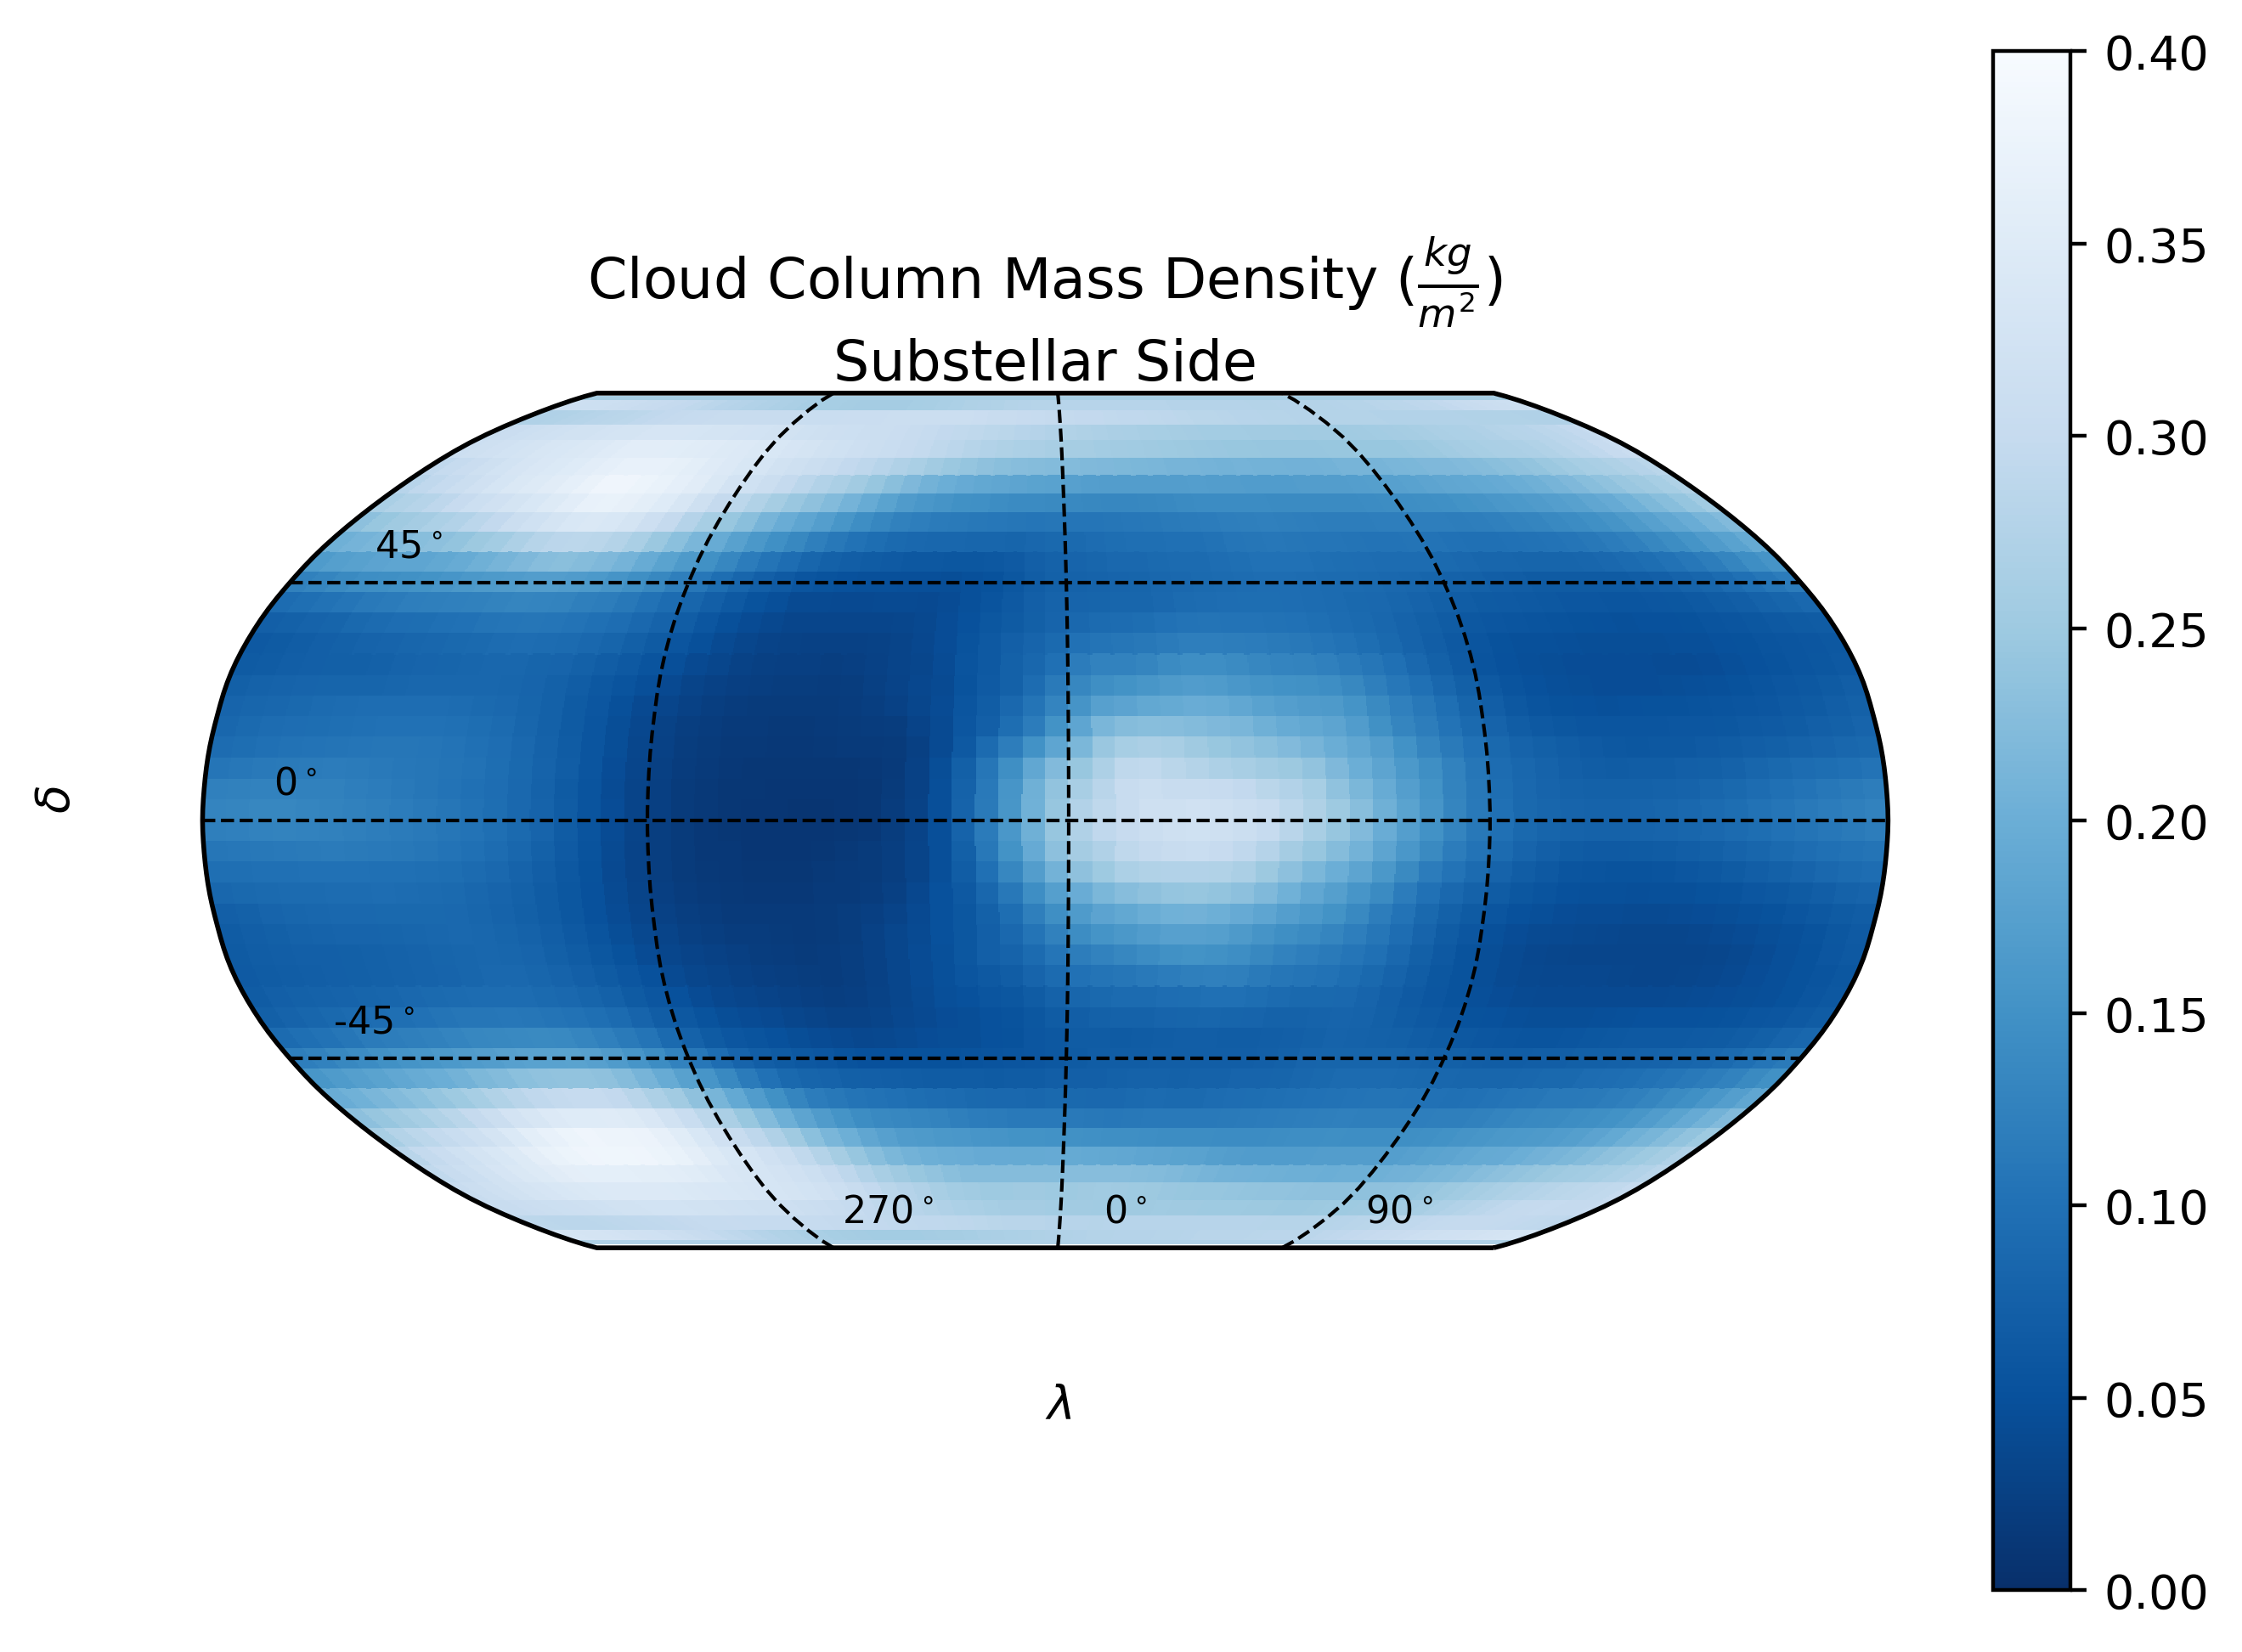

In [189]:
fig = plt.figure(figsize=(8, 6), dpi=400)
ax = fig.gca(projection=ccrs.Robinson())
data = planet.netcdf["TGCLDCWP"][0]/1000
im = ax.imshow(data, cmap=mpl.cm.get_cmap("Blues").reversed(), vmin=0, vmax=0.4,
          transform=ccrs.PlateCarree())
ax.set_title(r"Cloud Column Mass Density ($\frac{kg}{m^2}$)" "\nSubstellar Side")
cartopy_populate(ax, 8)
fig.colorbar(im, format="%.2f")
fig.savefig("cloud_map.png")

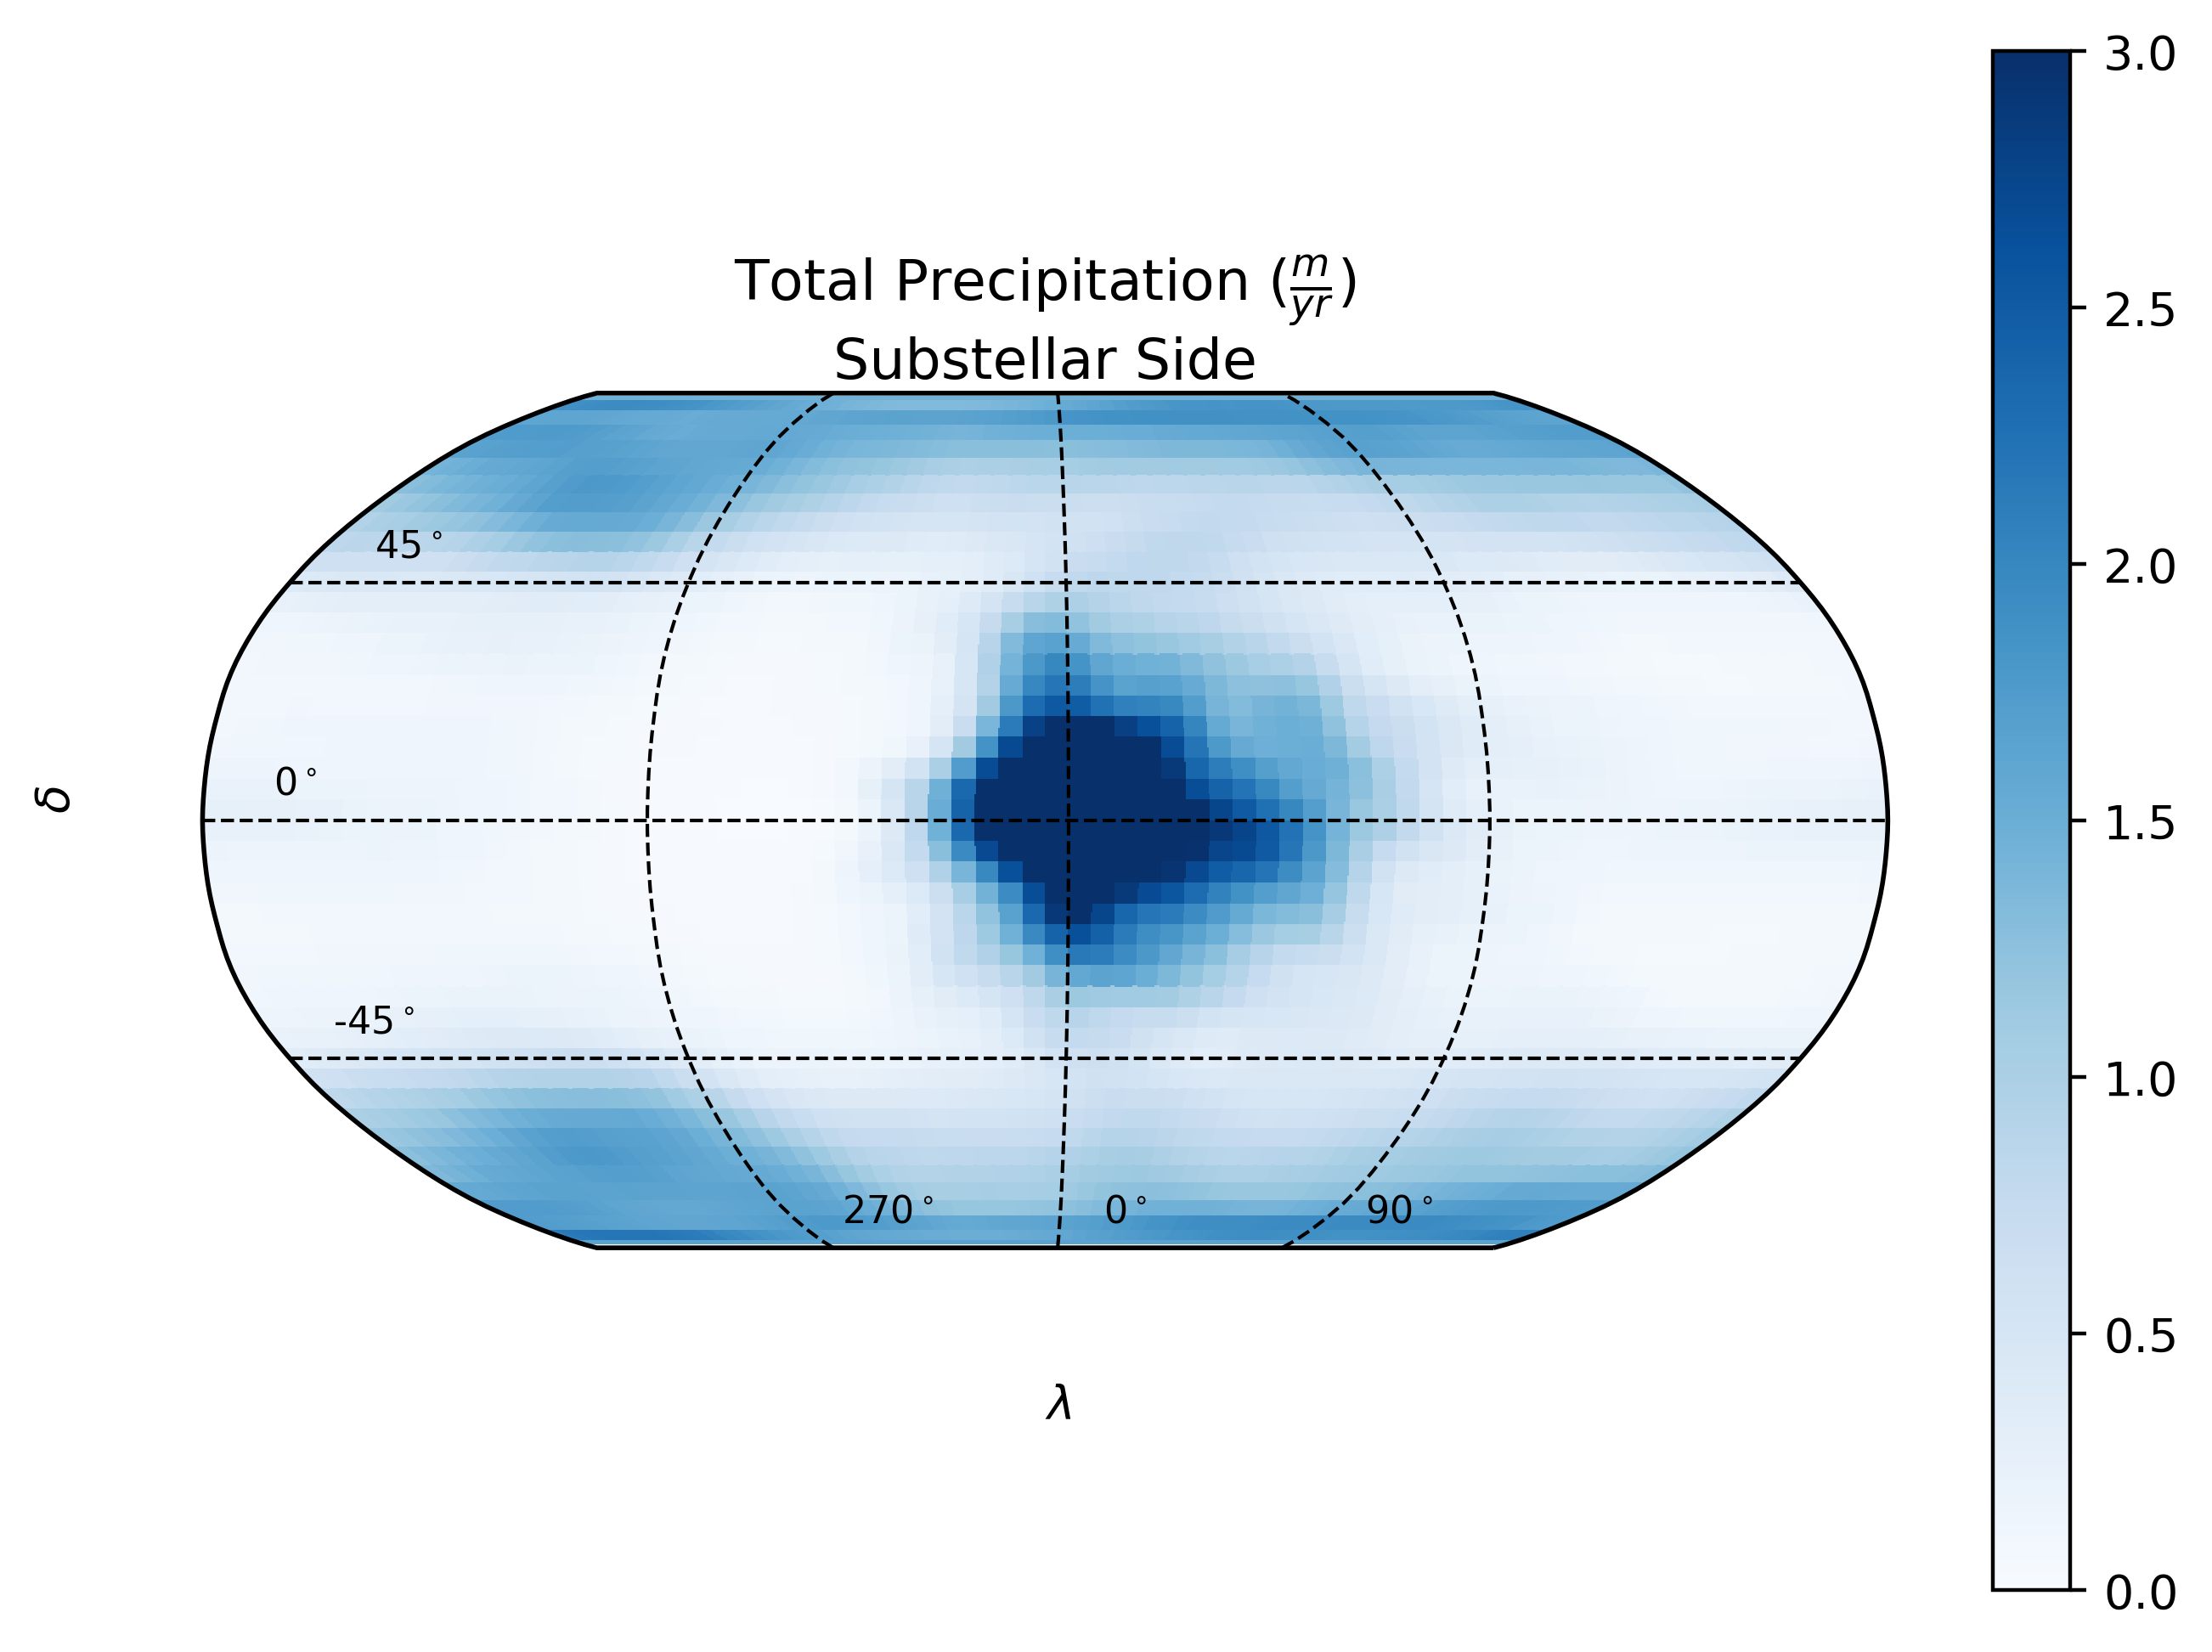

In [190]:
fig = plt.figure(figsize=(8, 6), dpi=400)
ax = fig.gca(projection=ccrs.Robinson())
data = np.sum(planet.netcdf["PRECT"], axis=0)
im = ax.imshow(data*s.times["Years"], cmap="Blues", vmin=0, vmax=3,
          transform=ccrs.PlateCarree())
ax.set_title(r"Total Precipitation ($\frac{m}{yr}$)""\nSubstellar Side")
cartopy_populate(ax, 8)
fig.colorbar(im)
fig.savefig("precipitation_map.png")

### Slow Rotator

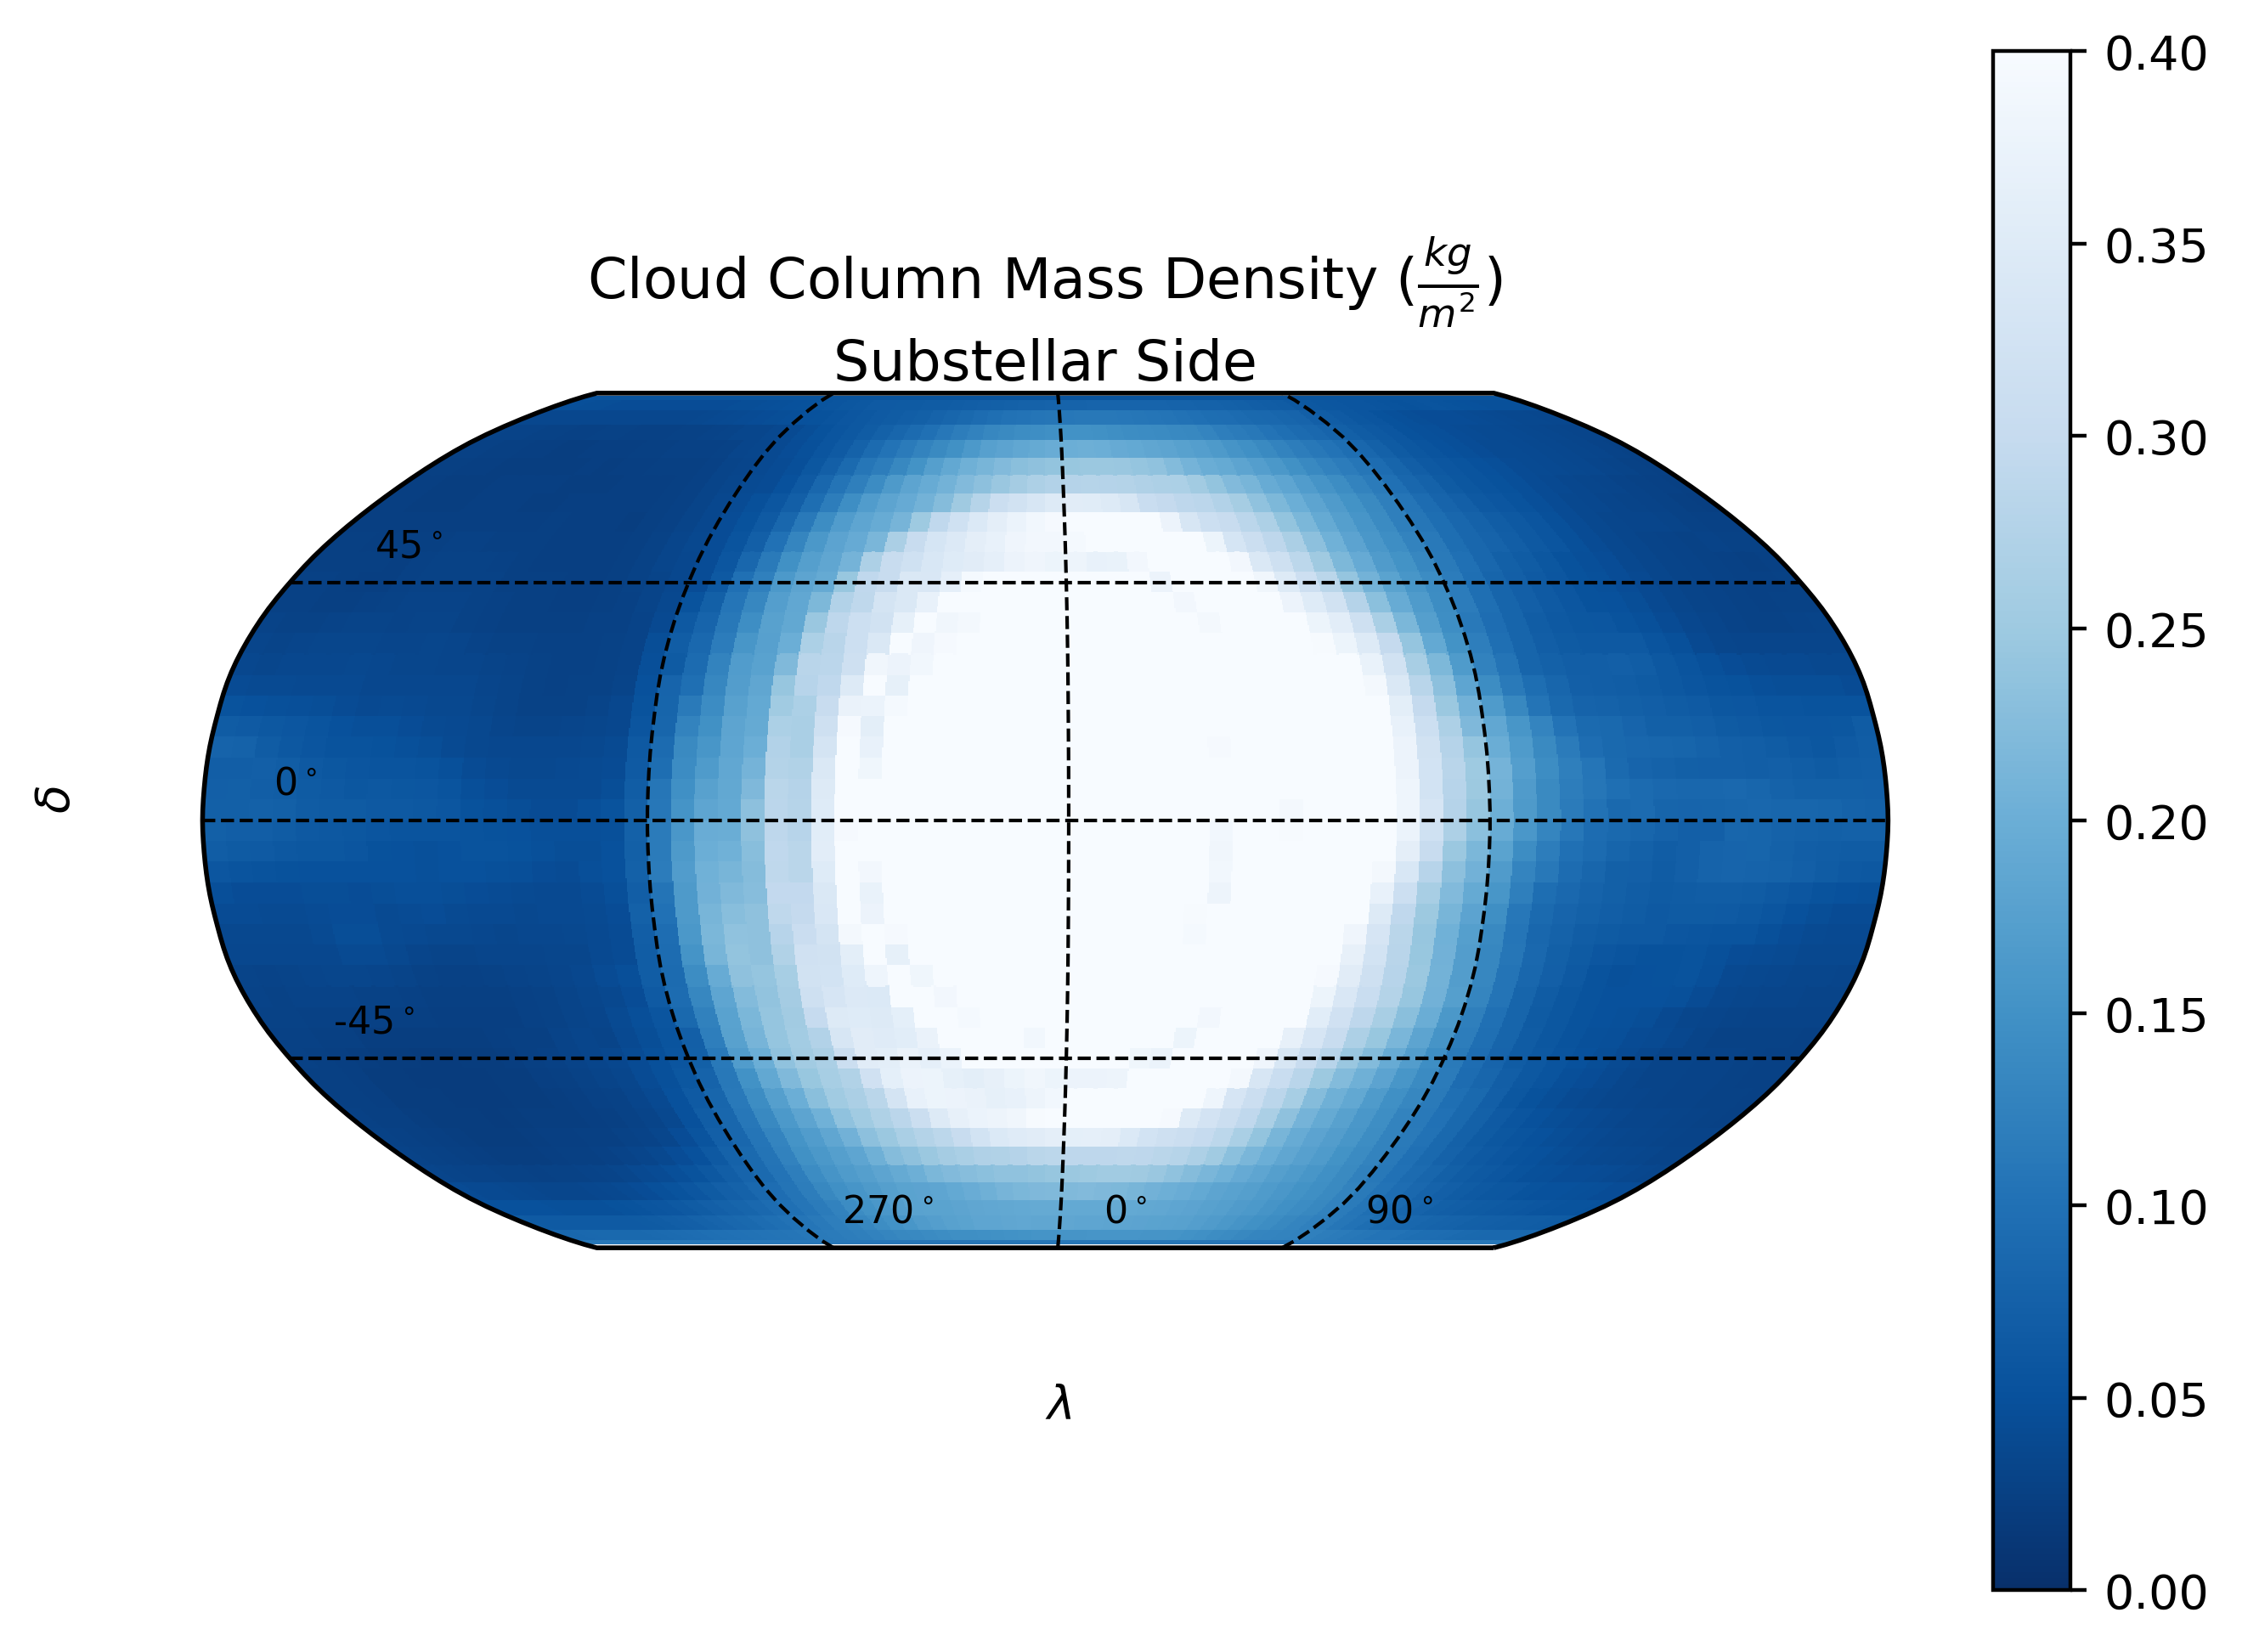

In [191]:
fig = plt.figure(figsize=(8, 6), dpi=400)
ax = fig.gca(projection=ccrs.Robinson())
data = slow.netcdf["TGCLDCWP"][0]/1000
im = ax.imshow(data, cmap=mpl.cm.get_cmap("Blues").reversed(), vmin=0, vmax=0.4,
              transform=ccrs.PlateCarree())
ax.set_title(r"Cloud Column Mass Density ($\frac{kg}{m^2}$)""\nSubstellar Side")
cartopy_populate(ax, label_size=8)
fig.colorbar(im, format="%.2f")
fig.savefig("slow_rotator_cloud_map.png")

## Atmosphere Profile

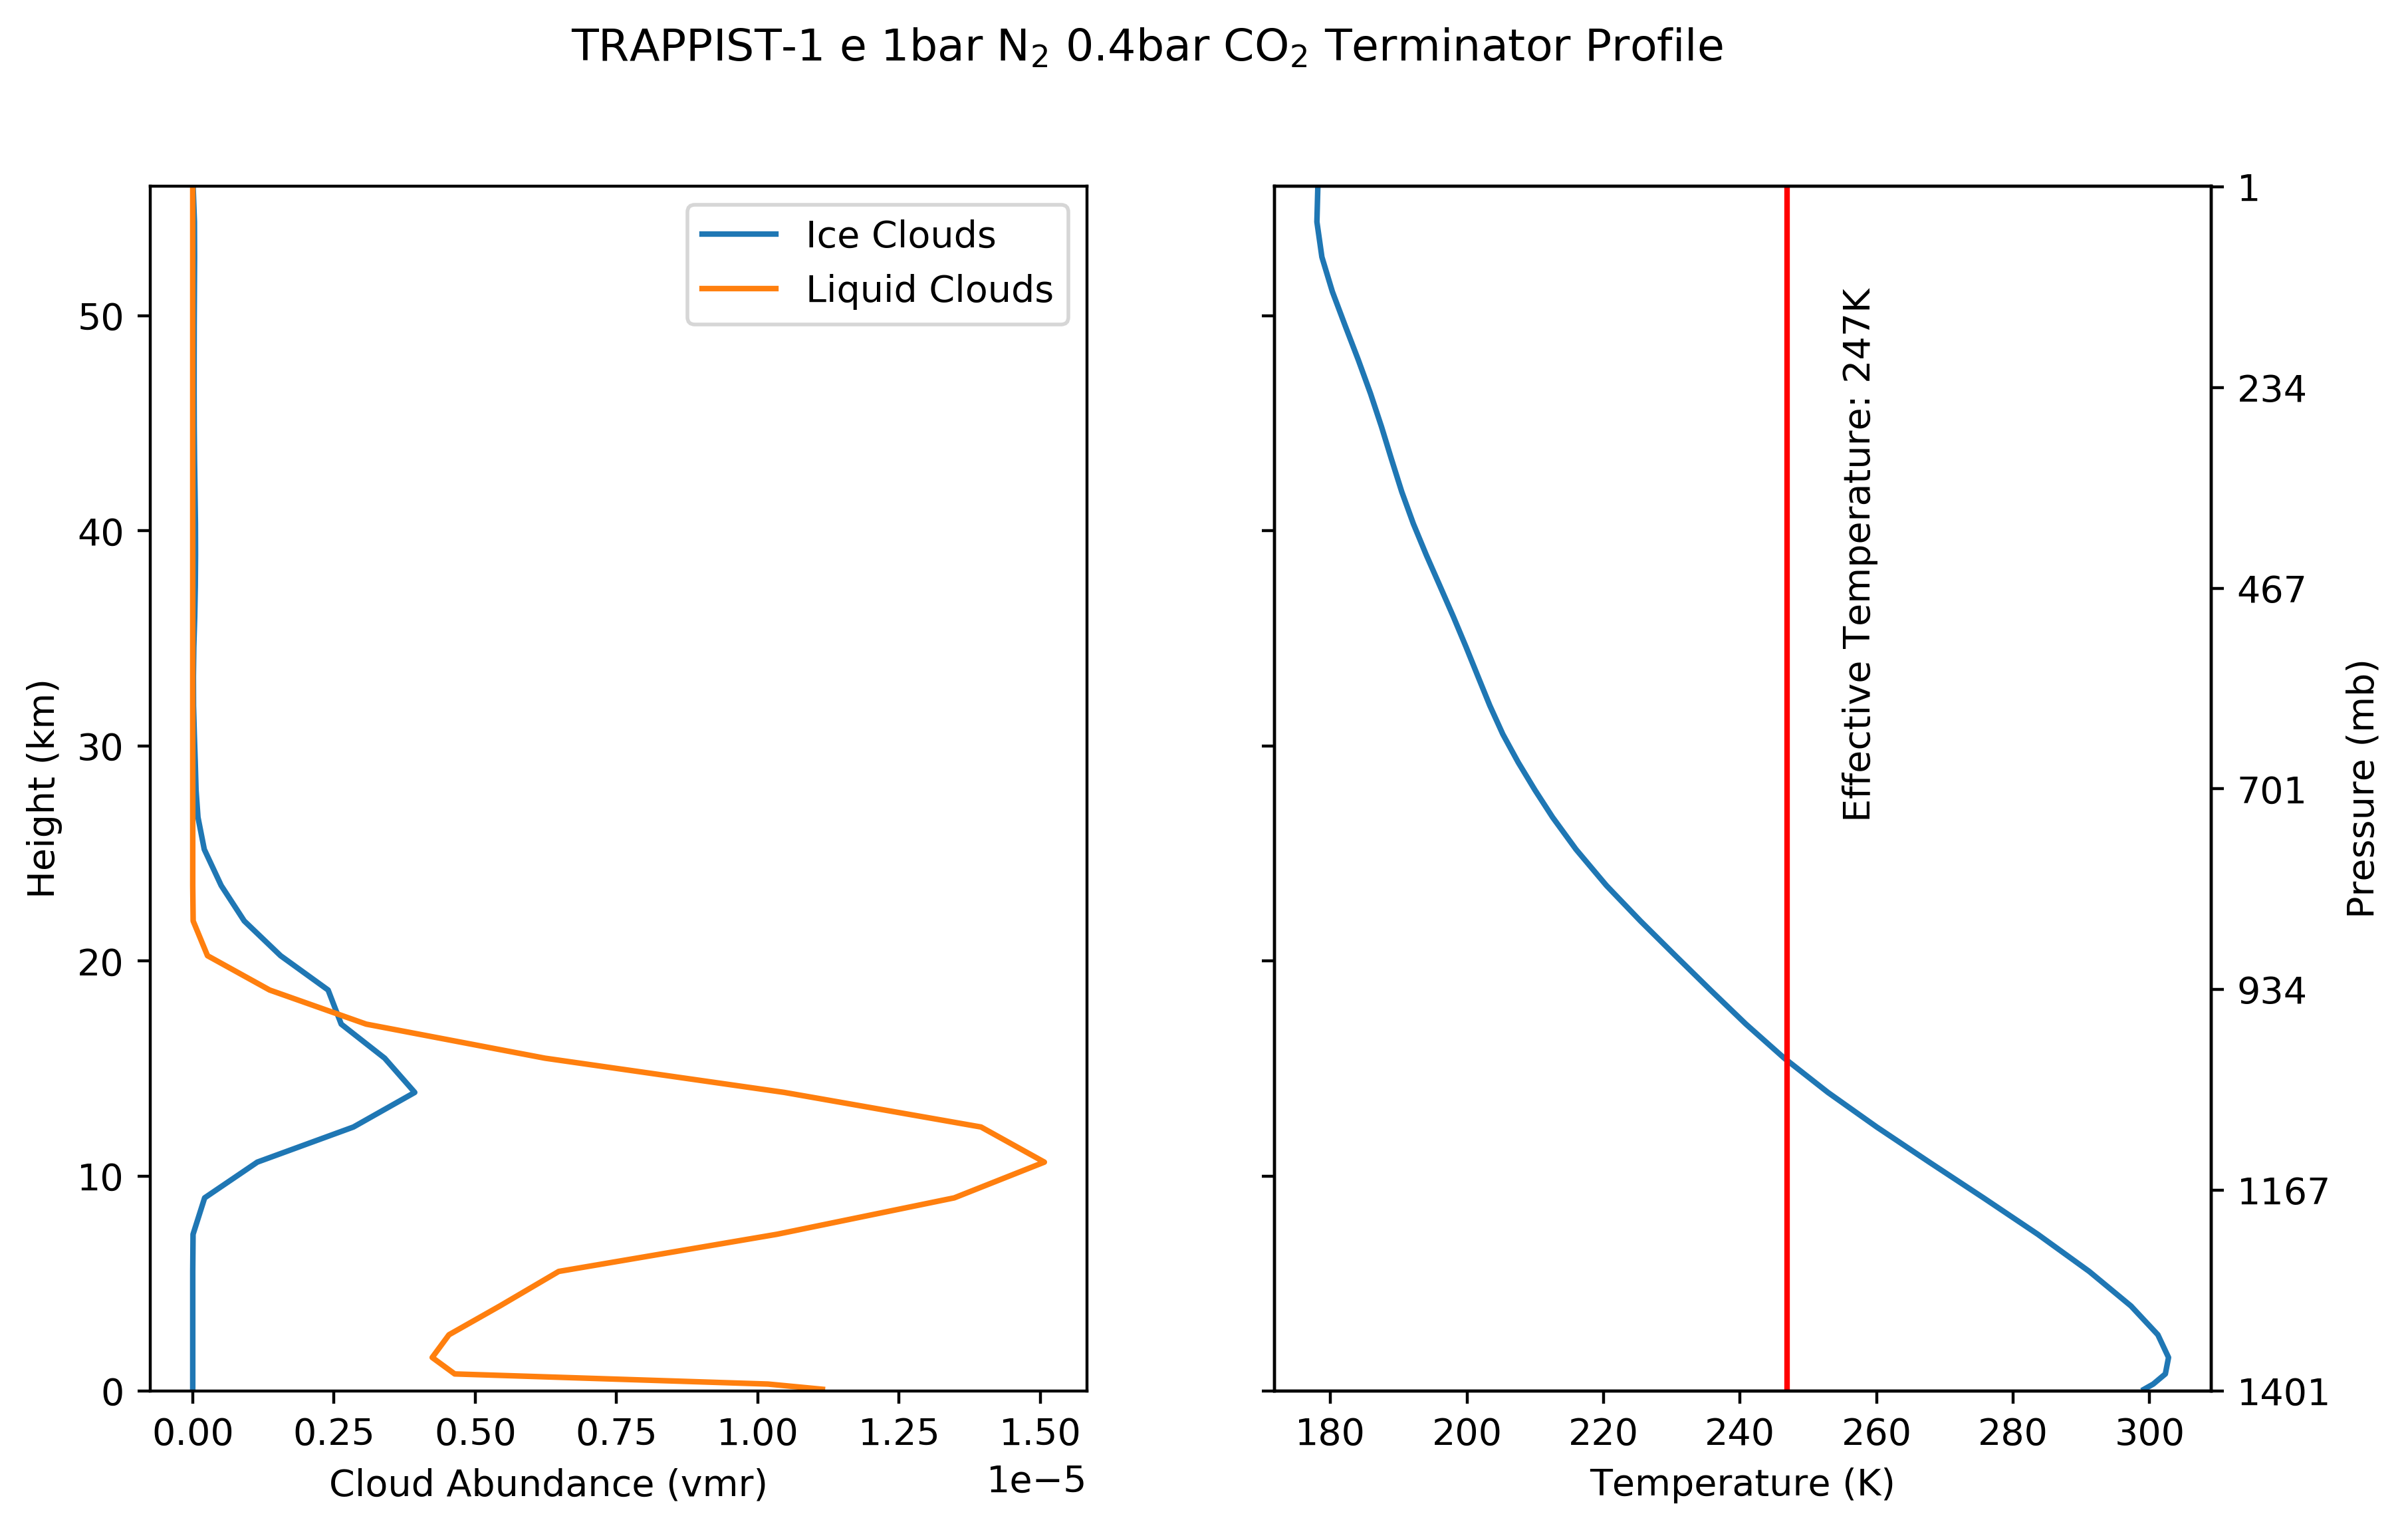

In [192]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,6), dpi=400)
left, right = ax
#left.plot(planet.atmosphere["Pressure"][:40],
#          planet.atmosphere["Height"][:40])
#left.set_xlabel("Pressure (bar)")
#left.set_ylabel("Height (H)")
left.plot(planet.atmosphere["IceCloud"][:40], planet.atmosphere["Height"][:40], label="Ice Clouds")
left.plot(planet.atmosphere["LiquidCloud"][:40], planet.atmosphere["Height"][:40], label="Liquid Clouds")
left.set_xlabel("Cloud Abundance (vmr)            ")
left.set_ylabel("Height (km)")
left.ticklabel_format(style="sci", scilimits=(-4,-3), axis="x")
left.legend()
right.plot(planet.atmosphere["Temperature"][:40], planet.atmosphere["Height"][:40])
right.set_xlabel("Temperature (K)")
right.axvline(planet.planet_data["EffectiveTemp"], c="r")
right.annotate("Effective Temperature: {:.0f}K".format(planet.planet_data["EffectiveTemp"]),
               (255, 50), rotation=90)
fig.suptitle(r"TRAPPIST-1 e 1bar $\mathrm{N}_2$ 0.4bar $\mathrm{CO}_2$ Terminator Profile")
y1, y2 = left.set_ylim(0, np.max(planet.atmosphere["Height"][:40]))
y1, y2 = left.get_ylim()
right_ax = right.twinx()
right_ax.set_ylabel("Pressure (mb)")
right_ax.set_yticks(np.linspace(planet.atmosphere["Pressure"][0]*1000,
                                planet.atmosphere["Pressure"][40]*1000, 7))
right_ax.invert_yaxis()
fig.savefig("atmosphere_profile.png")

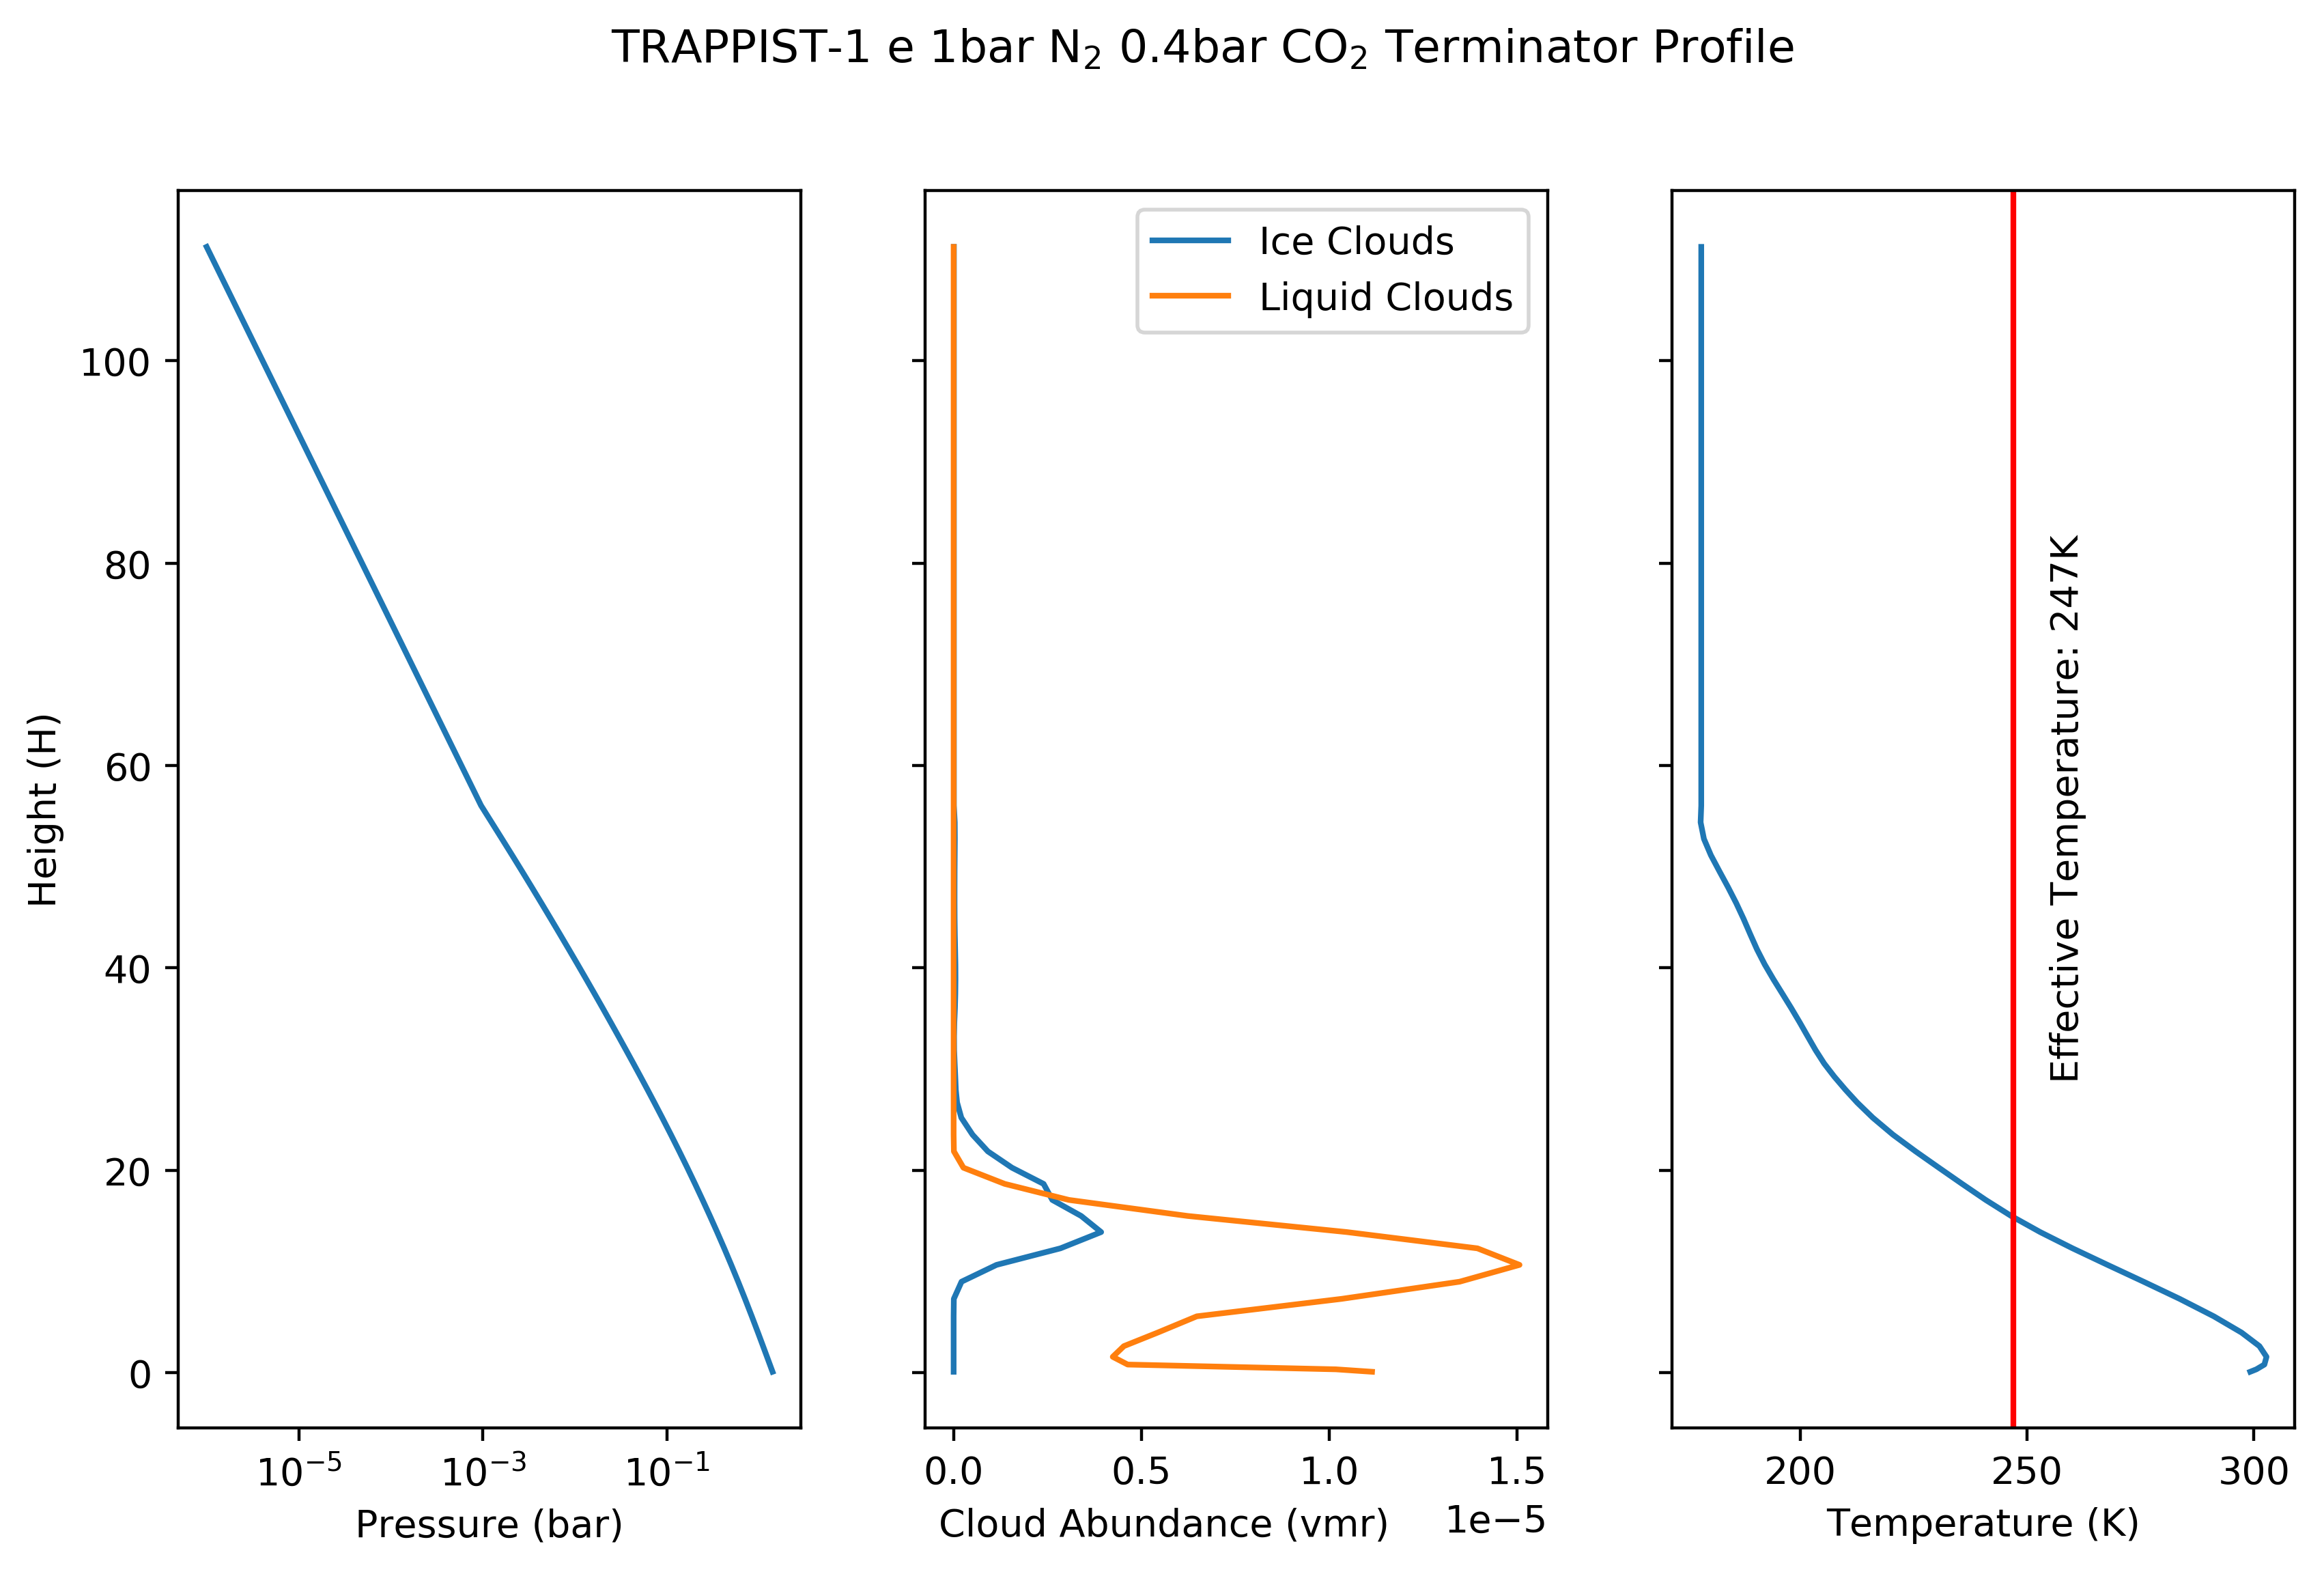

In [193]:
tavg = np.mean(planet.atmosphere["Temperature"][0:40])
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10,6), dpi=400)
left, mid, right = ax
left.plot(planet.atmosphere["Pressure"],
          planet.atmosphere["Height"])
left.set_xlabel("Pressure (bar)")
left.set_ylabel("Height (H)")
left.set_xscale("log")
mid.plot(planet.atmosphere["IceCloud"], planet.atmosphere["Height"], label="Ice Clouds")
mid.plot(planet.atmosphere["LiquidCloud"], planet.atmosphere["Height"], label="Liquid Clouds")
mid.set_xlabel("Cloud Abundance (vmr)            ")
mid.ticklabel_format(style="sci", scilimits=(-4,-3), axis="x")
mid.legend()
right.plot(planet.atmosphere["Temperature"], planet.atmosphere["Height"])
right.set_xlabel("Temperature (K)")
right.axvline(planet.planet_data["EffectiveTemp"], c="r")
right.annotate("Effective Temperature: {:.0f}K".format(planet.planet_data["EffectiveTemp"]),
               (255, 80), rotation=90)
fig.suptitle(r"TRAPPIST-1 e 1bar $\mathrm{N}_2$ 0.4bar $\mathrm{CO}_2$ Terminator Profile")
fig.savefig("atmosphere_profile_tall.png")

In [194]:
os.system("cp precipitation_map.png ../../Thesis/models")
os.system("cp surfacet_co2.png ../../Thesis/models")
os.system("cp surfacet_n2.png ../../Thesis/models")
os.system("cp cloud_map.png ../../Thesis/models")
os.system("cp precipitation_map.png ../../Thesis/models")
os.system("cp slow_rotator_cloud_map.png ../../Thesis/models")
os.system("cp atmosphere_profile.png ../../Thesis/models")
os.system("cp atmosphere_profile_tall.png ../../Thesis/models")

# Methods
## Phase Weights

Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to ../ModelFiles\trappist1e_1barN2_0.4barCO2_aqua_0_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to ../ModelFiles\trappist1e_1barN2_0.4barCO2_aqua_90_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to ../ModelFiles\trappist1e_1barN2_0.4barCO2_aqua_180_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to ../ModelFile

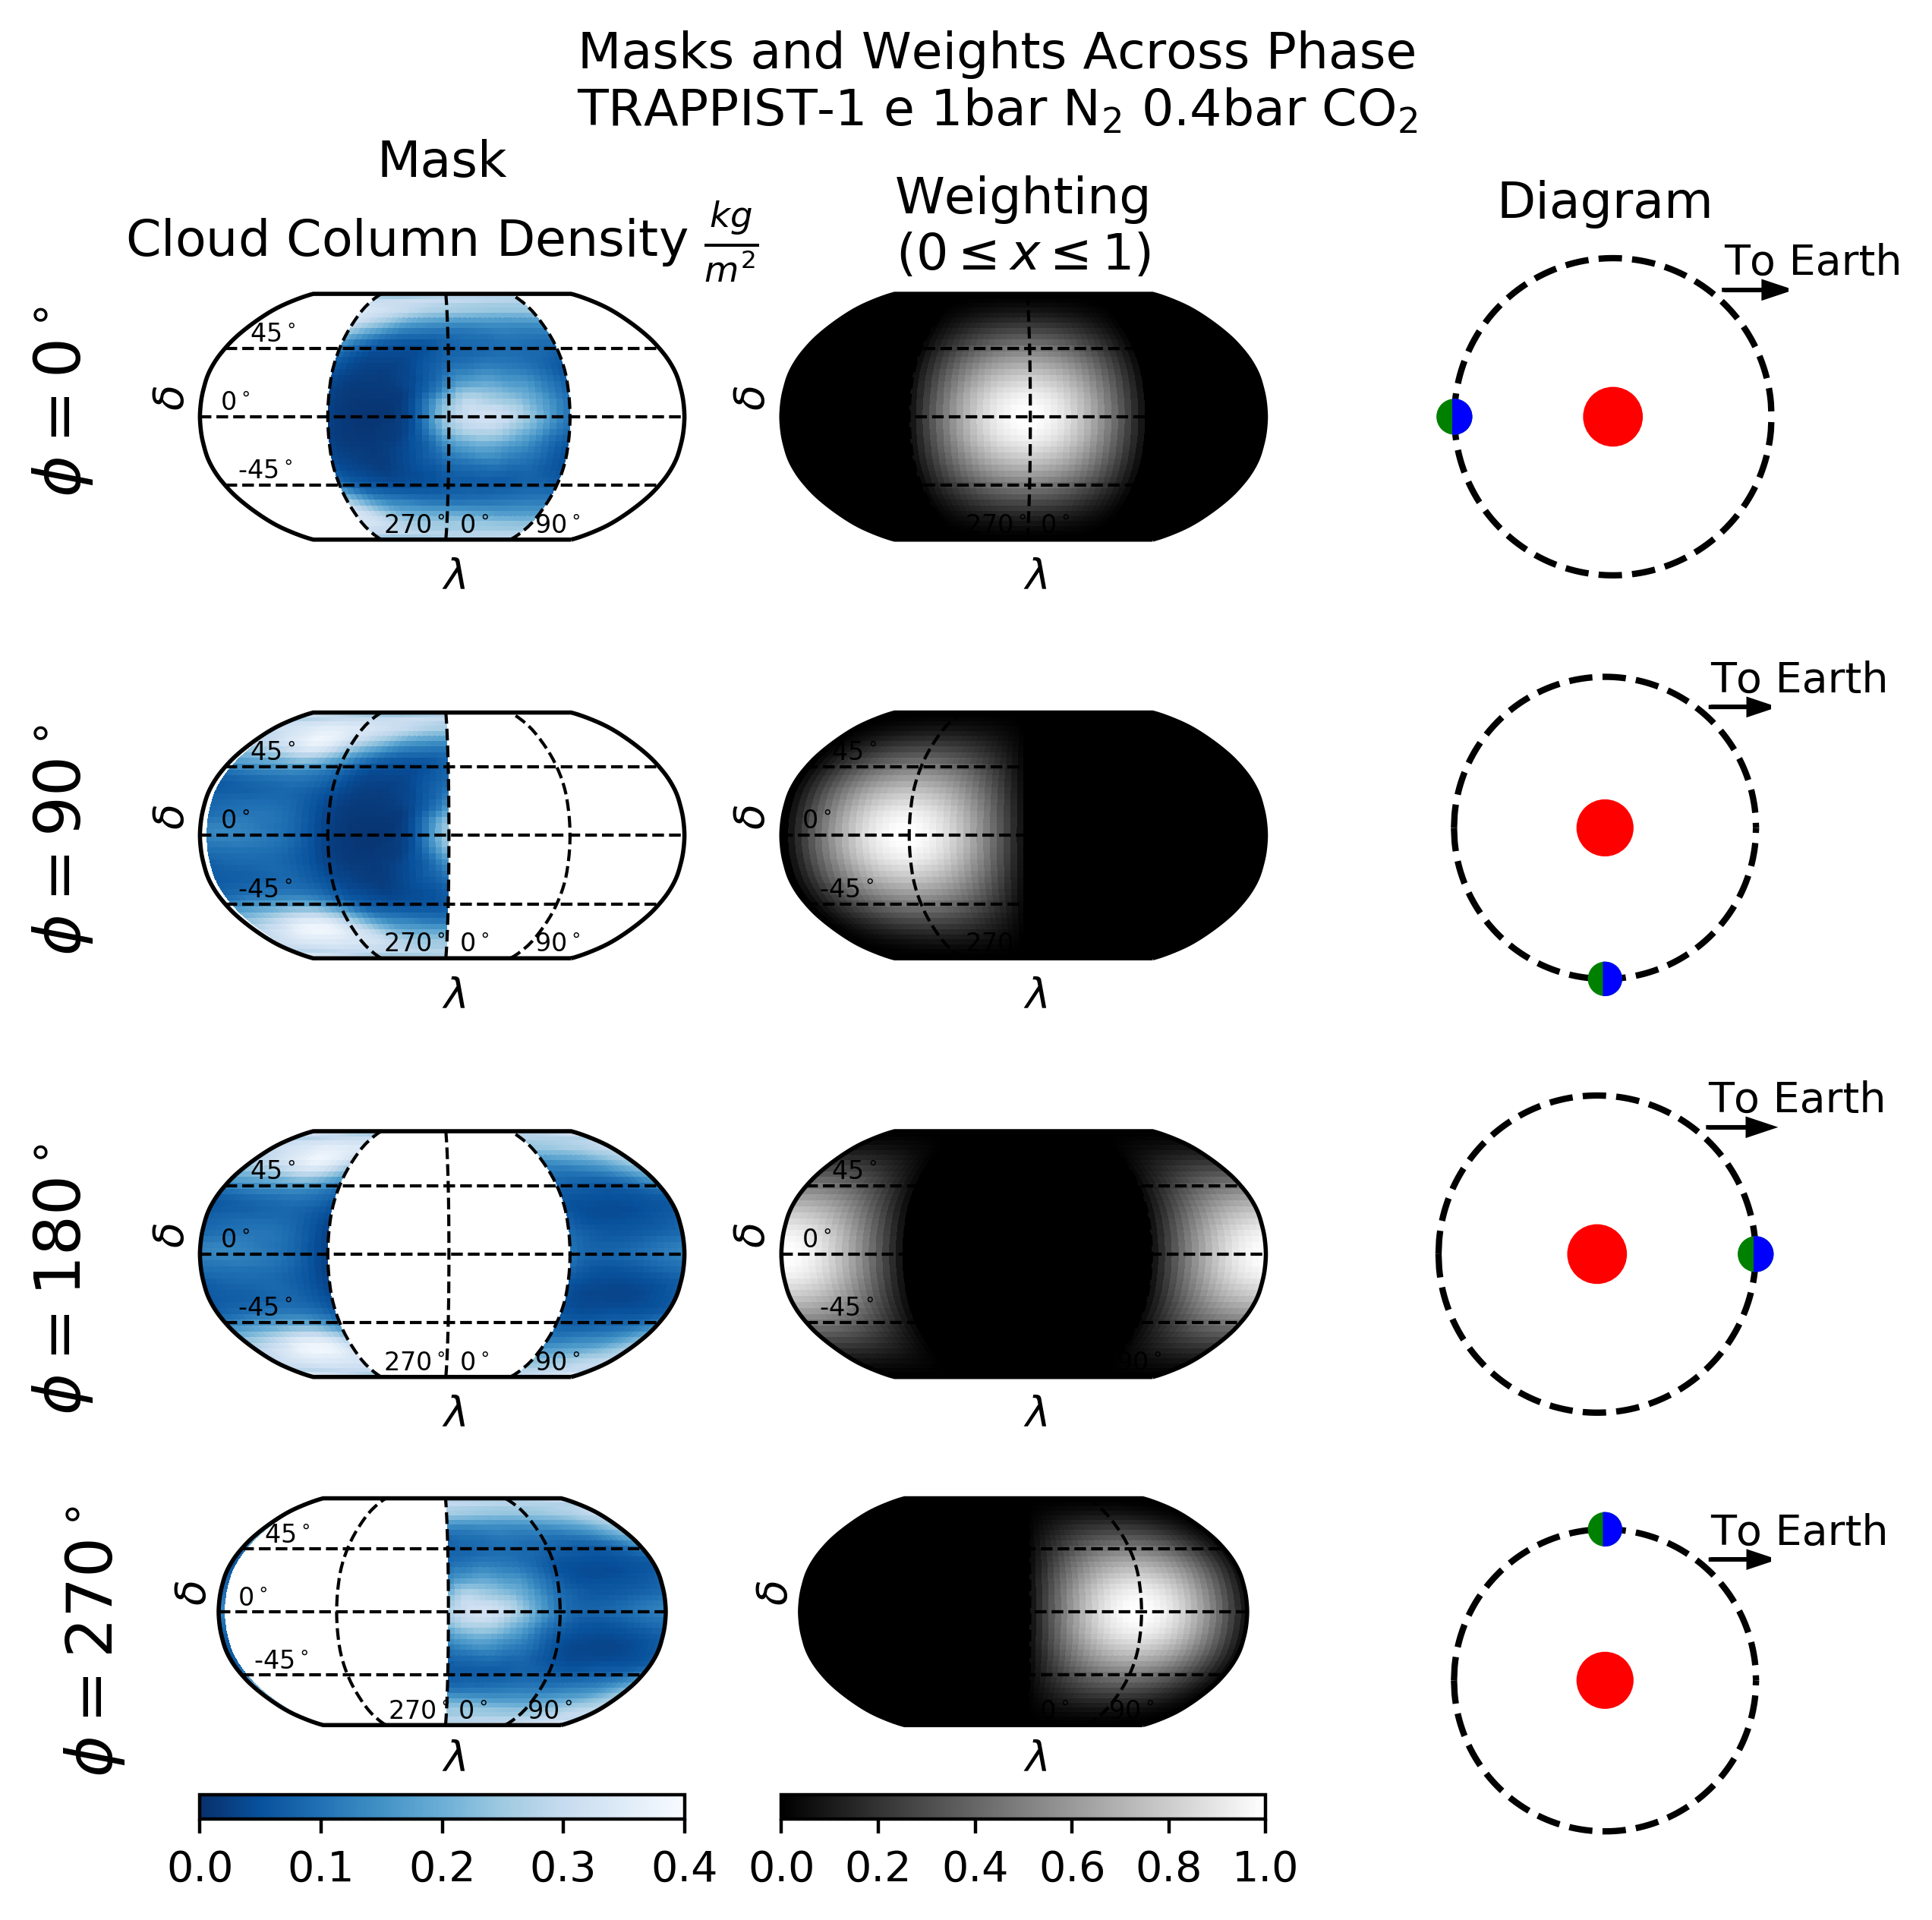

In [44]:
phases = [0, 90, 180, 270]
fig = plt.figure(figsize=(7, 7), dpi=400)
#fig.tight_layout()
for i, phase in enumerate(phases):
    psg = PSG.PSG("TRAPPIST-1 e")
    psg.fetch_archive()
    psg.from_cdf(files[11], phase=phase, is_transit=False)
    psg.calculate(n_uplayers=7, atmosphere_ceiling=1e-6)
    lats = psg.netcdf["lat"][:]
    lons = psg.netcdf["lon"][:]
    cloud_abun = psg.netcdf["TGCLDCWP"][0]/1000
    weighting = np.outer(psg.lat_weight, psg.lon_weight)
    mask = weighting > 0
    cloud_mask = np.ma.masked_array(cloud_abun, ~psg.mask)
    
    left = plt.subplot(4, 3, i*3+1, projection=ccrs.Robinson())
    left_im = left.imshow(cloud_mask, cmap=mpl.cm.get_cmap("Blues").reversed(),
                          vmin=0, vmax=0.4, transform=ccrs.PlateCarree())
    cartopy_populate(left)
    
    mid = plt.subplot(4 ,3, i*3+2, projection=ccrs.Robinson())
    mid_im = mid.imshow(weighting, vmin=0, vmax=1, cmap="gray",
                        transform=ccrs.PlateCarree())
    cartopy_populate(mid)
    
    right = plt.subplot(4, 3, i*3+3)
    right.add_patch(plt.Circle((0,0), radius=0.35, color="r", label="Parent Star"))
    
    #right.axhline(0, linewidth=0.5, linestyle="--", color="k",
    #               xmin=0.05, xmax=0.95)
    x = np.linspace(-2, 2, 500)
    right.plot(x, np.sqrt(4-x**2), "k--", label="Orbital Path")
    right.plot(x, -np.sqrt(4-x**2), "k--")
    right.add_patch(plt.Circle((2*np.cos(np.deg2rad(phase)+np.pi),
                                2*np.sin(np.deg2rad(phase)+np.pi)), radius=0.2,
                            color="g", zorder=10, label="Exoplanet"))
    right.add_patch(Wedge((2*np.cos(np.deg2rad(phase)+np.pi),
                                2*np.sin(np.deg2rad(phase)+np.pi)), .2,
                          -90, 90, width=0.2, zorder=11, color="b"))
    right.arrow(1.4,1.6,0.5,0, head_width=0.2, facecolor="k")
    right.annotate("To Earth", (1.4, 1.8))
    right.get_xaxis().set_visible(False)
    right.get_yaxis().set_visible(False)
    right.set_xlim(-2.2, 2.2)
    right.set_ylim(-2.2, 2.2)
    right.axis("off")
    right.axis('scaled')
    
    if i == 0:
        left.set_title("Mask\n"
             r"Cloud Column Density $\frac{kg}{m^2}$")
        mid.set_title("Weighting\n"
             r"($0\leq x \leq1$)")
        right.set_title("Diagram")
    left.annotate(f"$\phi=$" f"{phase:.0f}" r"$^\circ$", (-0.35, 0.75),
                  xycoords="axes fraction", rotation=90, zorder=12, size=15)
    
    if i == 3:
        fig.colorbar(left_im, orientation="horizontal", ax=left, pad=0.2,
                     ticks=np.arange(0,0.41,0.1))
        fig.colorbar(mid_im, orientation="horizontal", ax=mid, pad=0.2)
fig.suptitle("Masks and Weights Across Phase\nTRAPPIST-1 e 1bar "
             r"$\mathrm{N}_2$ 0.4bar $\mathrm{CO}_2$")
fig.savefig("phases_weights.png")

## Transit Weights

Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to ../ModelFiles\trappist1e_1barN2_0.4barCO2_aqua_terminator.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere


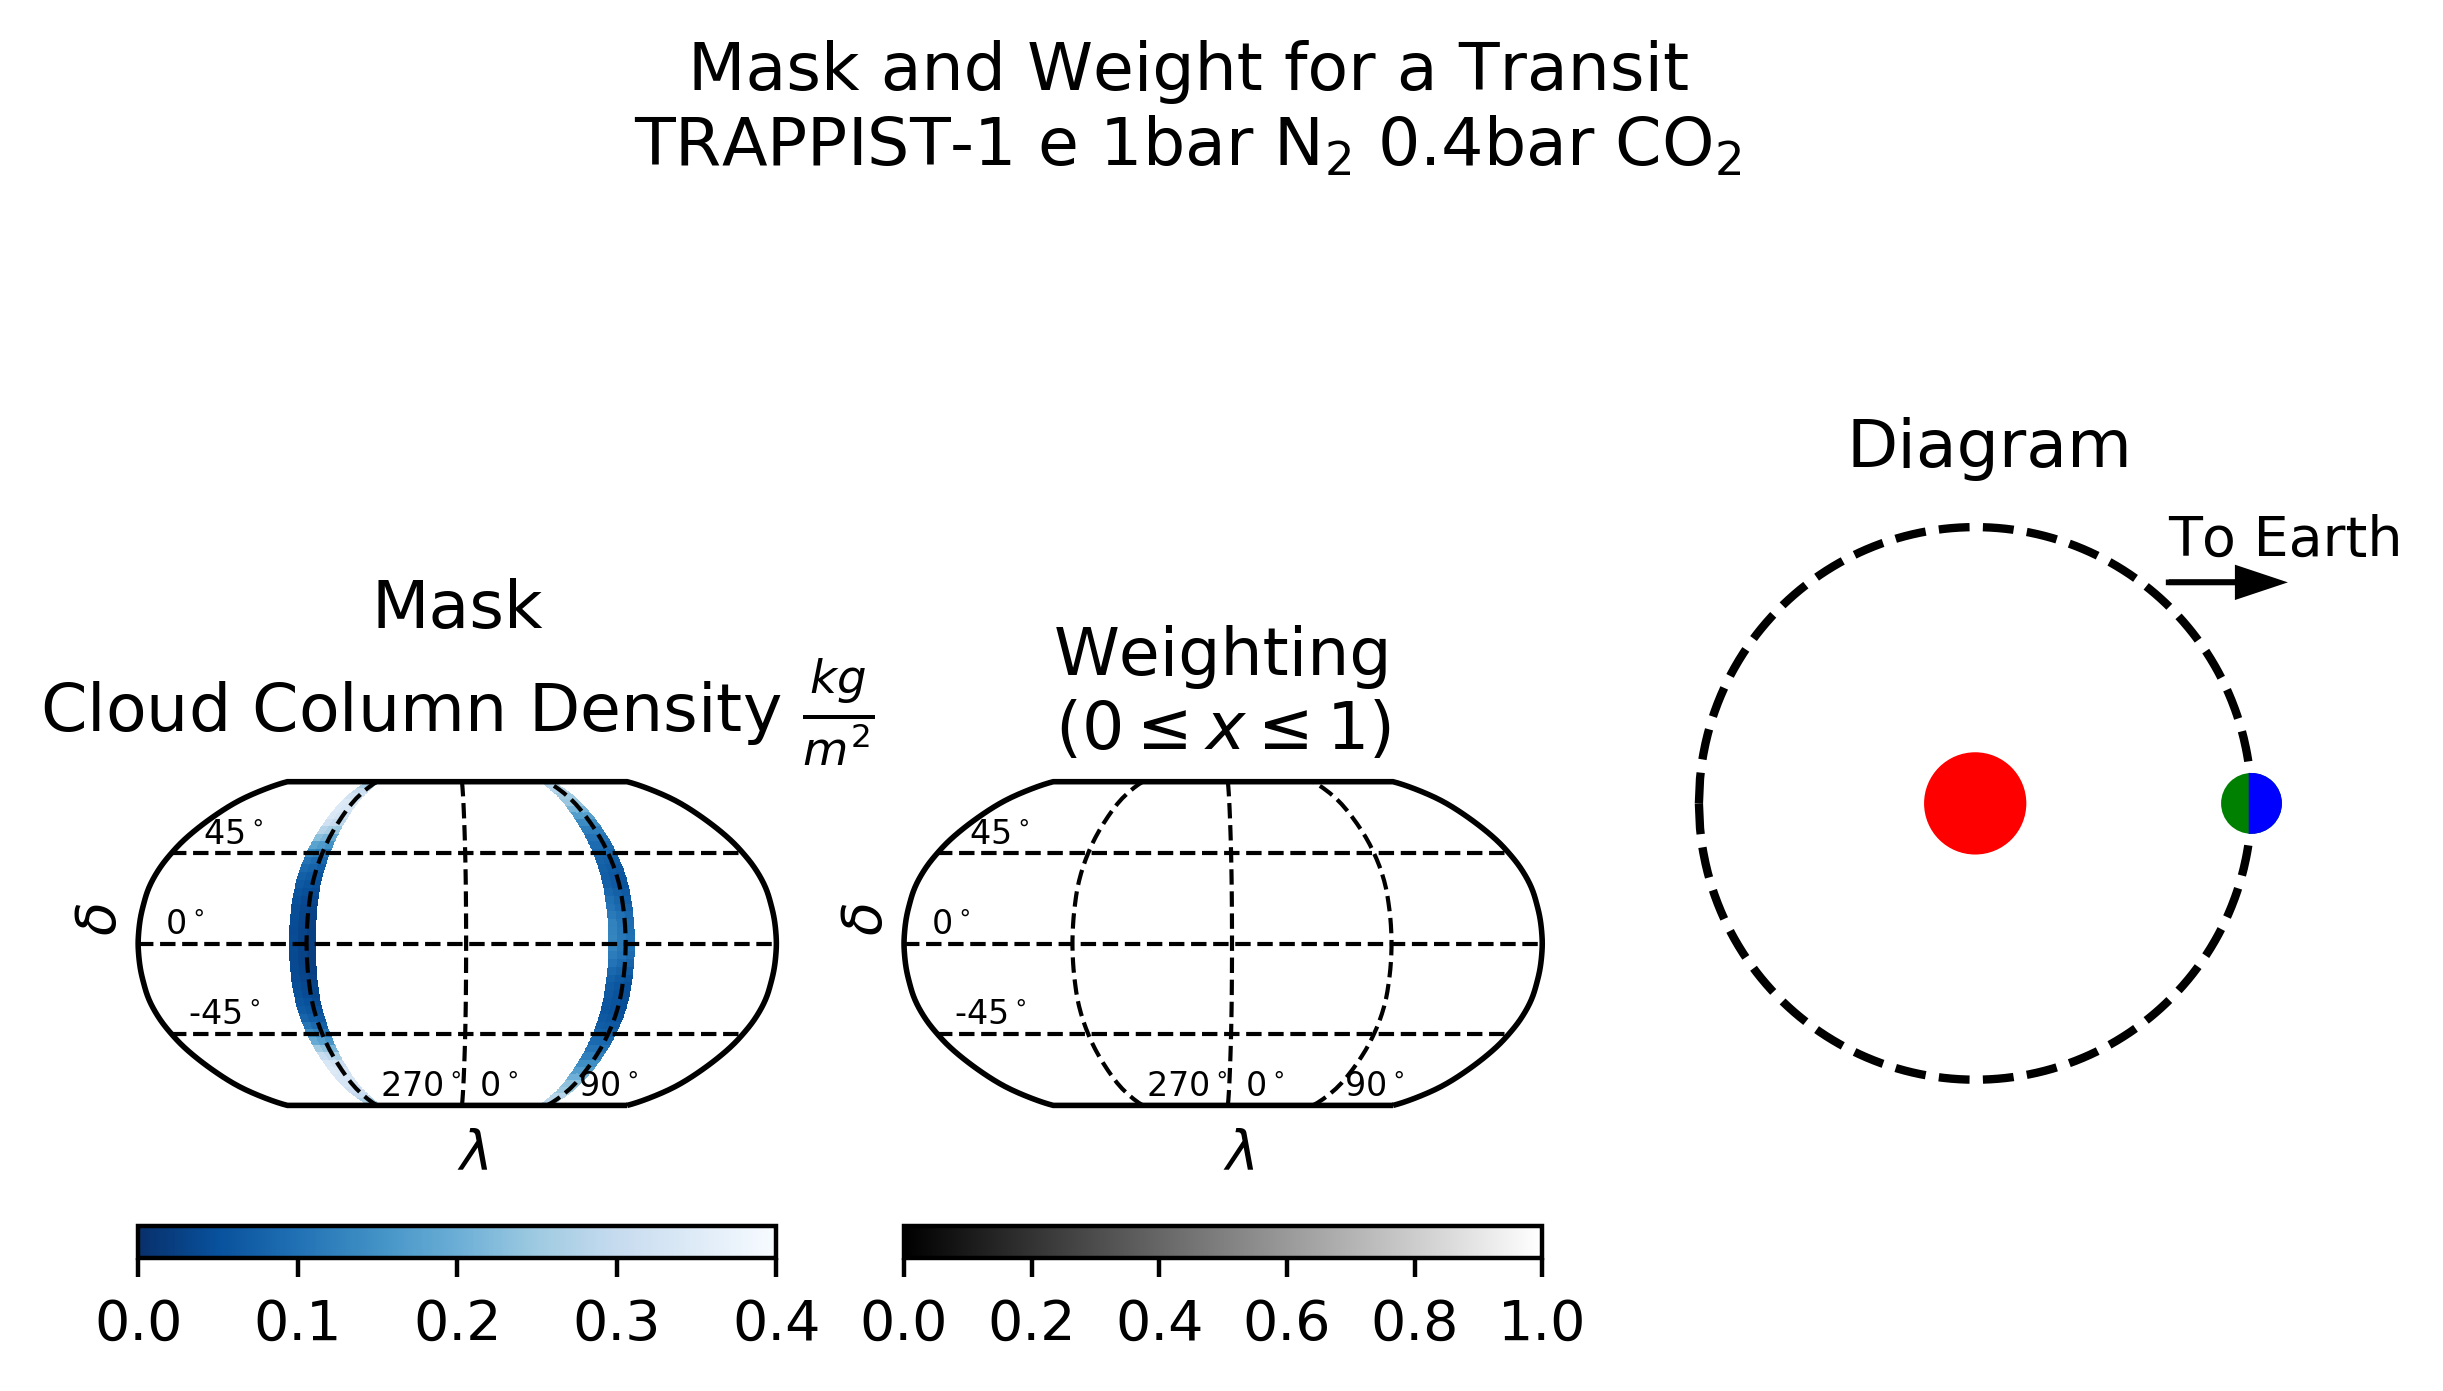

In [45]:
fig = plt.figure(figsize=(7,4), dpi=400)
phase=180
psg = PSG.PSG("TRAPPIST-1 e")
psg.fetch_archive()
psg.from_cdf(files[11], phase=phase, is_transit=True)
psg.calculate(n_uplayers=7, atmosphere_ceiling=1e-6)
lats = psg.netcdf["lat"][:]
lons = psg.netcdf["lon"][:]
cloud_abun = psg.netcdf["TGCLDCWP"][0]/1000
weighting = np.outer(psg.lat_weight, psg.lon_weight)
mask = weighting > 0
cloud_mask = np.ma.masked_array(cloud_abun, ~psg.mask)

left = plt.subplot(1, 3, 1, projection=ccrs.Robinson())
left.imshow(cloud_mask, cmap=mpl.cm.get_cmap("Blues").reversed(), vmin=0,
            vmax=0.4, transform=ccrs.PlateCarree())
cartopy_populate(left)

mid = plt.subplot(1, 3, 2, projection=ccrs.Robinson())
mid_weight = mid.imshow(weighting, vmin=0, vmax=1, cmap="gray",
           transform=ccrs.PlateCarree())
cartopy_populate(mid)

right = plt.subplot(1, 3, 3)
right.add_patch(plt.Circle((0,0), radius=0.35, color="r", label="Parent Star"))

x = np.linspace(-2, 2, 500)
right.plot(x, np.sqrt(4-x**2), "k--", label="Orbital Path")
right.plot(x, -np.sqrt(4-x**2), "k--")
right.add_patch(plt.Circle((2*np.cos(np.deg2rad(phase)+np.pi),
                            2*np.sin(np.deg2rad(phase)+np.pi)), radius=0.2,
                        color="g", zorder=10, label="Exoplanet"))
right.add_patch(Wedge((2*np.cos(np.deg2rad(phase)+np.pi),
                            2*np.sin(np.deg2rad(phase)+np.pi)), .2,
                      -90, 90, width=0.2, zorder=11, color="b"))
right.arrow(1.4,1.6,0.5,0, head_width=0.2, facecolor="k")
right.annotate("To Earth", (1.4, 1.8))
right.get_xaxis().set_visible(False)
right.get_yaxis().set_visible(False)
right.set_xlim(-2.2, 2.2)
right.set_ylim(-2.2, 2.2)
right.axis("off")
right.axis('scaled')

left.set_title("Mask\n" r"Cloud Column Density $\frac{kg}{m^2}$")
mid.set_title("Weighting\n" r"($0\leq x \leq1$)")
right.set_title("Diagram")

fig.colorbar(left_im, orientation="horizontal", ax=left, pad=0.1,
             ticks=np.arange(0, 0.41, 0.1))
fig.colorbar(mid_weight, orientation="horizontal", ax=mid, pad=0.1)
fig.suptitle("Mask and Weight for a Transit\nTRAPPIST-1 e 1bar "
         r"$\mathrm{N}_2$ 0.4bar $\mathrm{CO}_2$")
fig.savefig("transit_weights.png")

In [46]:
os.system("cp phases_weights.png ../../Thesis/methods")
os.system("cp transit_weights.png ../../Thesis/methods")

# Spectra

## Standard Transit

In [4]:
miri = PSG.PSG("TRAPPIST-1 e")
miri.fetch_archive()
miri.from_cdf(files[11])
miri.calculate(atmosphere_ceiling=1e-6, n_uplayers=7)
miri.write("MIRI-MRS", exposure_time=18, exposure_count=200)
miri.send(key="4ce8cefdcc7d90cb5070")
miri.plot_setup()

Starting PSG for TRAPPIST-1 e
    Retrieving planet variables from NASA's Exoplanet Archive
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_transit_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    7 files created
    Ready to Make Plots


In [5]:
nirspec = PSG.PSG("TRAPPIST-1 e")
nirspec.fetch_archive()
nirspec.from_cdf(files[11])
nirspec.calculate(atmosphere_ceiling=1e-6, n_uplayers=7)
nirspec.write("NIRSpec-2700", exposure_time=8, exposure_count=400)
nirspec.send(key="4ce8cefdcc7d90cb5070")
nirspec.plot_setup()

Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_transit_NIRSpec-2700_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    7 files created
    Ready to Make Plots


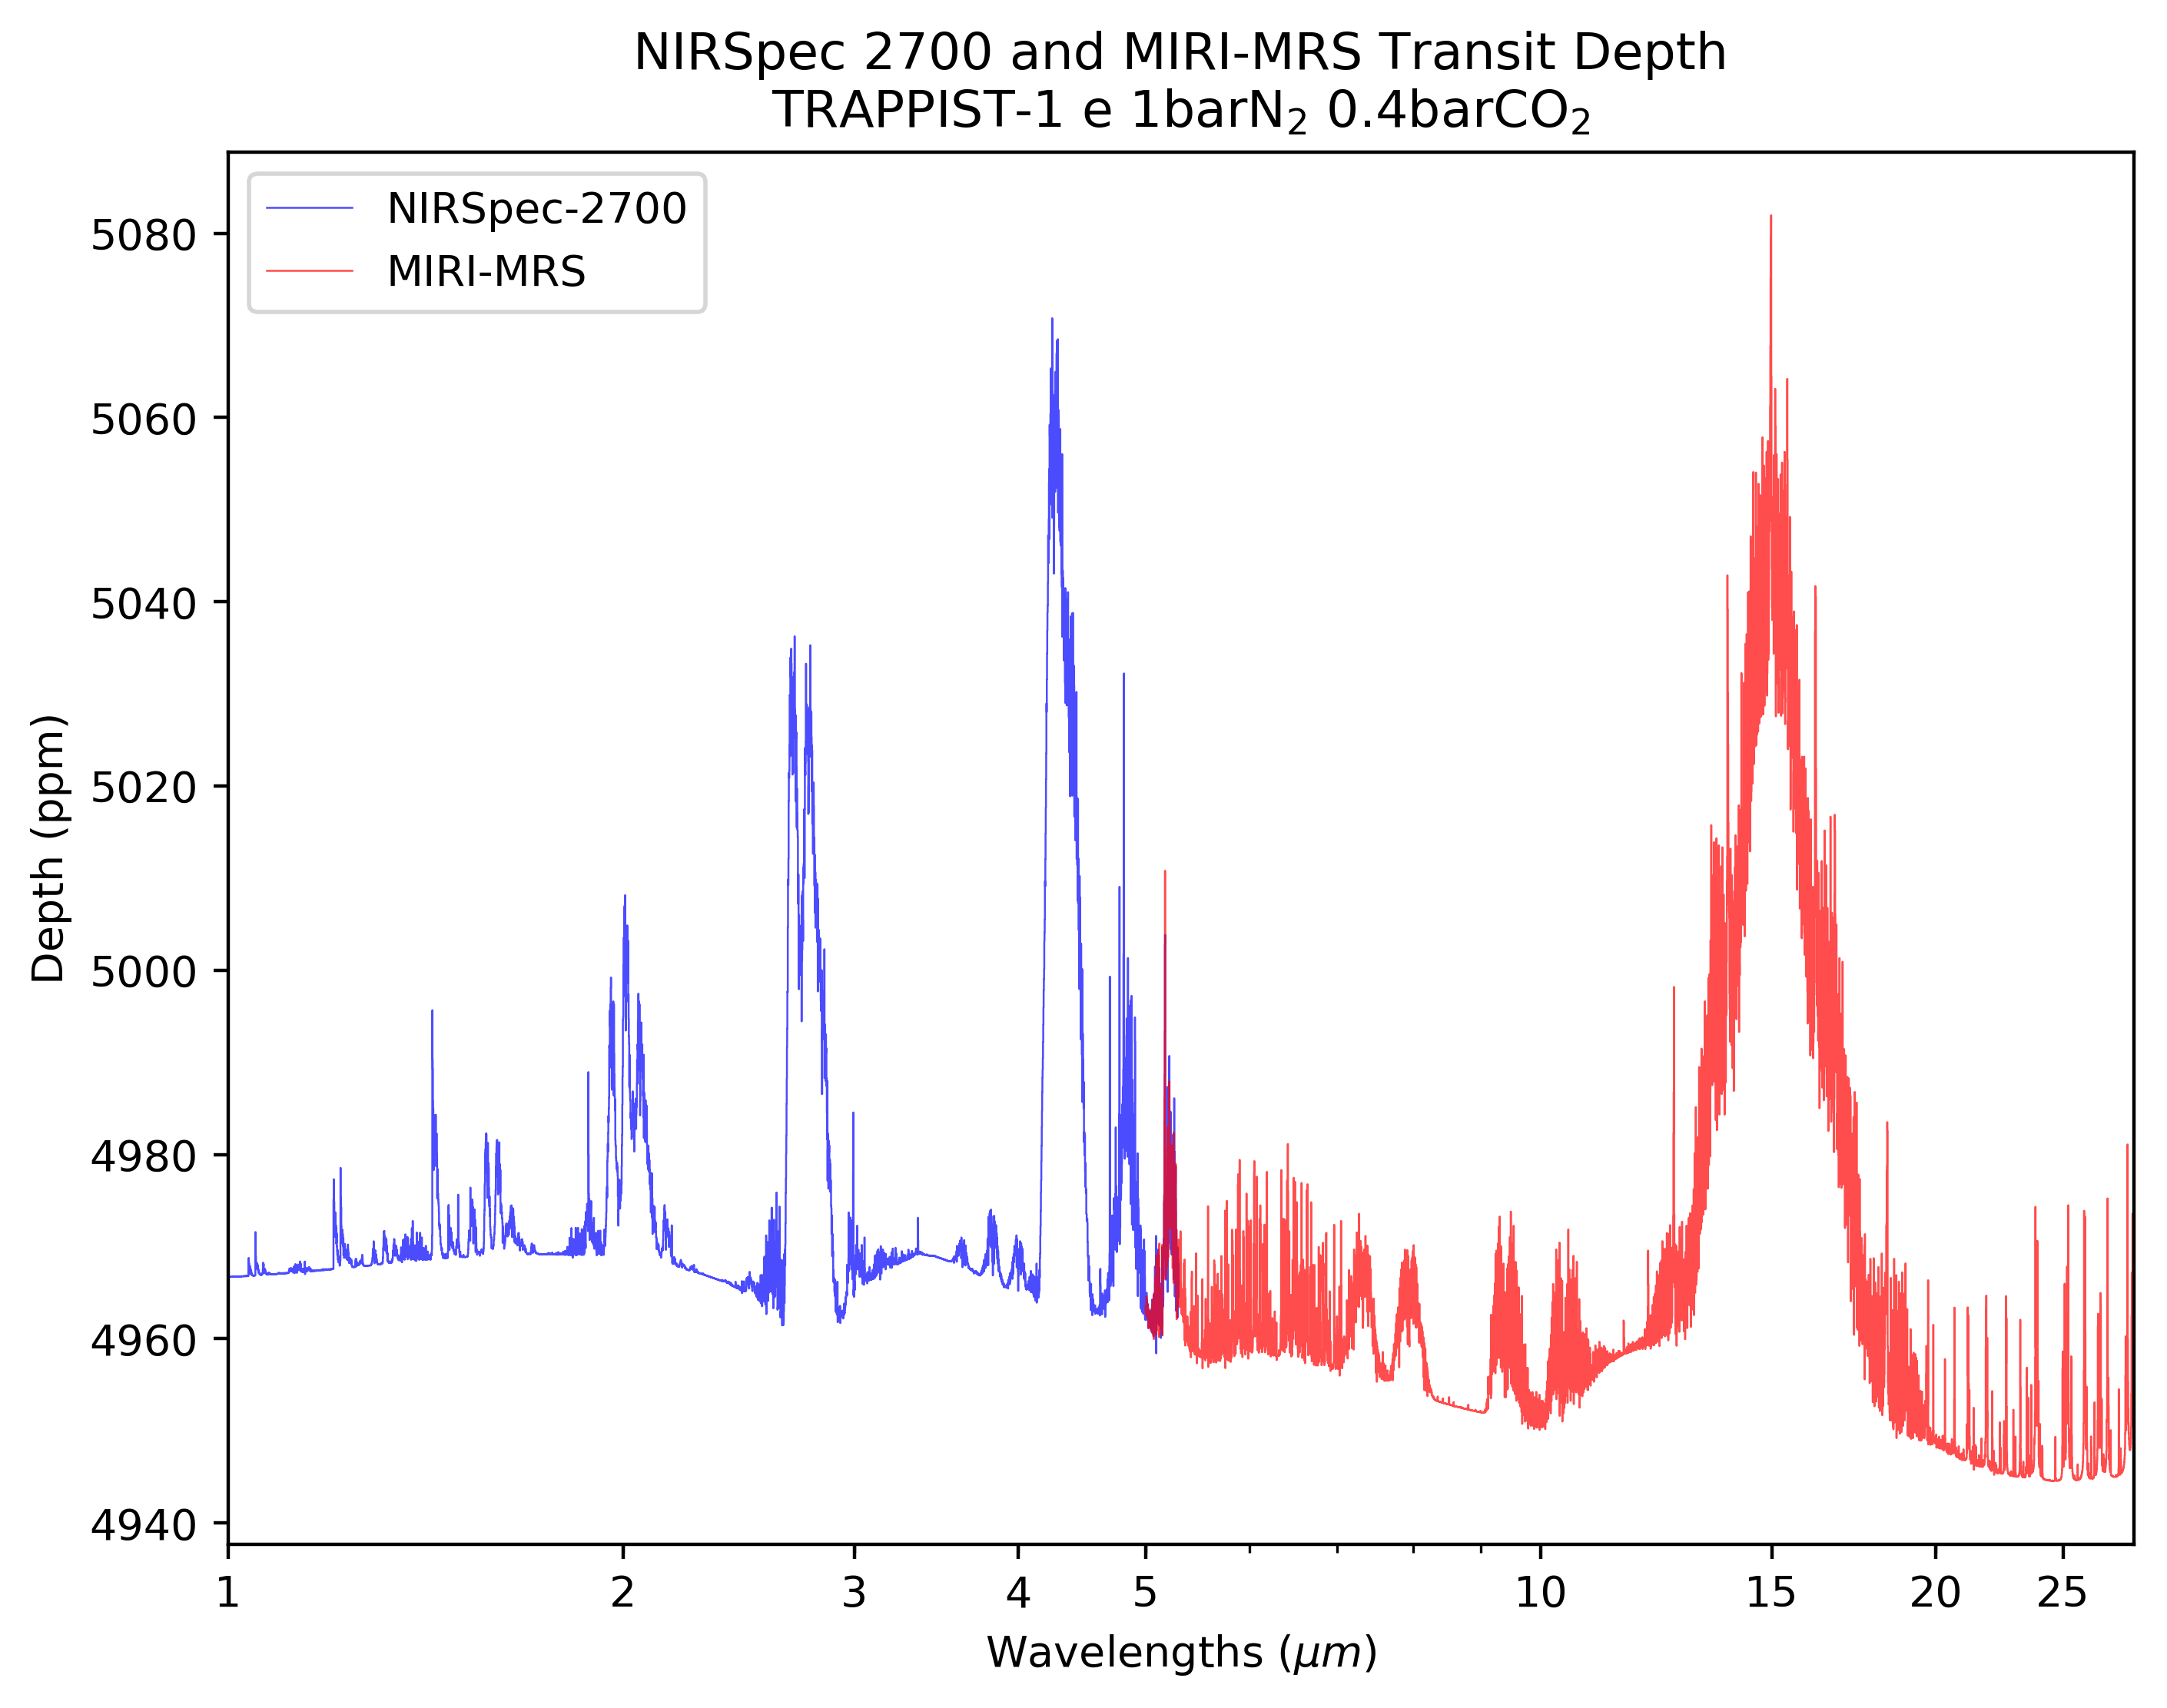

In [6]:
fig = plt.figure(figsize=(8, 6), dpi=400)
ax = fig.gca()
ax.step(nirspec.Wavelengths, nirspec.Transit*1e6, linewidth=0.45, where="post",
        c="b", alpha=0.7, label="NIRSpec-2700")
ax.step(miri.Wavelengths, miri.Transit*1e6, linewidth=0.45, where="post",
        c="r", alpha=0.7, label="MIRI-MRS")
ax.set_xlabel(r"Wavelengths ($\mu m$)")
ax.set_ylabel("Depth (ppm)")
ax.set_title("NIRSpec 2700 and MIRI-MRS Transit Depth\n"
             r"TRAPPIST-1 e 1bar$\mathrm{N}_2$ 0.4bar$\mathrm{CO}_2$")
ax.set_xlim(nirspec._plot_range[0], miri._plot_range[1])
ax.set_xscale("log")
ax.set_xticks([1, 2, 3, 4, 5, 10, 15, 20, 25])
ax.set_xticklabels([1, 2, 3, 4, 5, 10, 15, 20, 25])
ax.legend()
fig.savefig("miri_nirspec_depth.png")

## Missing Species

In [8]:
dry = PSG.PSG("TRAPPIST-1 e")
dry.fetch_archive()
dry.from_cdf(files[11])
dry.calculate(1e-6, 7)
dry.atmosphere["H2O"] *= 0
dry.atmosphere["LiquidCloud"] *= 0
dry.atmosphere["IceCloud"] *= 0
dry.write(scope='MIRI-MRS')
dry.send(key="4ce8cefdcc7d90cb5070")
dry.plot_setup()
time.sleep(1)

noN2 = PSG.PSG("TRAPPIST-1 e")
noN2.fetch_archive()
noN2.from_cdf(files[11])
noN2.calculate(1e-6, 7)
noN2.atmosphere["N2"] *= 0
noN2.write(scope='MIRI-MRS')
noN2.send(key="4ce8cefdcc7d90cb5070")
noN2.plot_setup()
time.sleep(1)

noCO2 = PSG.PSG("TRAPPIST-1 e")
noCO2.fetch_archive()
noCO2.from_cdf(files[11])
noCO2.calculate(1e-6, 7)
noCO2.atmosphere["CO2"] *= 0
noCO2.write(scope='MIRI-MRS')
noCO2.send(key="4ce8cefdcc7d90cb5070")
noCO2.plot_setup()

notop = PSG.PSG("TRAPPIST-1 e")
notop.fetch_archive()
notop.from_cdf(files[11])
notop.calculate()
notop.write("MIRI-MRS")
notop.send(key="4ce8cefdcc7d90cb5070")
notop.plot_setup()

nirdry = PSG.PSG("TRAPPIST-1 e")
nirdry.fetch_archive()
nirdry.from_cdf(files[11])
nirdry.calculate(1e-6, 7)
nirdry.atmosphere["H2O"] *= 0
nirdry.atmosphere["LiquidCloud"] *= 0
nirdry.atmosphere["IceCloud"] *= 0
nirdry.write(scope='NIRSpec-2700')
nirdry.send(key="4ce8cefdcc7d90cb5070")
nirdry.plot_setup()


nirnoN2 = PSG.PSG("TRAPPIST-1 e")
nirnoN2.fetch_archive()
nirnoN2.from_cdf(files[11])
nirnoN2.calculate(1e-6, 7)
nirnoN2.atmosphere["N2"] *= 0
nirnoN2.write(scope='NIRSpec-2700')
nirnoN2.send(key="4ce8cefdcc7d90cb5070")
nirnoN2.plot_setup()

nirnoCO2 = PSG.PSG("TRAPPIST-1 e")
nirnoCO2.fetch_archive()
nirnoCO2.from_cdf(files[11])
nirnoCO2.calculate(1e-6, 7)
nirnoCO2.atmosphere["CO2"] *= 0
nirnoCO2.write(scope='NIRSpec-2700')
nirnoCO2.send(key="4ce8cefdcc7d90cb5070")
nirnoCO2.plot_setup()

nirnotop = PSG.PSG("TRAPPIST-1 e")
nirnotop.fetch_archive()
nirnotop.from_cdf(files[11])
nirnotop.calculate()
nirnotop.write("NIRSpec-2700")
nirnotop.send(key="4ce8cefdcc7d90cb5070")
nirnotop.plot_setup()

Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_transit_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    7 files created
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\W

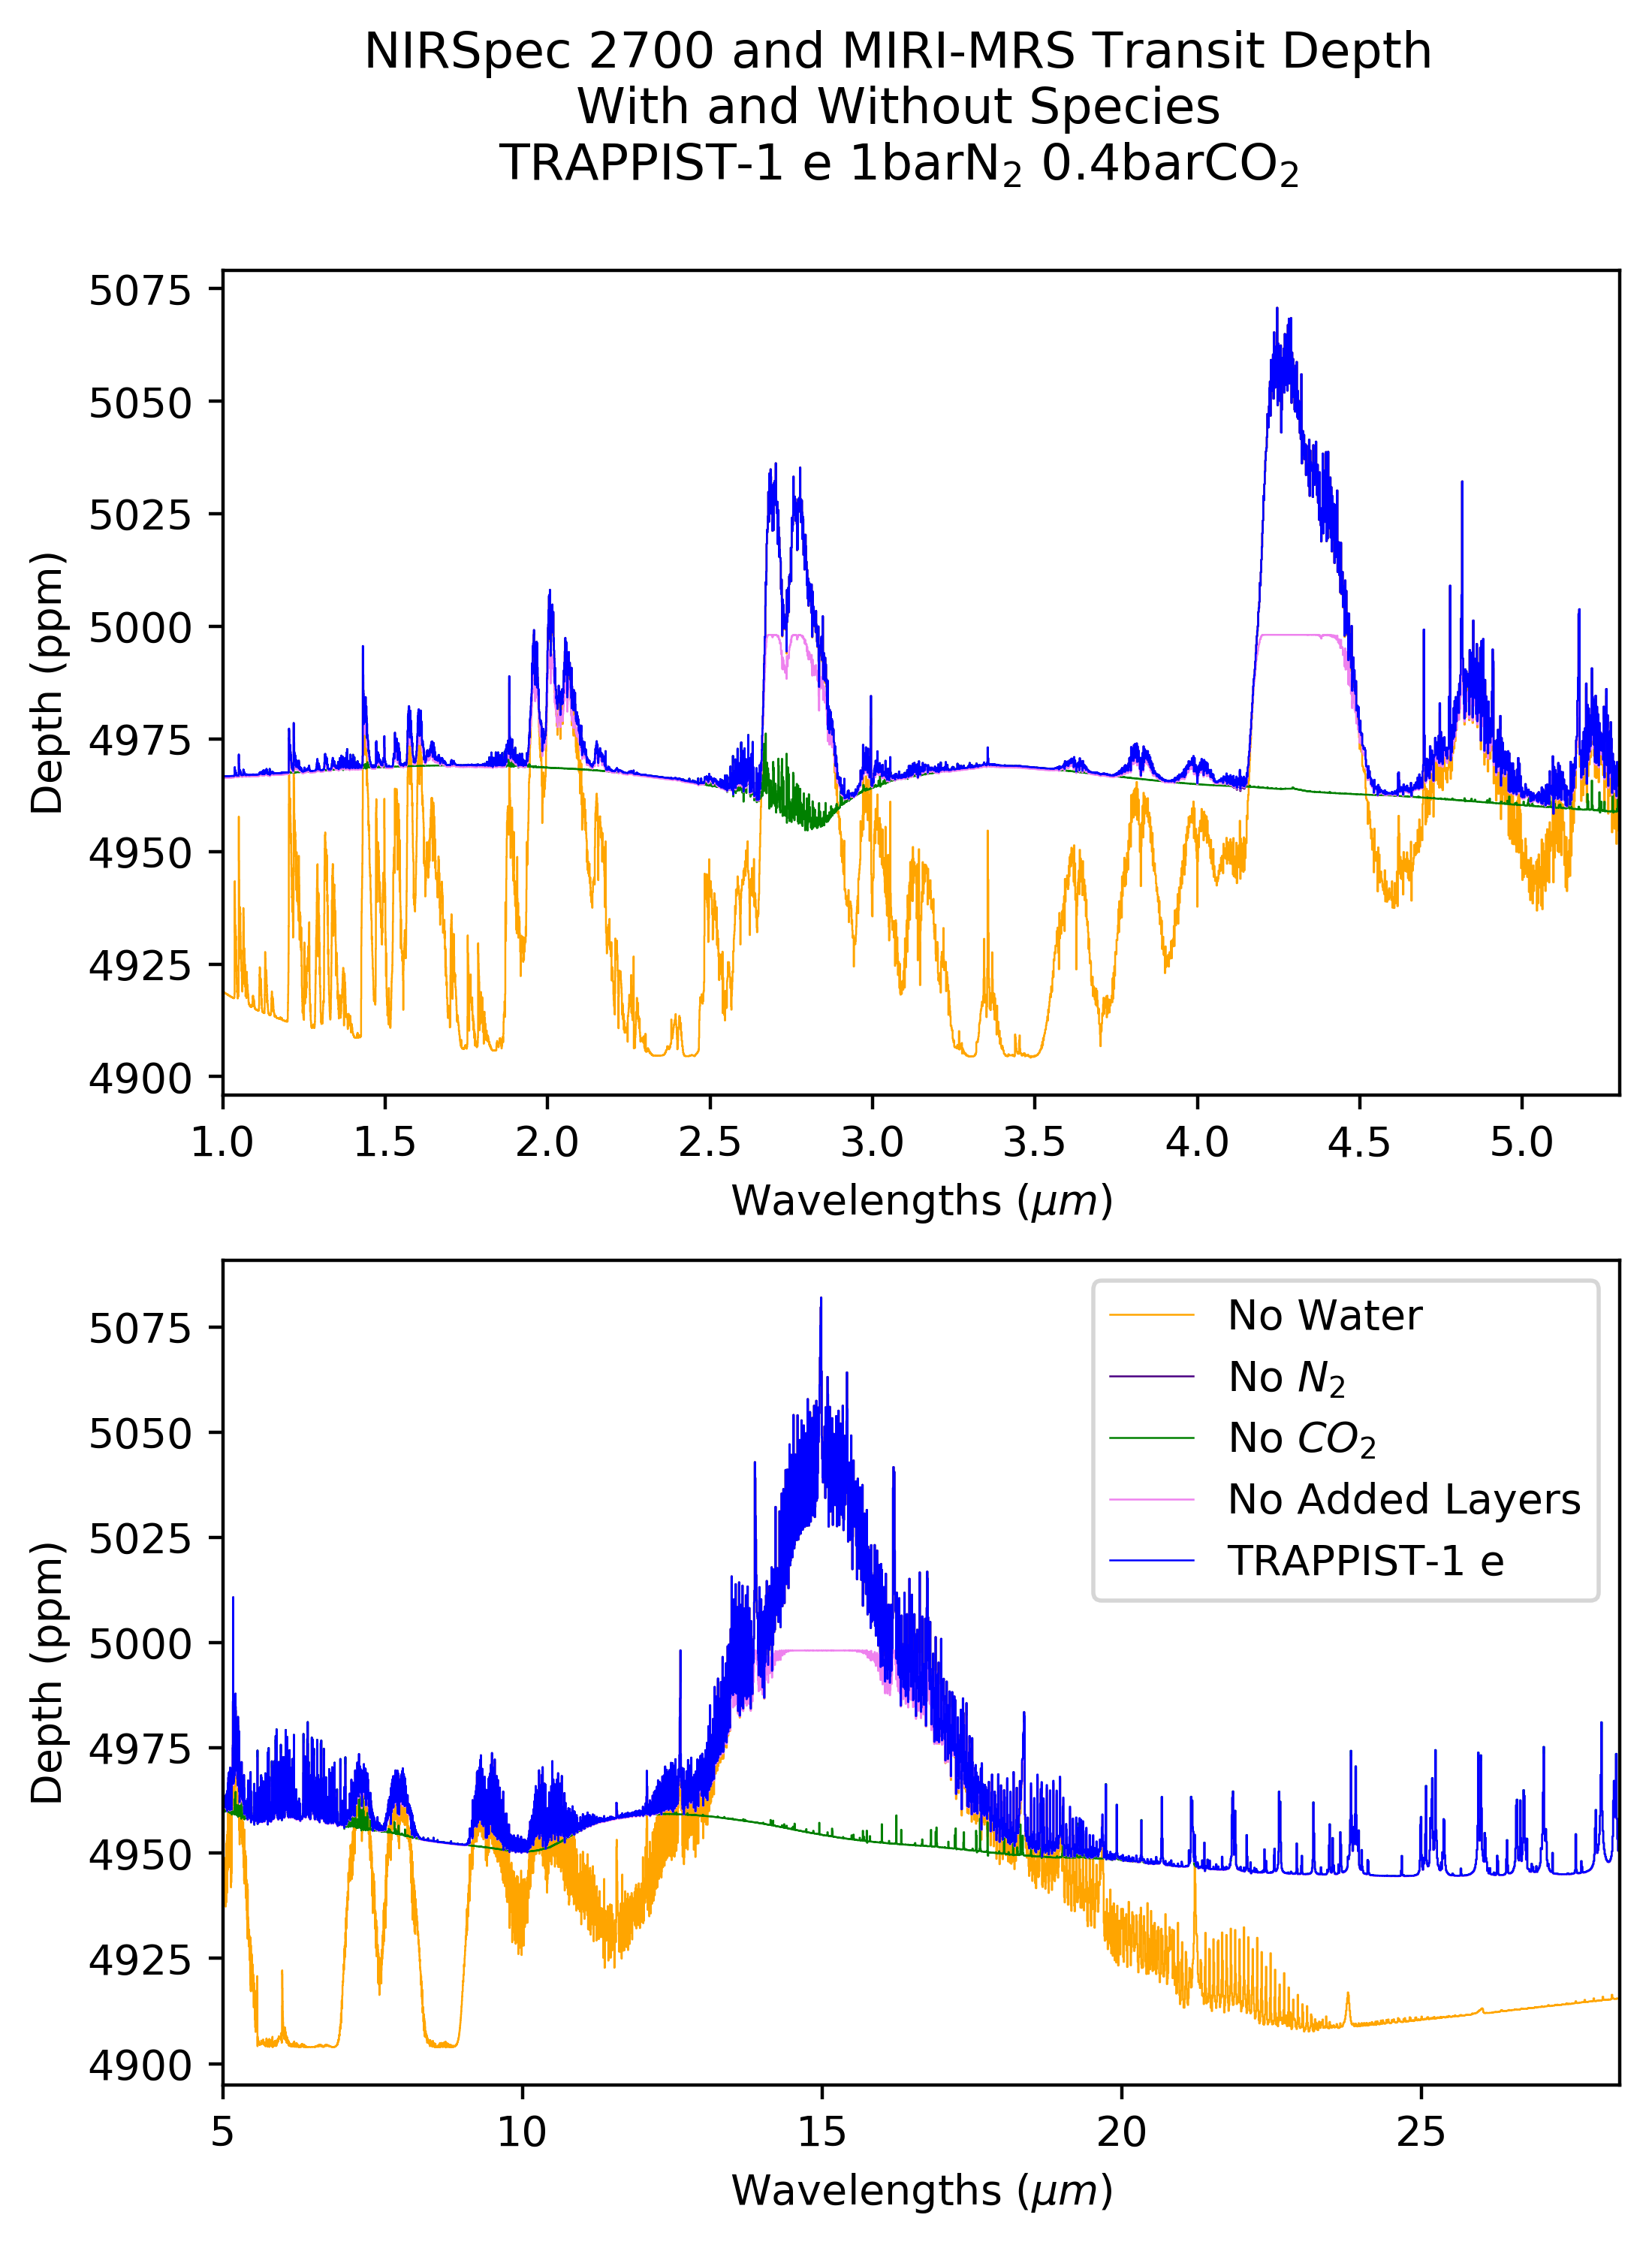

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(6, 8), dpi=400)
bottom, ax = axes
ax.step(dry.Wavelengths, dry.Transit * 1e6, linewidth=0.45, where="post",
        c="orange", label="No Water")
ax.step(noN2.Wavelengths, noN2.Transit * 1e6, linewidth=0.45, where="post",
        c="indigo", label="No $N_2$")
ax.step(noCO2.Wavelengths, noCO2.Transit * 1e6, linewidth=0.45, where="post",
    c="g", label="No $CO_2$")
ax.step(miri.Wavelengths, notop.Transit * 1e6, linewidth=0.45, where="post",
    c="violet", label="No Added Layers")
ax.step(miri.Wavelengths, miri.Transit * 1e6, linewidth=0.45, where="post",
    c="b", label="TRAPPIST-1 e")
bottom.step(nirdry.Wavelengths, nirdry.Transit * 1e6, linewidth=0.45,
        where="post", c="orange")
bottom.step(nirnoN2.Wavelengths, nirnoN2.Transit * 1e6, linewidth=0.45,
        where="post", c="indigo")
bottom.step(nirnoCO2.Wavelengths, nirnoCO2.Transit * 1e6, linewidth=0.45,
        where="post", c="g")
bottom.step(nirnotop.Wavelengths, nirnotop.Transit * 1e6, linewidth=0.45, where="post",
        c="violet")
bottom.step(nirspec.Wavelengths, nirspec.Transit * 1e6, linewidth=0.45, where="post",
        c="b")
fig.suptitle("NIRSpec 2700 and MIRI-MRS Transit Depth\n"
             "With and Without Species\n"
             r"TRAPPIST-1 e 1bar$\mathrm{N}_2$ 0.4bar$\mathrm{CO}_2$")
#fig.tight_layout(pad=1)
ax.set_xlabel("Wavelengths ($\mu m$)")
bottom.set_xlabel("Wavelengths ($\mu m$)")
ax.set_ylabel("Depth (ppm)")
bottom.set_ylabel("Depth (ppm)")
ax.set_xlim(*miri._plot_range)
bottom.set_xlim(*nirspec._plot_range)
ax.legend()
fig.savefig("nirmiri_without_species.png", pad_inches=0.25)

### Analysis S/N

In [10]:
miriH2O = (dry.Transit - miri.Transit)*1e6 < -5
miriCO2 = (noCO2.Transit - miri.Transit)*1e6 < -5
nirH2O = (nirdry.Transit - nirspec.Transit)*1e6 < -5
nirCO2 = (nirnoCO2.Transit - nirspec.Transit)*1e6 < -5
filters = np.array([[miriCO2, miriH2O], [nirCO2, nirH2O]])

In [11]:
transit = PSG.PSG("TRAPPIST-1 e")
transit.fetch_archive()
transit.from_cdf(files[11])
transit.calculate(1e-6, 7)
transit.write("MIRI-MRS", 18, 200, "Wsrm2um")
transit.send(key="4ce8cefdcc7d90cb5070")
transit.plot_setup()

almost = PSG.PSG("TRAPPIST-1 e")
almost.fetch_archive()
almost.from_cdf(files[11], phase=175)
almost.calculate(1e-6, 7)
almost.write("MIRI-MRS", 18, 200, "Wsrm2um")
almost.send(key="4ce8cefdcc7d90cb5070")
almost.plot_setup()

dry = PSG.PSG("TRAPPIST-1 e")
dry.fetch_archive()
dry.from_cdf(files[11])
dry.calculate(1e-6, 7)
dry.atmosphere["H2O"] *= 0
dry.atmosphere["LiquidCloud"] *= 0
dry.atmosphere["IceCloud"] *= 0
dry.write('MIRI-MRS', 18, 200, "Wsrm2um")
dry.send(key="4ce8cefdcc7d90cb5070")
dry.plot_setup()

noCO2 = PSG.PSG("TRAPPIST-1 e")
noCO2.fetch_archive()
noCO2.from_cdf(files[11])
noCO2.calculate(1e-6, 7)
noCO2.atmosphere["CO2"] *= 0
noCO2.write('MIRI-MRS', 18, 200, "Wsrm2um")
noCO2.send(key="4ce8cefdcc7d90cb5070")
noCO2.plot_setup()

Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_transit_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    7 files created
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Phase is not 180, but is_transit is True
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C

In [12]:
num = np.sum(almost.Total[miriCO2]-transit.Total[miriCO2])
den = np.sum(almost.Total[miriCO2])
num/den*1e6

In [13]:
noCO2num = np.sum(almost.Total[miriCO2] - noCO2.Total[miriCO2])
noCO2num/den*1e6

In [14]:
noise = s.mag(transit.Noise[miriCO2])
tot_noise = np.sqrt((2*noise/num)**2+(noise/den)**2)*num/den
tot_noise*1e6

In [15]:
(2*noise/num)*num/den*1e6

In [16]:
instruments = ["MIRI-MRS", "NIRSpec-2700"]
results = []
spec_successful = []

In [25]:
for i, file in enumerate(files[:-2]):
    print(i)
    if i not in spec_successful:
        instrum = []
        for j, instrument in enumerate(instruments):
            print(instrument)
            transit = PSG.PSG("TRAPPIST-1 e")
            transit.fetch_archive()
            transit.from_cdf(file)
            transit.calculate(1e-6, 7)
            transit.write(instrument, 18, 200, "Wsrm2um")
            transit.send(key="4ce8cefdcc7d90cb5070")
            transit.plot_setup()

            almost = PSG.PSG("TRAPPIST-1 e")
            almost.fetch_archive()
            almost.from_cdf(file, phase=175, is_transit=False)
            almost.calculate(1e-6, 7)
            almost.write(instrument, 18, 200, "Wsrm2um")
            almost.send(key="4ce8cefdcc7d90cb5070")
            almost.plot_setup()

            dry = PSG.PSG("TRAPPIST-1 e")
            dry.fetch_archive()
            dry.from_cdf(file)
            dry.calculate(1e-6, 7)
            dry.atmosphere["H2O"] *= 0
            dry.atmosphere["LiquidCloud"] *= 0
            dry.atmosphere["IceCloud"] *= 0
            dry.write(instrument, 18, 200, "Wsrm2um")
            dry.send(key="4ce8cefdcc7d90cb5070")
            dry.plot_setup()

            no_co2 = PSG.PSG("TRAPPIST-1 e")
            no_co2.fetch_archive()
            no_co2.from_cdf(file)
            no_co2.calculate(1e-6, 7)
            no_co2.atmosphere["CO2"] *= 0
            no_co2.write(instrument, 18, 200, "Wsrm2um")
            no_co2.send(key="4ce8cefdcc7d90cb5070")
            no_co2.plot_setup()

            num_co2 = np.sum(almost.Total[filters[j, 0]]
                             -transit.Total[filters[j, 0]])
            den_co2 = np.sum(almost.Total[filters[j, 0]])
            d_bar_co2 = num_co2/den_co2*1e6
            noise_co2 = np.sqrt(2)*s.mag(transit.Noise[filters[j, 0]])/num_co2*d_bar_co2
            num_no_co2 = np.sum(almost.Total[filters[j, 0]]
                                - no_co2.Total[filters[j, 0]])
            d_bar_no_co2 = num_no_co2/den_co2*1e6
            noise_no_co2 = np.sqrt(2)*s.mag(no_co2.Noise[filters[j, 0]])/num_no_co2*d_bar_no_co2

            num_h2o = np.sum(almost.Total[filters[j, 1]]
                             -transit.Total[filters[j, 1]])
            den_h2o = np.sum(almost.Total[filters[j, 1]])
            d_bar_h2o = num_h2o/den_h2o*1e6
            noise_h2o = np.sqrt(2)*s.mag(transit.Noise[filters[j, 1]])/num_h2o*d_bar_h2o
            num_no_h2o = np.sum(almost.Total[filters[j, 1]]
                                - dry.Total[filters[j, 1]])
            d_bar_no_h2o = num_no_h2o/den_h2o*1e6
            noise_no_h2o = np.sqrt(2)*s.mag(dry.Noise[filters[j, 1]])/num_no_h2o*d_bar_no_h2o

            instrum.append([[[d_bar_co2, noise_co2], [d_bar_no_co2, noise_no_co2]],
                           [[d_bar_h2o, noise_h2o], [d_bar_no_h2o, noise_no_h2o]]])
        results.append(instrum)
        spec_successful.append(i)
results = np.array(results)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


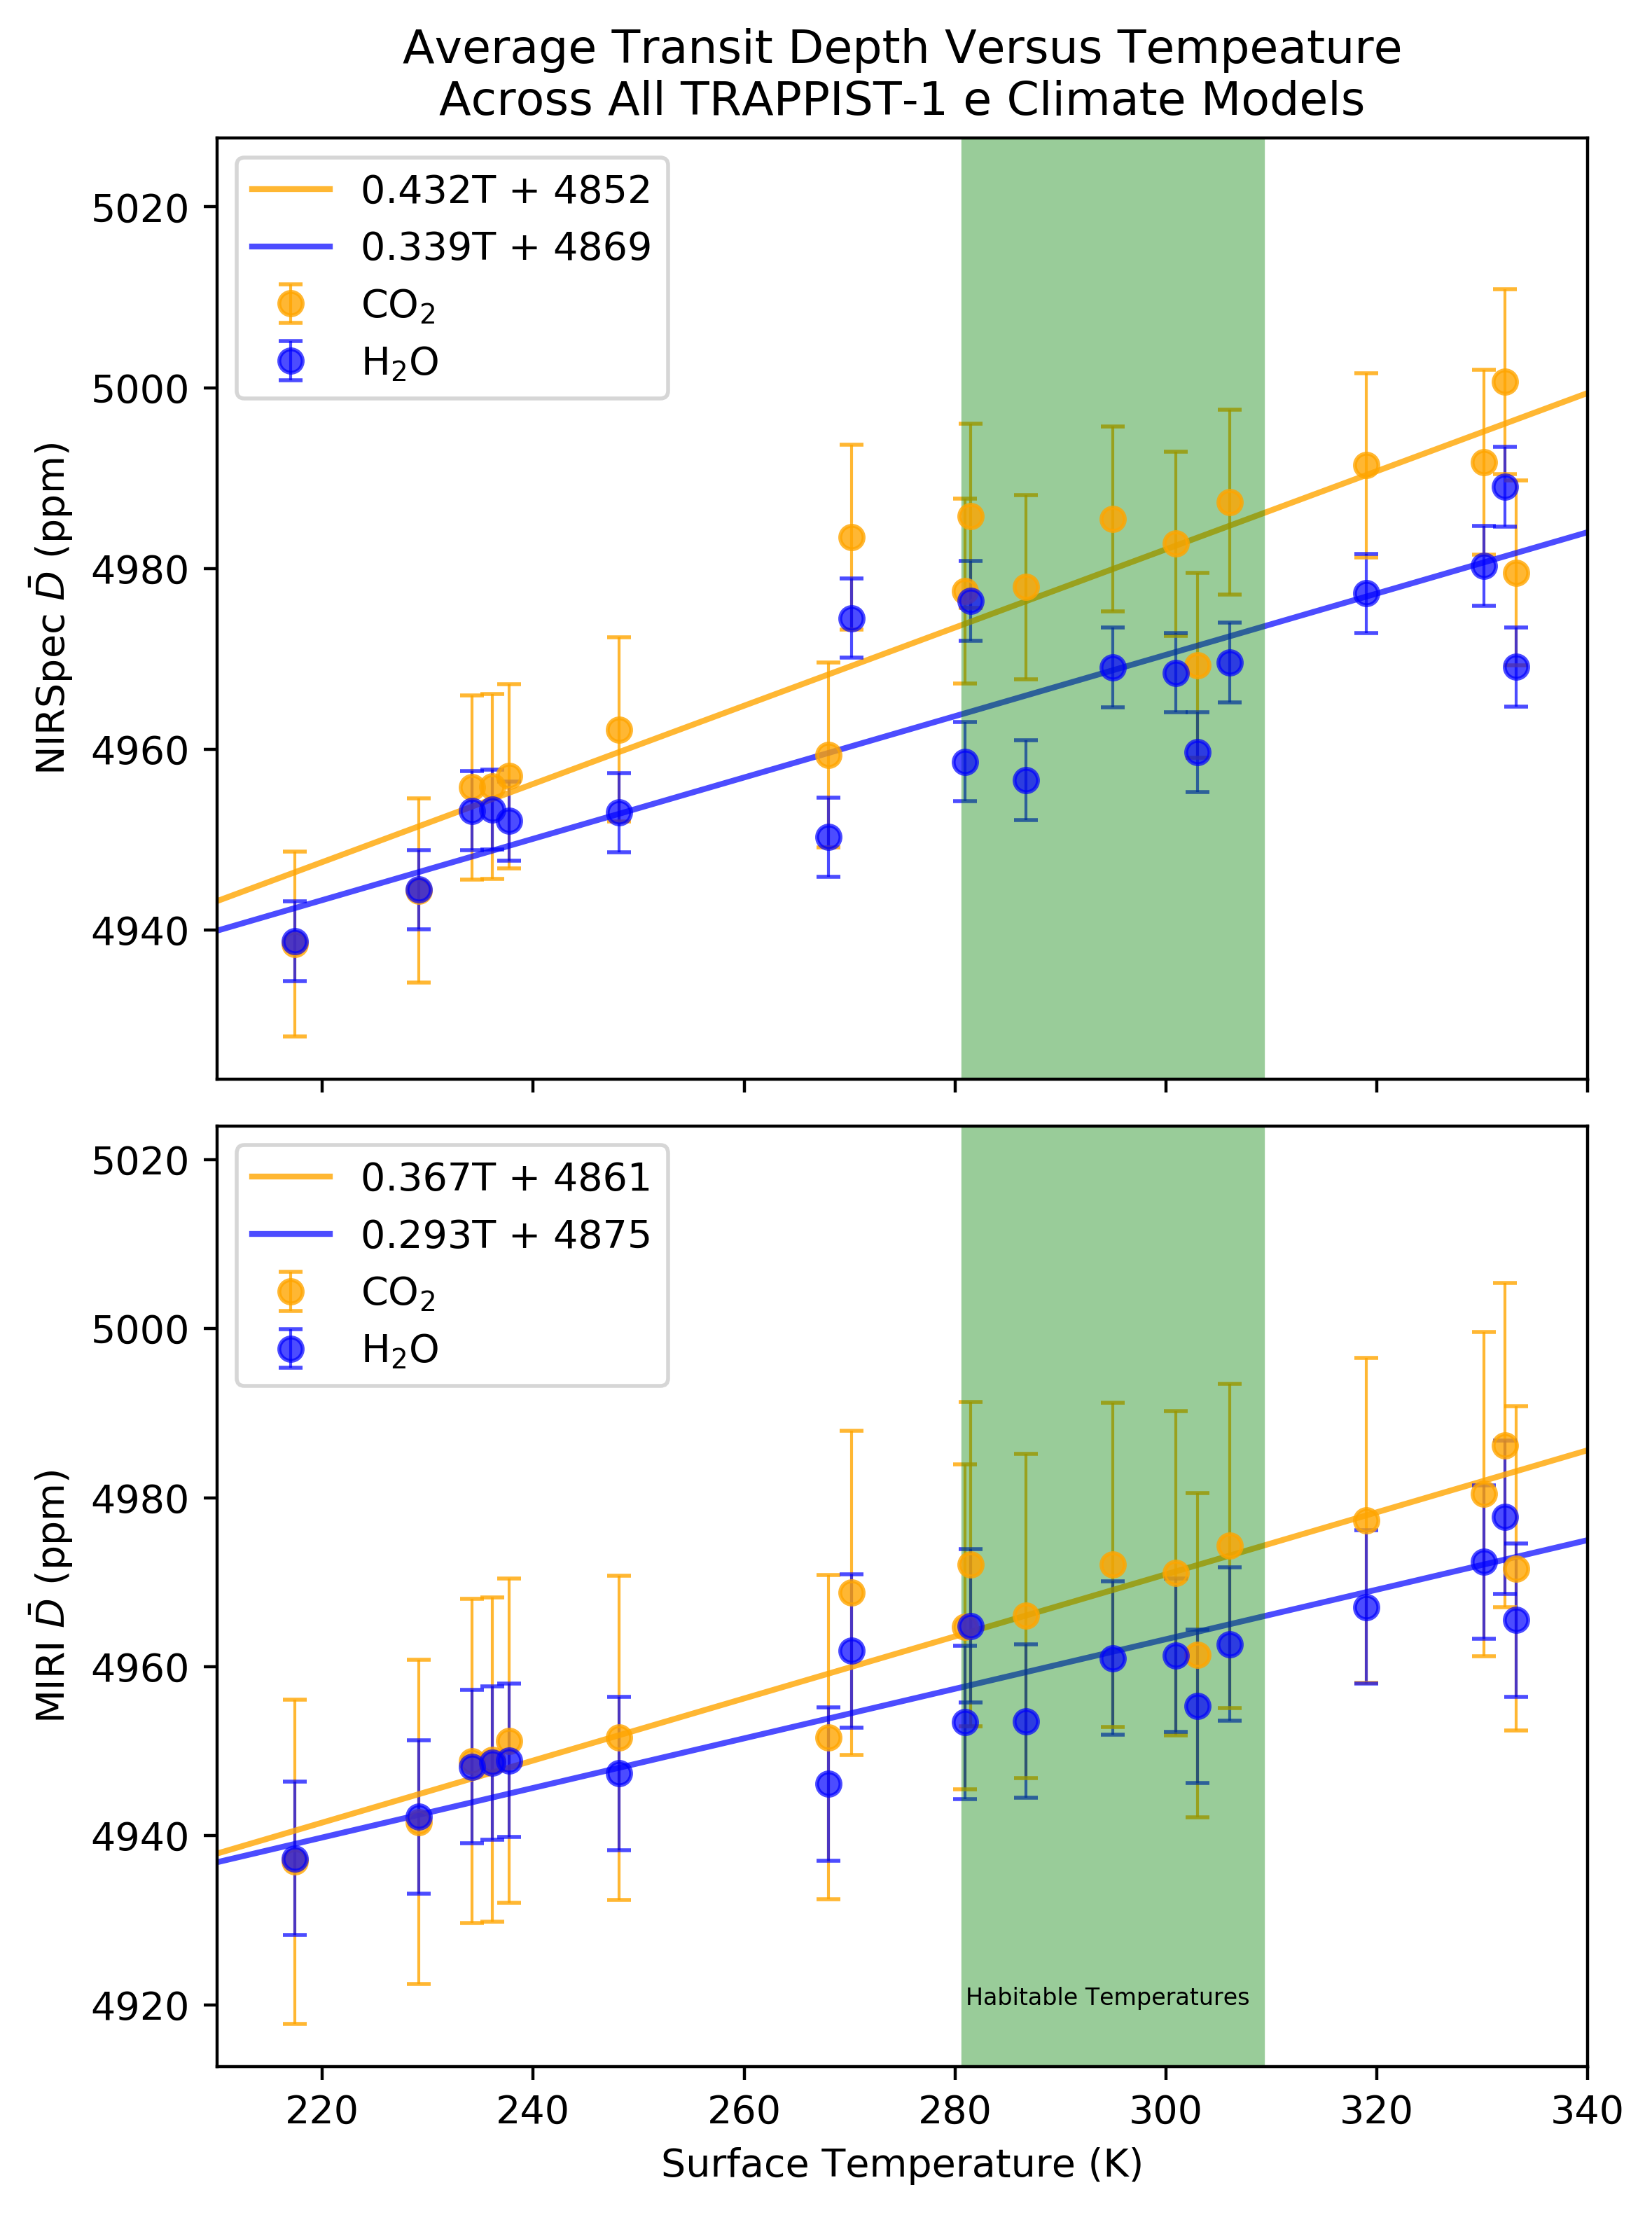

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(6, 8), dpi=400, sharex=True)
top, bottom = axes
temps = np.linspace(210, 340)
x0, x1 = np.polyfit(tsurf, results[:, 1, 0, 0, 0], deg=1)
top.plot(temps, temps*x0+x1, alpha=0.8, c="orange",
         label=f"{x0:.3f}T + {x1:.0f}")
top.errorbar(tsurf, results[:, 1, 0, 0, 0], yerr=results[:, 1, 0, 0, 1]/np.sqrt(10),
             fmt="o", alpha=0.8, c="orange", label=r"$\mathrm{CO_2}$",
             elinewidth=0.75, capsize=3)
x0, x1 = np.polyfit(tsurf, results[:, 1, 1, 0, 0], deg=1)
top.plot(temps, temps*x0+x1, alpha=0.7, c="b", label=f"{x0:.3f}T + {x1:.0f}")
top.errorbar(tsurf, results[:, 1, 1, 0, 0], yerr=results[:, 1, 1, 0, 1]/np.sqrt(10),
             fmt="o", alpha=0.7, c="b", label=r"$\mathrm{H_2O}$",
             elinewidth=0.75, capsize=3)
top.legend()
top.set_xlim(210, 340)

top.set_ylabel(r"NIRSpec $\bar{D}$ (ppm)")
top.axvline(295, alpha=0.4, c="g", linewidth=78)
#top.text(280, 4900, "Habitable Temperatures", fontsize=6)

# Bottom
x0, x1 = np.polyfit(tsurf, results[:, 0, 0, 0, 0], deg=1)
bottom.plot(temps, temps*x0+x1, alpha=0.8, c="orange",
         label=f"{x0:.3f}T + {x1:.0f}")
bottom.errorbar(tsurf, results[:, 0, 0, 0, 0], yerr=results[:, 0, 0, 0, 1]/np.sqrt(10),
             fmt="o", alpha=0.8, c="orange", label=r"$\mathrm{CO_2}$",
             elinewidth=0.75, capsize=3)
x0, x1 = np.polyfit(tsurf, results[:, 0, 1, 0, 0], deg=1)
bottom.plot(temps, temps*x0+x1, alpha=0.7, c="b", label=f"{x0:.3f}T + {x1:.0f}")
bottom.errorbar(tsurf, results[:, 0, 1, 0, 0], yerr=results[:, 0, 1, 0, 1]/np.sqrt(10),
             fmt="o", alpha=0.7, c="b", label=r"$\mathrm{H_2O}$",
             elinewidth=0.75, capsize=3)
bottom.legend()
bottom.set_xlim(210, 340)
bottom.set_xlabel("Surface Temperature (K)")
bottom.set_ylabel(r"MIRI $\bar{D}$ (ppm)")
bottom.axvline(295, alpha=0.4, c="g", linewidth=78)
bottom.text(281, 4920, "Habitable Temperatures", fontsize=6)
top.set_title("Average Transit Depth Versus Tempeature\n"
              "Across All TRAPPIST-1 e Climate Models")
fig.tight_layout()
fig.savefig("depth_from_temp.png")

In [31]:
for i, obj in enumerate([tsurf, psurf, n2, co2]):
    print(i)
    for j, instrument in enumerate(instruments):
        print(instrument)
        for k, spec in enumerate(["CO2", "H2O"]):
            print(spec)
            rsq = (np.corrcoef(obj, results[:, j, k, 0, 0])**2)[0, 1]
            print("{:.3f}".format(rsq))

0
MIRI-MRS
CO2
0.881
H2O
0.821
NIRSpec-2700
CO2
0.834
H2O
0.757
1
MIRI-MRS
CO2
0.563
H2O
0.651
NIRSpec-2700
CO2
0.496
H2O
0.593
2
MIRI-MRS
CO2
0.457
H2O
0.529
NIRSpec-2700
CO2
0.415
H2O
0.501
3
MIRI-MRS
CO2
0.060
H2O
0.066
NIRSpec-2700
CO2
0.036
H2O
0.034


In [32]:
os.system("cp miri_nirspec_depth.png ../../Thesis/spectra")
os.system("cp nirmiri_without_species.png ../../Thesis/spectra")
os.system("cp depth_from_temp.png ../../Thesis/spectra")

# Thermal Phase Curves

In [33]:
miri_raw = PSG.PSG("TRAPPIST-1 e")
miri_raw.fetch_archive()
miri_raw.from_cdf(Path(files[11]).absolute())
miri_raw.calculate(1e-6, 7)
miri_raw.write("MIRI-MRS", 18, 200, "Wsrm2um")
miri_raw.send(key="4ce8cefdcc7d90cb5070")
miri_raw.plot_setup()
miri_almost = PSG.PSG("TRAPPIST-1 e")
miri_almost.fetch_archive()
miri_almost.from_cdf(Path(files[11]).absolute(), phase=175)
miri_almost.calculate(1e-6, 7)
miri_almost.write("MIRI-MRS", 18, 200, "Wsrm2um")
miri_almost.send(key="4ce8cefdcc7d90cb5070")
miri_almost.plot_setup()

nir_raw = PSG.PSG("TRAPPIST-1 e")
nir_raw.fetch_archive()
nir_raw.from_cdf(files[11])
nir_raw.calculate(1e-6, 7)
nir_raw.write("NIRSpec-2700", 8, 400, "Wsrm2um")
nir_raw.send(key="4ce8cefdcc7d90cb5070")
nir_raw.plot_setup()

Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_transit_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    7 files created
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Phase is not 180, but is_transit is True
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C

In [139]:
ran_successfully = []
tpcs = []
slow_tpcs = []
hot_tpcs = []

In [140]:
phases = np.arange(0, 360, 5)

for i, phase in enumerate(phases):
    print(phase)
    if i not in ran_successfully:
        mir = PSG.PSG("TRAPPIST-1 e")
        mir.fetch_archive()
        mir.from_cdf(files[11], phase=phase, is_transit=False)
        mir.calculate(1e-6, 7)
        mir.write("MIRI-MRS", 18, 200, "Wsrm2um")
        mir.send(key="4ce8cefdcc7d90cb5070")
        mir.plot_setup()
        nir = PSG.PSG("TRAPPIST-1 e")
        nir.fetch_archive()
        nir.from_cdf(files[11], phase=phase)
        nir.calculate(1e-6, 7)
        nir.write("NIRSpec-2700", 18, 200, "Wsrm2um")
        nir.send(key="4ce8cefdcc7d90cb5070")
        nir.plot_setup()
        slow = PSG.PSG("TRAPPIST-1 e")
        slow.fetch_archive()
        slow.from_cdf(special_files[0], phase=phase, is_transit=False)
        slow.calculate(1e-6, 7)
        slow.write("MIRI-MRS", 18, 200, "Wsrm2um")
        slow.send(key="4ce8cefdcc7d90cb5070")
        slow.plot_setup()
        hot = PSG.PSG("TRAPPIST-1 e")
        hot.fetch_archive()
        hot.from_cdf(files[12], phase=phase, is_transit=False)
        hot.calculate(1e-6, 7)
        hot.write("MIRI-MRS", 18, 200, "Wsrm2um")
        hot.send(key="4ce8cefdcc7d90cb5070")
        hot.plot_setup()
        slow_tpcs.append(slow)
        hot_tpcs.append(hot)
        ran_successfully.append(i)
        tpcs.append([nir, mir])

0
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_0_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_0_pro_0_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    7 files created
    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    is_transit is True, but was likely not transitting because the phase is not close to 180
    Phase is not 180, but is_transit is True
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_1barCO2_10_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_1barCO2_10_pro_10_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre po

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    is_transit is True, but was likely not transitting because the phase is not close to 180
    Phase is not 180, but is_transit is True
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_transit_25_NIRSpec-2700_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 fil

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_1barCO2_35_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_1barCO2_35_pro_35_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre po

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    is_transit is True, but was likely not transitting because the phase is not close to 180
    Phase is not 180, but is_transit is True
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_transit_50_NIRSpec-2700_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 fil

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_1barCO2_60_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_1barCO2_60_pro_60_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre po

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    is_transit is True, but was likely not transitting because the phase is not close to 180
    Phase is not 180, but is_transit is True
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_transit_75_NIRSpec-2700_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 fil

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_1barCO2_85_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_1barCO2_85_pro_85_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre po

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    is_transit is True, but was likely not transitting because the phase is not close to 180
    Phase is not 180, but is_transit is True
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_transit_100_NIRSpec-2700_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 fi

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_1barCO2_110_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_1barCO2_110_pro_110_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    is_transit is True, but was likely not transitting because the phase is not close to 180
    Phase is not 180, but is_transit is True
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_transit_125_NIRSpec-2700_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 fi

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_1barCO2_135_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_1barCO2_135_pro_135_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    is_transit is True, but was likely not transitting because the phase is not close to 180
    Phase is not 180, but is_transit is True
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_transit_150_NIRSpec-2700_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 fi

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_1barCO2_160_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_1barCO2_160_pro_160_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Phase is not 180, but is_transit is True
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_transit.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_transit_175_NIRSpec-2700_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calcu

    Exoplanet wasn't transitting
    Ready to Make Plots
190
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_190_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_190_pro_190_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    is_transi

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_200_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_200_pro_200_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
215
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_215_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_215_pro_215_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_225_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_225_pro_225_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
240
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_240_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_240_pro_240_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_250_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_250_pro_250_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
265
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_265_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_265_pro_265_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_275_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_275_pro_275_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
290
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_290_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_290_pro_290_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_300_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_300_pro_300_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
315
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_315_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_315_pro_315_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_325_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_325_pro_325_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
340
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\trappist1e_1barN2_0.4barCO2_340_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\trappist1e_1barN2_0.4barCO2_340_pro_340_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of 

    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher number of Legendre polynomials (NMAX=3 and LMAX=12).

    Exoplanet wasn't transitting
    Ready to Make Plots
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written topsg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_350_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is C:\Users\dgatl_000\OneDrive\College\Senior_1\Wolf\Thesis\psg_files\t3700_s1500_p44.3355.cam.h0.avg.nc_350_pro_350_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Accurate scattering calculations with 'Cloud' would require a higher 

In [37]:
miri_totals = np.array([tpcs[i][1].Total for i, phase in enumerate(phases) if not tpcs[i][1].is_transit])
nir_totals = np.array([tpcs[i][0].Total for i, phase in enumerate(phases) if not tpcs[i][0].is_transit])

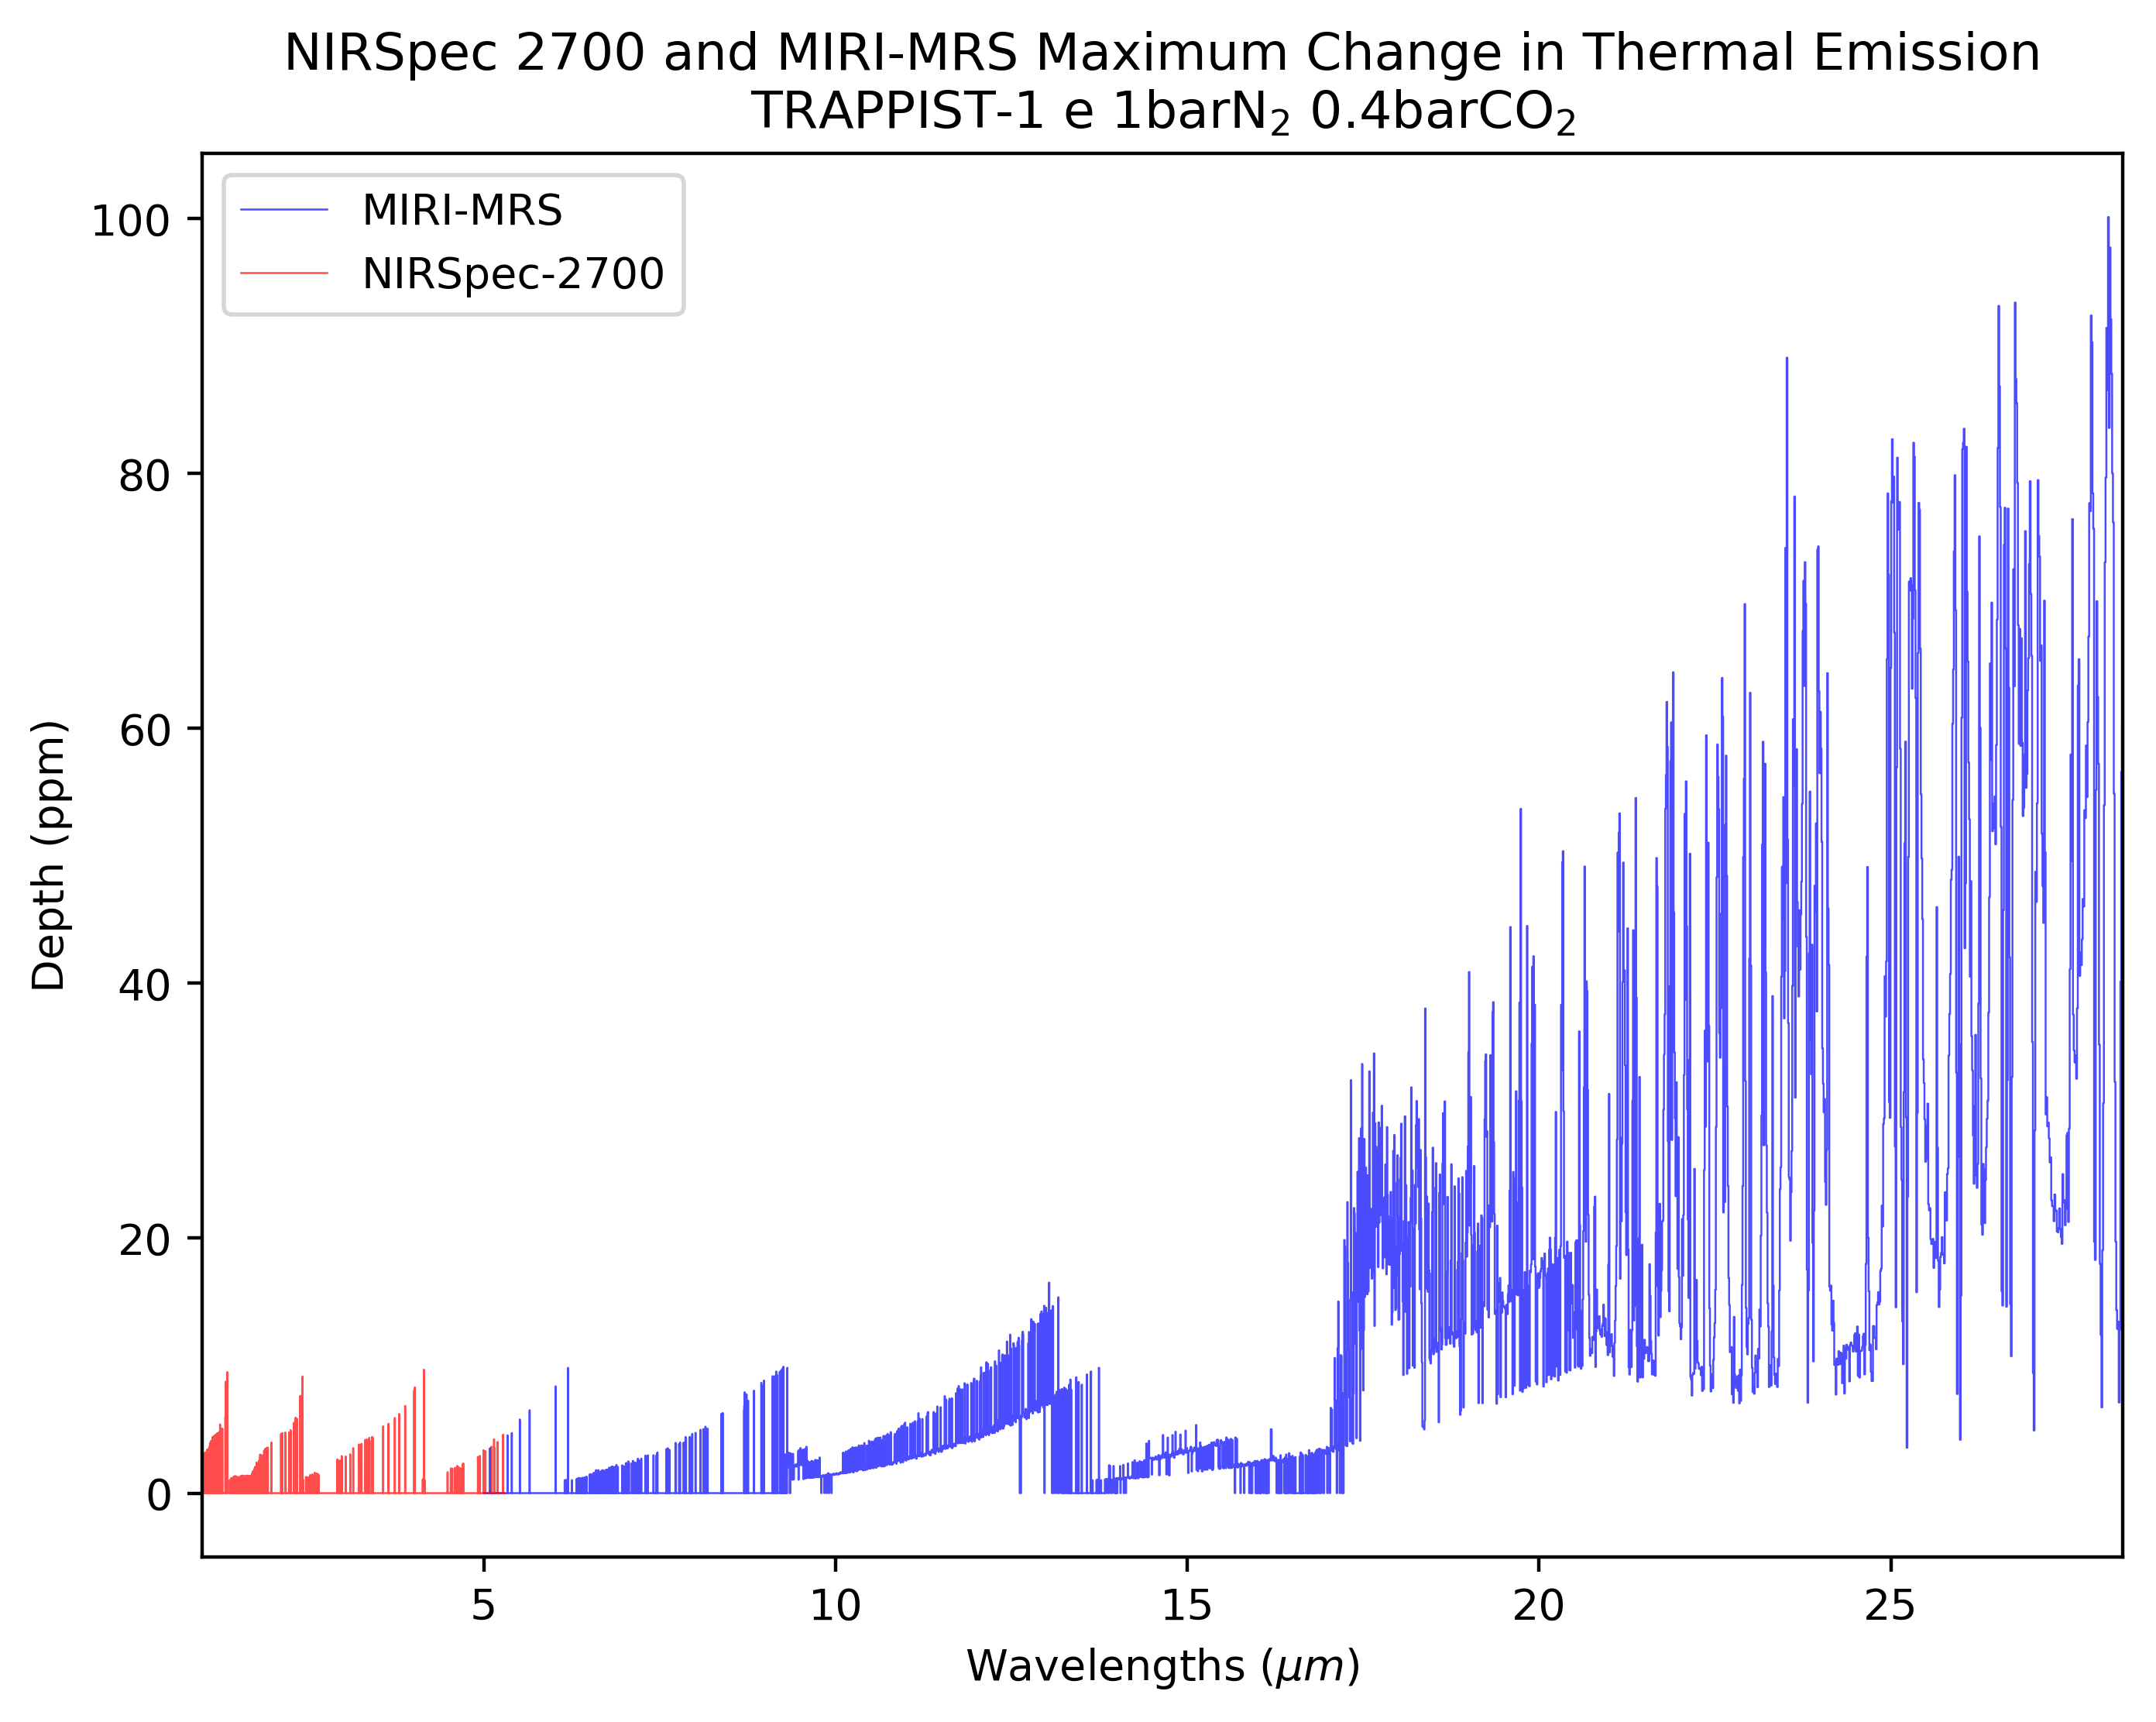

In [77]:
fig = plt.figure(figsize=(8, 6), dpi=400)
ax = fig.gca()
data = ((np.max(miri_totals, axis=0)
         - np.min(miri_totals, axis=0))
        / miri_raw.Total*1e6)
ax.step(miri_raw.Wavelengths,
         data, linewidth=0.45,
        where="post", c="b", alpha=0.7, label="MIRI-MRS")
ax.step(nir_raw.Wavelengths,
         (np.max(nir_totals, axis=0)
          - np.min(nir_totals, axis=0))/nir_raw.Total*1e6, linewidth=0.45,
        where="post", c="r", alpha=0.7, label="NIRSpec-2700")
ax.set_xlabel(r"Wavelengths ($\mu m$)")
ax.set_ylabel("Depth (ppm)")
ax.set_title("NIRSpec 2700 and MIRI-MRS Maximum Change in Thermal Emission\n"
             r"TRAPPIST-1 e 1bar$\mathrm{N}_2$ 0.4bar$\mathrm{CO}_2$")
ax.set_xlim(nir._plot_range[0], mir._plot_range[1])
ax.legend()
fig.savefig("tpc_max_diff.png")

In [142]:
phase_lum = []
wave_mask = miri.Wavelengths >= 17
is_transit = []
noises = []
slow_phase_lum = []
slow_noises = []
hot_phase_lum = []
hot_noises = []
for i, phase in enumerate(phases):
    planet = np.sum(tpcs[i][1].Thermal[wave_mask])
    star = np.sum(miri_almost.Total[wave_mask])
    noise = s.mag(tpcs[i][1].Noise[wave_mask])
    phase_lum.append(planet/star*1e6)
    is_transit.append(tpcs[i][1].is_transit)
    noises.append(np.sqrt(2)*noise/star*1e6)
    planet = np.sum(slow_tpcs[i].Thermal[wave_mask])
    star = np.sum(miri_almost.Total[wave_mask])
    noise = s.mag(slow_tpcs[i].Noise[wave_mask])
    slow_phase_lum.append(planet/star*1e6)
    slow_noises.append(np.sqrt(2)*noise/star*1e6)
    planet = np.sum(hot_tpcs[i].Thermal[wave_mask])
    star = np.sum(miri_almost.Total[wave_mask])
    noise = s.mag(hot_tpcs[i].Noise[wave_mask])
    hot_phase_lum.append(planet/star*1e6)
    hot_noises.append(np.sqrt(2)*noise/star*1e6)
is_transit = np.array(is_transit) ^ (phases == 0)
phase_lum = np.array(phase_lum)
noises = np.array(noises)
slow_phase_lum = np.array(slow_phase_lum)
slow_noises = np.array(slow_noises)
hot_phase_lum = np.array(hot_phase_lum)
hot_noises = np.array(hot_noises)

In [145]:
print(noises)

[407.74845417 407.74846417 407.74846141 407.74846148 407.74845907
 407.74846048 407.74846063 407.74846232 407.74846589 407.74846949
 407.74847747 407.7484838  407.74849244 407.74851149 407.7485223
 407.74853331 407.74854782 407.74855735 407.74856346 407.74856692
 407.74856723 407.74856661 407.74856506 407.74856412 407.74856222
 407.74856098 407.74856002 407.74855972 407.7485584  407.74855615
 407.74855553 407.74855489 407.74855303 407.74855239 407.74855108
 407.74854848 407.71077721 407.74854375 407.74854111 407.74853691
 407.74853271 407.74852971 407.74852738 407.74852308 407.74851951
 407.7485114  407.7485077  407.7485016  407.7484982  407.74849577
 407.74849118 407.74848943 407.74848902 407.74848797 407.74848497
 407.74848427 407.74848127 407.74848059 407.74847924 407.74847924
 407.74847827 407.7484776  407.74847691 407.74847527 407.74847465
 407.74847372 407.74847309 407.74847122 407.74847028 407.74846869
 407.74846812 407.74846787]


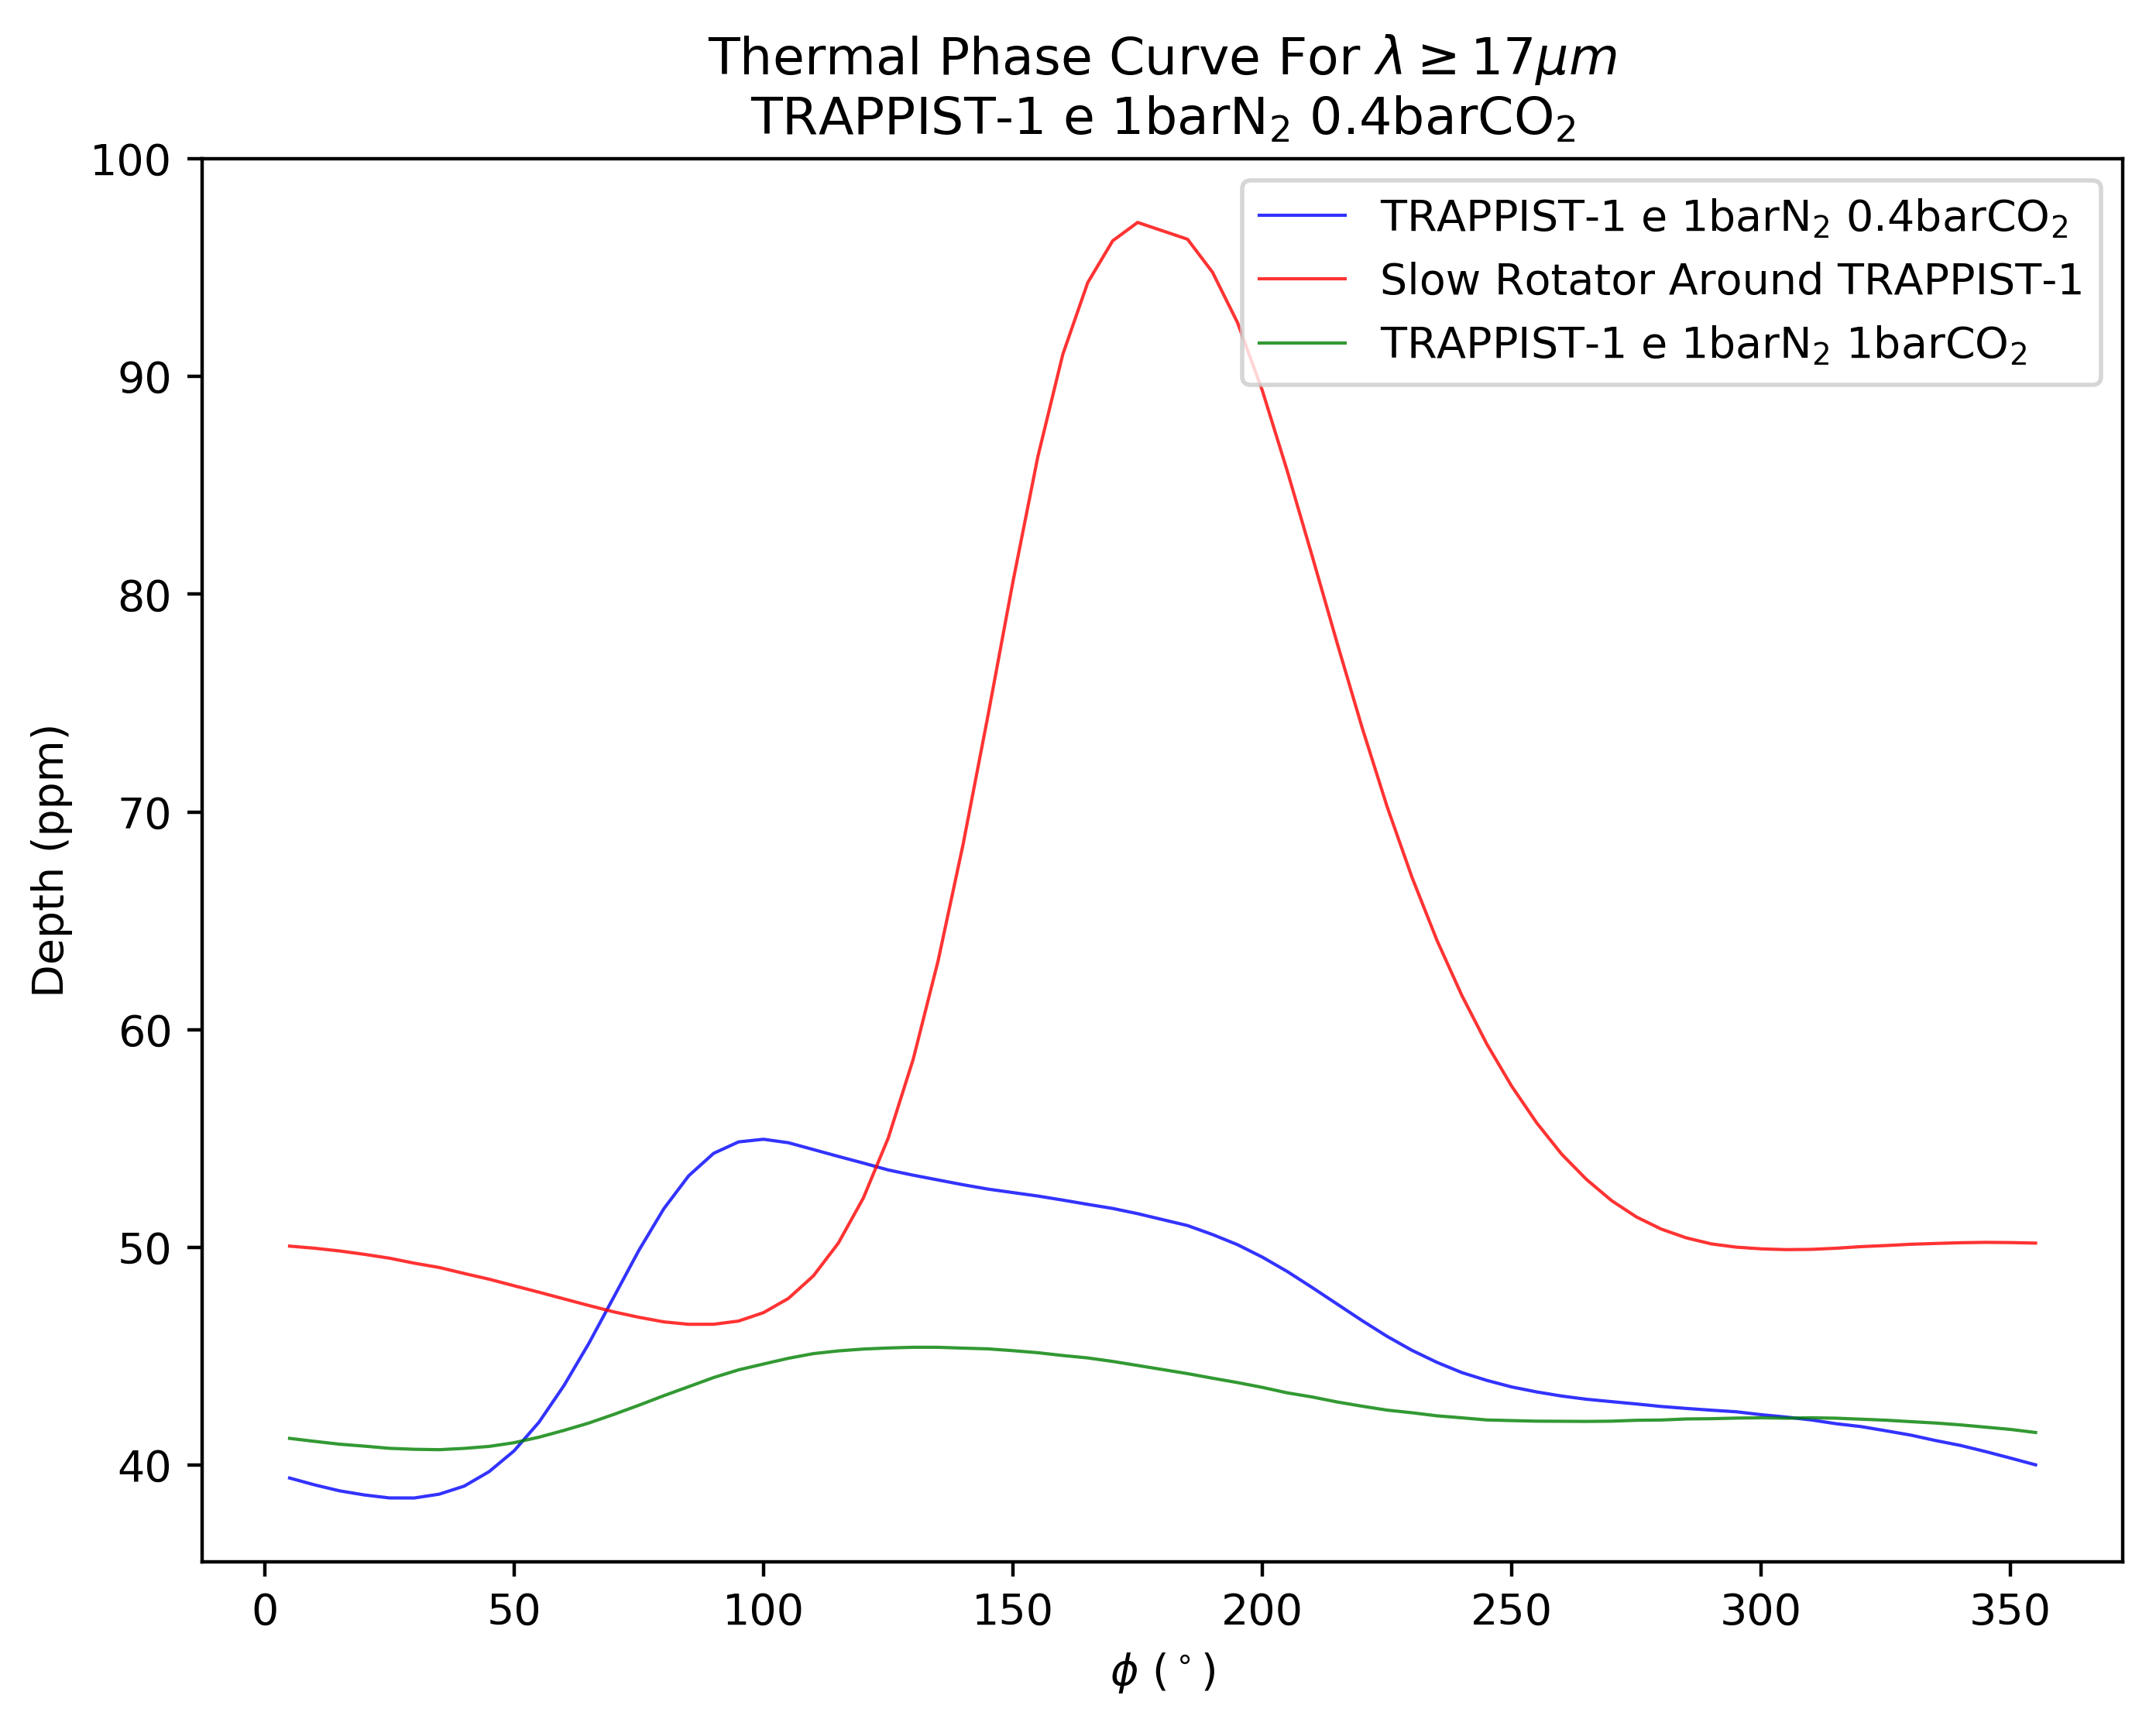

In [152]:
fig = plt.figure(figsize=(8,6), dpi=400)
ax = fig.gca()
ax.plot(phases[~is_transit], phase_lum[~is_transit], c="b", linewidth=0.75,
        alpha=0.8, label=r"TRAPPIST-1 e 1barN$_2$ 0.4barCO$_2$")
ax.plot(phases[~is_transit], slow_phase_lum[~is_transit], c="r", linewidth=0.75,
        alpha=0.8, label="Slow Rotator Around TRAPPIST-1")
ax.plot(phases[~is_transit], hot_phase_lum[~is_transit], c="g", linewidth=0.75,
        alpha=0.8, label=r"TRAPPIST-1 e 1barN$_2$ 1barCO$_2$")
# ax.plot(phases[~is_transit], noises[~is_transit]/np.sqrt(10))
ax.set_xlabel(r"$\phi\ (^\circ)$")
ax.set_ylabel("Depth (ppm)")
ax.set_title(r"Thermal Phase Curve For $\lambda\geq17\mu m$" "\n"
             r"TRAPPIST-1 e 1bar$\mathrm{N}_2$ 0.4bar$\mathrm{CO}_2$")
ax.legend()
fig.savefig("thermal_phase_curve.png")

In [144]:
os.system("cp tpc_max_diff.png ../../Thesis/tpc")
os.system("cp thermal_phase_curve.png ../../Thesis/tpc")